# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, see [this forum post](https://carnd-forums.udacity.com/cq/viewquestion.action?spaceKey=CAR&id=29496372&questionTitle=finding-lanes---import-cv2-fails-even-though-python-in-the-terminal-window-has-no-problem-with-import-cv2) for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# import os
# print(os.sys.path)
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


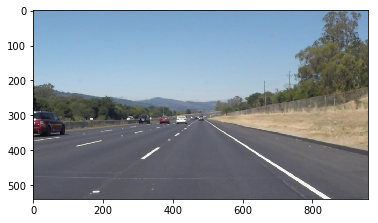

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # ifdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXoAAADfCAYAAAD4Bhh5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsvUmMJkmW3/d7Zv6tsWbkWpm1dFVPczTdTRJDgJQECQIBiRAPBHgjSOmgwwBzkaCrqJOgAwGddNRhDoQEARLFm3QgQEAEBEmkCK7Dmd6qu7qruiorl8jY49vdzZ4O5uZu7p97RGRzGqwZ5CtE5ff5526bm73l/549E1XlHb2jd/SO3tGfXDL/phvwjt7RO3pH7+jXS+8Y/Tt6R+/oHf0Jp3eM/h29o3f0jv6E0ztG/47e0Tt6R3/C6R2jf0fv6B29oz/h9I7Rv6N39I7e0Z9w+rUxehH5yyLyqYh8JiJ/89dVzzt6R+/oHb2jm0l+HXH0ImKBnwJ/CXgO/FPgb6jqj/7IK3tH7+gdvaN3dCP9ujT6vwB8pqq/UNUN8HeAv/prqusdvaN39I7e0Q2U/ZrKfQZ8lXx/DvzbfTfv7h3o/oOnqAioogAiCErb4JC3aESfrSK3lKLorfdUPzcqeRvr6G168rZlv0192vGp74mby9Dkrru0tnzdt9/Xc6FhjUq82L5NqtbJ1kvrfIm31X7rM+3S70J/tM90lxLmdfP5u/bubWfrdil1CarlN+m/+1ev847Ublo1GI0v4XP8qlr9Fm6V5urR8G+cZ40qynslzkf1IGXBqkicv9Xv5f+qOiSZySCqZOJ4/sVnJ6r68Lbu/roY/a0kIr8L/C7A/v3H/Kf/7f+MMQbxGwCUDDHaWMwiEsbmjuR7FqPBbrfHlMaNKt57MjGoKr5vtlWMJXnV6qp23k61MdXuYzf5O5QZnvfeN7636+sqV7Ue63Ybqu+yPW7h4dBvay3ee7z3aE830rJFhNugw/i7ob5XJbTZmLpPBYIpi2pUraaqMz6fUfezKrN81+13oT0dMdr9PtRINZYi0vk+b+pzer825lZrHdw4dv3vuq/8PqrGX/vnZtqetF1O8rKQuj3im++/apkp6jp9KE96Ft9tfehbT80xM413pKoYFC3XvUExmmM1x7k5ojmr+TXn55d4pzx88iHZcIgZjkI5WnB68orV7Jonjx4zGU44vbjkej4DsRw9eIwd7pINxiAeFcW7OZv1ms1yxWS8x2A8QTHYbIT3Bbl3GDsAm+E9WC0wChszwDnHhA1/63f+g192DlKLfl2M/mvgg+T7++W1ilT194DfA3jyyXdVRML0FEHFIGJRHyZKfFki/Xp218vvZbcd81t9c+F66dAw0okpQSDfRRNLGVLNWLrL7bq3ff9N1F50d7m/XZfHNdsi4T7nis4y45UoYIL20i+8Yhu9v5vwAoLgKIs0sUZf12FuYEJtcrGgxkugMW63jqHW/QhFNQXlnZhoUnTsU9+zvcKXNrN7OzQ2nW+NtlVCNczzm2ZSOgbpHAhasGm01dpaWeh9/+JBBGMGN7bttva0PzfJl7papa5j0DClBKzmiJszO3nB11/+AePhgOXiCvXCcDjm+eVrxuMxj568z87+Di+++gXz2Tmb1Yrj+QuybEBegNghhRO+Ojtm78F77B0+Yvdgn81mQbE44cUXX2DVsxhNODh6zMG9hxQ+R1Sx3gdt32SosRgPRjwZ4IAV3ePTRb8uRv9Pge+IyMcEBv/Xgf+k925VhloAgjMWMBgER3hRcTJ672tNukW+R8Pqoq6XbzRoOw7FGMF7B6a16FrPqTQvSamJGGN6J2NqonX/nj5Xa5vdC9hvMYbGQmvd211fqcGUYywiOC22yuhjepLgL43fW9pd+9m7MMWGgBdBJTBTq80yoMk0NXleaLYhKgve+8Z1Y0ywAE0wkJXA3fosSDUa5pzWYyNGKlvRRCaiipfmu6v7U37XVAHoHq/22Hnvq3mWWm1hPF3j3nqMmutH0YbF0vkeokwVyORmIWKMaTJvsQGZaDS+eX9XvWFONddQ7Otdg0dusj4AXKnM2JLJS6lIiOZYPKwvuT5/zfHzz7Buyer6gqHA7u4+Z6dnjKcO7+acfr3E5o+YHz+nyK+ZjqeMFTbzgsl0l01RcLR/RMEOew8e4EwGeK4uzrg6/jkj68ivLxA34mx2yvJ0n/c++S0+++xnrDYbPvzO9xhbS2EnFCJYL1gKJqK1wnIH+rUwelUtROS/AP4+YIG/rao/7LtfpHyRGBCDwWN9jphy2UST/AZQ8a4mcphE/W03WjINc7N5XDGhpB6xpUBCkbaQ2Gpcz+UOhqXJl4ZVUTZA6dfMbiPnfRNiSEzmdv97Gb0N131kVgTBcZtmezeIq8nwoba+GpYQpZVAi1F2WU5GgoCLTCky3da9qlrBRFtt6mBYb0OqtTmobI/1bVQJp0pgdTPN9jNb33ssSygVmVDoW72rWvi8BVNOhFW4SCd0c3fLpiyt9W4qWK3E+TxaQX7qBdSjbs4XP/0BuAUfvv+ELz47xUrGdDpkOp1yeTFjMhkxHk85vbhiuVwyHo/Z6IrNYs5kYCg2C/LCczHbMBrusPfgMdZm2PGYwjv2Dg8Y26csL08x6ysologMserYXL9hNXuDmAGXJy9w3jC+9wgvBmcMooKKu+vwAr9GjF5V/x7w9+50L4KTDCRoVZl6rN/gzOiO2vENTL3rmt6uSUr89wbNQLUGKNrwSx++Wj1/i6nepj7t51+XIkOOZasqttTyo/snavzuLeCj9vcura1Le+3U7lrf24y/jxy6NcFDvdsYf1+7+upIGbVPGWHHGKX1NMr3DWnRsDJuonabQvn1nOuDBfUtOIMxplI6goXr0aS9t72zG8etJGttAzNv001MvYvi79GqaLcrtQhUdNtaswEe+fmPf4BxC6bjjMEwo3DCwweH+KJgkI052L+PDEYMxlOOHkxZ546Do4ecneQs53OKTY4xhk2xYTQaMZlMGE+myGjIBkOWCUYGDI8esF7O2BQ5A/Uc7O0wHI9YzS/YH1vm6xWZFKzmF+we3qNggBNLYQyokL8FivFvzBmbkhAdbJ5MwajBmXEwg72iQmVW31WzgPrFB0eeq5hXsBSCuVY7joJSIWIQLTFTBZuYq6lzN2gBUXsxjd/jRIsOxKxjEvvqkjYRoeTlSfJBfIGIxYkmWqupTPjeMegQak2rYNscVjHBrAeMmKp9KayUQg1NZlJqmwH/wMTxi4uwA7s31DBGE+dv9UWk6k9adyqUjZZ1qJKJgPhkfLtZXVvgVFppkHJNIV4WUEhT+FaQgErVzujAbCumVfuT16bl/M7Sm1vM1Gqw4lwW6/Jk5TxVzWtfiQ1O5NiOWKdnW7vNWiZy7LtLLjv1IP1+EGd849mqLN2el9W9GgRdCmRWUFbS7l+FutZDaFc9FzKfVcg8eIxuMG7G9clrHu9P8F7xvuCXn39B4WF3Z583X3/Ny6slyIBJNsUOdphMR4g1zM7fMJ0ecXF6hie0//GDh6zciHzjsUb4+quvuf/0Q8gsmR0iXvE6ImeCdyuOzy44OBCcB28GPHr4EGMnTI/uowwwIqgEWNUAw7uzwm8Go4cWFCL1InFlSJgtmcFdtPtI0ZwPv2e1BtUoovzdmgZW2llH8pNWFuYNWGppGUfrvy8S5S7U0GIjY4nMLf4WNUy0XizSfL5NpqP9vtTgY/RMyixuosYCi+9KmuPWCbE1O1oz7vSe1DnYuL2GY7wGyKwBq3T1Lw2KS5yv0bkbfC91RZqUUzGjJHJLpG6Hlr6ept+ie06150ObuTUEspQ6gPTfn/Yp1NmMktoq/y0DGNXUwt101L3lx+myqFMIv3zHqcB+m/kW67wLiQjeN/0Zqg7FYY2SSY67POXi5ReMxOH8EhHh0b0HjMdj3rw+xjnHeDBmttjw+PA+xg4p1DKyI+4/eEq+mjM4fs1gOMGKxzllvVwwnuxxcfoSnxuuzk7ZPzzCW1CTce/+U149/4rD/V3mVzOOHj/DFZa1KxiOdsGOGU7uUVTwVozoMr1RhV30jWH0EQaJTMtTLqBSK67gkLfQ6FMyQdXsx5z9trbXyZR6qk/NVU1MRxGJnrkmni/BHN42c/tDGNUEBmKMwatiRaqwUEPCAVWDkGuF+lVF6c3hf7GdlYO2fjBpT/qELyOlmnWkUTvhNgW/Xa9PNG1jAkttCFVptllL303U+iPzj+PZgErScsr2G5LxqNqhYR9H7L80n/FoQ2i0tdXINBuyrhLOPcoJgnMuUXK230fdzrT9ZV2NexOroxJ2Crc4UPvhkY51EmWqSsXsb4pMCv02jTnfZuLBMBYaVcSx99GpbG6ooxn51P43HXsR23gOKUfSr3nz+jmzl5/y3tERF6enuGKNiCWzhnv7h3z6/Dn39qbY4YB7kz2OT97w+Ol7/Oynn7G7t8fezojdyYT7Dx7y6usv2N0ZY5lTeGE1H3B14pgePmEoDqsF6gxX11fs7oz5+Dd+i/PXL3ny7CE/+PHnPHnyhPc+/BazVcFkekiBgjXVmPtocXaOSDd9Yxi9GJPwqaAJptqg+GCOq3mb7kX1wdTms0h1XZMFb8sb2mZ2g7EnWmalLAsJnFDN4vBSZLvMSjOknqR3xauhtDwIi1y9bzCfSsuSuznmev0frUUVtayGBpHcUsFbWt/fKZCNYOmos6XZEX0F1EK/FhqClHBeLKXutglj32xeZ99vo2re3Sk6KuluZNoty6KLrCe8K1NDPbF9nY7FgJ/U8ylhspo822Smgdn2Uocg1NIyatymWls80NDou6wmiGMXhE2ETdtwVOyL7dCg6io8vQpQB6WQWhqB1F5rdTsc+XoJIrw5v2BgDZmMKIqCly9fcu/BI+7du8doYLk4nzGaZsh0yHw+59sff4vz0zfMLs6YZkfs7e2xPDigyFcUrsALzOfnIDsMxHN2/DVFvuT+4yfks0vGe2M2xvD+s4949fIlR0fBUsjV4GWEs1nQExP+YBIL6K70jWH0UIdnNWAKKc29yExvYYQp1YzJYbA19ppoAJWWVDIrS82YU2drm2rnWwczThg4lM662GYJOHJ0cN3mWKwEkbW4xDkapXvsU9uU7hMeN9V1W9+kxxdQ7dhTDwQILA1NrXmg4J3vrb8KFyzvFd/EbaEWkCmsIgTHax/DafdLpGfuRMur56VLKWRgWyHYqgMaikuX9VRHCm17D9oMyUSmWbZTNfhq2hh72oaayvfSFuCtMeizhMLNdXhlWBfJ3Op7n/jEESHx5cXiwCZbF52Pd1W/i9Hq+ZvmbJfTtepH8pxIHQkWfHalwz4bsHdwj/3dEflshuQbXrx8zmiQ8fTJM168eMEgMxS5Z1UU7E13Ge3sMxwO0cKjznMw3eXy9JzDe/e5f/SYkzevsQNlsViwKtaMdveYTEbIQLg8fY3XNVfHp+wPLbs7U169eIm1lgcPHrDcQDaYsjvdwdgBG80rUR37Y4zp5D199I1i9L0bKExYDKLgja+cpaZkeGE3ojTuD3PKJBM2TE4xUin61cJVDeFKkRKGYHu0IS0L8aI1ppuEJTbuTQWGkVJD1lbUQVl1ykiqmG4qjtcV6ZOVztOqPikXYoclESg6zyDeFIovrxtCqBmAGowEl9VNURvROQ2lluZ9g8GXje8UFulwVQwu0VwFKh4nsa5SyMV7fM37G9CP6dg/EPTDbaFfKRP0MIuEUcVLEb6grNMnIHTVfhMejgImCmVnmlBCfAeadjaW4XwVAqqb2gHvJUTqxNBeLftW7fI18f0q0gqbEgkwY+xftQKETsVBascUIvXGM8XWwjPpv4PSMkgKS3fGtspP4/CFgGFHamzAS8pINfYuaip1rlGrGMU6h6gi2R6jwRhjdilWM8zgDGPAWmE0GrCazTCiHO7fY2dvHx2NyPOCn3/6Qyg2fOeTjyk2K9bzGflmRb7xPHn2lE/PPmU0GnHv3gEP7h1xenHNCsfQzbA64+riS06ONxy/OuXg6CHjvTHj6SGZHcNwzNoVZeg5VT/q/vxxY/RSv5A2dJFOhkaMeflbXOCN52gyh3h/pBTbNOVCiNp1b8qDHrKJU6SthTWkb9nWGt25PayyITC6tPOSyRTUMMfWPcm93VRqTBpwdgBXeIQYC28QPE6LBsbZLDsw94Af3tCGO5ARaVhAkbrGqwGJJbyx2bTtZ0yJzTbC7VS3BA7JPTfNjSaGffs7rYrpmJ/GtOZ/hxWabm6T9iYluq2NNFqpcT0RvGndUeHognPi2MU555J3nsItcUdtr1/sV6Qmj0j70jH2N0RAiAhYC2rY2T/AKGT5BjeY8K2PLZv5GdnQcO9wh5PVFZPJDvNN2Kw2HIw4evCQ2fkJV6cv8cWS4cCzXp8zHA4ZWM9qNWN/fx8R4emT9zi/OObk+AQxyumbC3bGI6w65pfnTAZQrBe8efmch++N2TuCTVEgts68lc6Ht6VvBKNPnVBdk6J9Lawn3WKckbo0z4hd9iJb1lQCIq3P9txfKUeSOseamnX8mOocqeOtaxdrA15o1VlZDtWFhAGIJBh9R4PFV1quJuZ0XZ7dWiiCBQliTKyBHourgqjuEAXQtdCNBGgBqKw1SZ3Lrefj5bed7ikk56CK7qrbVYe11Fq8L+EyoNK6qbRbL3QK2bssxqajML3ez5zSHaIpY+1k4g3GC11YvbXgnOuFvtLdt43Iz5TBJlZT0qLaGumY37A9Rn0Yej+15+PbzQjBBmRIHc4FJ6cdjBmh2OKaq7M51xcn7Axhs76mcDmzFRw9/oDdyRj1G6zdcHCYgZ4juiR3G3wRUhPMrmFxPefhk/c4vzgDCvLNGarKIBvhNyEuXzcz1AvZcEixgeXqGjWKsYJLHdlvMbfa9I1g9AqVRmgSp6xPOlQ5baCKsmjinrXjtWJoUl0JHzrWT6f2k0xG35s6IOLPtXPRazf+bMoFl+rDqZYm0sTrO8l0iKgWppxq012Tocpb0rHwVLXpxCtzlDQYyW3KWOqA7NlRGm+IoaxSSbQo9IIvxTRgkCZO27Cg4jtubR6JTa2ekaYl1+XbSLH0avxKweIlMs5Yd/rgzYw+fc9tJSKdf2loYfs5MXF+BKgxjgQiGEu1/aIxd71vKTbb78Q5La3i1stNoKAS1WqQmiSJXONdy9bYpn1OFezGfLdl+pFkjPrWg5aDZFQ653KTunMWRcEV5nWGQbG6YmAcL774lDdf/RjjF/j1JasSGs5z4eGDp4wzOH7xM3amE0QvUXfGqtiAczjnyJ0BHWCM4ej+AV999TnL9YK9vSmjgUGwOKcMMhvgntWMnZ0DhoOMYr3hzfFLnn70HbwM0ExQH4J503HZSjdxC30jGH2DVCv1Jg21jE7Sykq20khqVZMn5m+pGNdt6QhalDIQenYDVgxTU/NRqgXTMLeT8toOyna9fQ6WimGlEr6utsEg0p2aW4smKq6tclP8MtXtgiUUNrPdFKpXxbfHtvQt0uR+lNsFXOgRXdroVhx6FPxeqwE2JdZv2Ga+0b8DpZJhyxw4ZT9CHXWIaWxzLZzK1iWWQVp+3eeed2q04fzv7FRHebf9ngqsxnNdwlfMrWnQ6jK614LdmrNh/H3lvL2lgoS8JFDnHe5N2yId87OW19vjF4SYYkq/iLiC16++4OuvPsXmV4gUOOcRO2Q8HnJxtSLPl3z55Wc8ffqI+eUrllcnZCwptAiWqFOMD8nRjCnY5DN2dsdkFjbrNdPRLpOdXV4dn7FaOlQKdvb2cXkIs50tFuw/OGK9XjEcB9jHGhrz4o+tRp9Sl4mSwhkVjui1dwHVE307lC/Fke/UHtudTbJzcViTMFmpmHLc0XiXGPw+SjXr7XEpLYLyprbmGsh1tNrQTK0clpa1w0objHi50dsX3p2oofV3WR+BqXshMKat3ZWGJhgWr0r1Xwoh9VlsbS0vQDDbv7VnWPWM0SSWvoqiR+lICLfdhC16m6W7LUR+NeHwtpQKszjGKpCVEn4bYu1grneCtLYFSx+l2TC76kiHIPVtBAWjvC4GvDKwQ87PLxmPhwzHe2wWc7IsYzrNKEqs9umTR5xfXXL26hViws5knxcIymg4wm1CWCUKi8UCsUPEGK6uzjg6esRisWIyPeTo3n3wnsvZBdlwzNG9PXYOHjC994DR9IDMSnAGV53YHsu3eb/fGEZfmXkAGjdIlUyovMdGjKd6qKlh11RmoASI8ENiHVRpAaQJWaQk2jIzG/CCoGRlVEOZQdJLmVUx1fYqs6BMlib4OkA7aa2Wqd6D8IrREpKUIkloWxuuCkZQ2KYukEQgmSSm2FbPY+K4OhCbYPflU8WmEgm2mmQhbUQXWQKWWFktEuqO49Zw0sY6Eoa8PWHjVmJTp7/AleGIqQlVvzsbx121168Sn4oCqy00TbLBrHKORitHknZ6DaVVW55j/3xnlI8m1pftwK4tSepksXULG9tIe84voDWw0KvJ9EEbnfeqawqUxBkbykpLSODLOHO0+t9WGyprqgNSCWUEsmkkWa9Dt6uO1vf4vPjqCQlbLkJZrkDIefX6BYe7U4a7z/D5gr1nQ37x6Q+ZzddMJhM+ePYeV5dnjEdDlu6a8XBExpDrhUGdMszGmEHG1dUlB/s7wZLXsLFxmGVMhgMuL86xFxcMxxMePHvC7JcrVnPH9cbw4PAxA6eMdo9wZhTmgpYh58Y1rFT07VCKbwSjF+pschInTJLD5S4damd9VGmuk0ae9xaDCQpJfxrfKkeG1hq0ajC9RUzJxBXukGSoLUC264vcshZGd6XuJbOdIjdhD52s+201wdQpDk2eE2P9o97l4u/lIusKlKC6NzCCdnrchmC+o/KX9sk04LP4/9CJqO31PZ/G+UdK4QHTsVltO2sPW/fUzL/W0Pu6dJNDs/17Yw51hCJ2CabywZ7aW7clbWhr8V1Y+68CO7TLeFvqq7OafyLMLq8xKuzfO2LIhOOX18xmMzID1/MFu9MJ+XpFNhxweXqB1zWuUDarNaulY3e6w+x6xe7hAQ8fTEAsm8IhdsBms8FowWy2wBjDer1ksV5x//FjrB3gnWG+yBkMdlnmSzbzJWZkGI58WL7it2Cpu6AAKX0jGD3UCZgkgWZqE797onTlBhERvPpGoqw2GTw+zfYn7e3kNbXjdKMjpFCHkWhasRVDvV2QqbYvbzOKRHOh1nLah5CoaqOdaW0NuAalZvDbzN4m5bqG0hiFbbPeOp59GxIyCmoV53yj3BRy8R3vLAgAA9K/f6KKMEnHpLQEmtEy/Th4ek+DWXfAW1HTjCdllQVX7Q6OOymNtnB+QvjRE0VZl3ISz0ow/SgLphxnm5SZ7g15G9gsFYxqkoRx7uaY85uozVT6IFCDbwROlK2oPrkwkFDuK6hcRx2+sIYc7Fkv6Rq5TUC3r6e77hezOe/dvw/rGefHb1C35vj0BUaXjMaw2lxiUNaXaxSPyZRNnrNeK6PhLrt79zk9fcN4dIBi2D885GqxxKnw6vg1FDn7ZoAxITzz4N4hP//ZZ2zWBfcfP+PpR7/BRgeoCQrO3t4+K+egh6GHzWR/zJyxIuU2eqF2forURwl2aS0ApTYdv0tpvhsEvOJtwkC1hl2khABU0zQAfVK/zKtSowWBGUQHr8RyTa+wqBshtTaZCAXVGhd2UsMW6eQ36aooqYI+EgYStMpo1tXMvmJmWo9F1aEKlijbkRzhqKbJmyr/R+QZkuTs8c0wvIpPpYw2SSx3m3YXBSNSQ2wq2/BHgNK6mVj1btPj7FpMPoUSttpgI6yoeF/CGdZgfLrzOWriaZ/qOirG25oeDQEfISfxjXdRtTOdCw3rtBZQkbzWx/J5V99ru+Znagl3MMNme5vRNW1hG8swrTFojHdSdvM9bPejT2PtY/pdTL1hbSTlxzkaI/2yLEPVc3LyiuuzE9bLE4QN2cAxGAiuWLJarxlYi2QW9YbNKscVFpznajZDxfL6+ITd/X02Z1f81p/+M8xXK95cXnFw8IACDUqPKvl6GY4uVA35jozF2CHTwRA7GoEassyUWXW305475/74QTeq9UJONcWuuOywazN8bi/4NCQOwNpmju9UK5TwoS63d1JlDXNd1QWGjQsvoGQwXREgzT5qeW+stObO0UqITEmVcMpNqRP1QUsm7vwV6nYkEReg9Q7X6ASVpkiLgiE+G7ZW1wsjWlgKZZKppvYLhE030WlrTAm/BYFaaNjRWcXGJzhvZBR9Gn1oQwxPrQVSrDeT5P32acqpxufqclO6Cf6IyeJEwRhb707tqCO07e5aVvts3zbzSx2NfYu6K19RKKJ8T82Qnq3nGzBbT0ruqn2GSmD28ZgQLBHnSBk903mGcXc/2n6T2+hXhYIixQ2XDx48YIjy4Uef8CYr+PqLcza5Y5gp3uflOsmYL1dMp1MyO2bj11gRcvF4LcjdBnzOq1dzcgc+y/jwk084OjpivVhD7ri+njOZjDg9PcU5x+H9J+wd7OJ8gR0py/WKbDjEi8NKRjiMaVuAvS2S9Y1g9AJ1UqcGjBH+jAmauyjkWme686ZmOo2YuJKM1odnNLbely/XCCgCZew2gGjToeYokHru1nWrYBEkDuEN2lqjTdXCTLSZck+/CFiGlXZZJQsTj+t4s1mDwfWkaoiaJlktLJIFXT0uiqm8qdvlCGDjIhdCytoYmkhtbZRZVfAmQC5N3bOdkyfdlbmdW9+bmEZBk12birgkKV11++3an7E3M4X0lbUhmDQ8VkTQclt6Ow6/V+Ik7Yllts9P7cNd21BTJwzRp+U2glI6HLqpRt+otKkhByt2UFtXW82MG7hqy6orr1FnaoUWI3sb7NknUzZDtsaqTfVvYTNgUeQY8TifMxbl5z//KXvTjI++9V1+/5//Iwa7w3Ayq4HBwGJMRpZlDG3G4aNDXr85p1gvGAyHDAYDFosVo+EAU3g2iwtOXj1nmAnny0u+/cmf4rvf/x6f/eynPP/yFzx5+pThaID3jq+++pzZxnN8cko2GPHv/8X/CGMyDGW8vCT7blQxYt7q+NRvBKNXwkKqtlKnJmHUUKFk0N1e+y7G2na6dlEoW0Nulo6yOs1duk0dGDZUAAAgAElEQVTmLty3q21qEgijo33V5P/XU1YaZWsivEqltHlfIkDjot0up46sCYu6u67aBujoW/JZy6RXbQw9UsoUGr/c4KTvWuh31fq2nJiqDY054vcBZqkb1secuz63E9ndxtzac+xt+3Hb/LzJUXnTvdvlJnCh1Cd4pWPYhlH66nyb/jbmXA+U1EUDAe+V9XrFejXnzYvnvHf/Hufnl1h2eHy4x7c//lNslmdcnrzAWBBRCucwJmO2WLApPHme49GQ4EwDHLzONwyHQwBOT0+5uLpmf+8Q7z2bfM1oMmad55yfX7LnheevPuX+42eoWr798SeMdia4Ys1wuoPbFI12hwymIbdQV2hpH30jGH1Ur7d2bZY7/xq3KlU+lNKaL09eCb+nC106rjXKima4pNeaDLZXM48uT2OqBFI3ZT2M/8bUCe3j5eo+l1qyAqYKBEwRj7RxN9bXuEajk3WwShcu3YEBhx/q59IkYmm9XYyr0Z6WIy3CYqVtRTr4t633u2C4NzHh2zTHNkNO+9c4FSsdWn9z/29yGN5Uf9/9babW52h+W+oSMKmClTLueBxl9YxuW2rx813qfJszeJspR/ohuK3nNIQ9jjOLzzKmwwHjoQXNMeq4OD3j5M0p77/3AKse9RvWmwUjPOv1ktlyxY6xTCYTVuuC9XqNyQZMJhMePnrC5WzOYDxmMphwfnnFxhWcnJywmM+YTqdMd/e49+AhqgZrHZfnF7z/0SfsTCbM1mtePv+a9z+a4CULRxyyLRz/2GH0okk+ak06YMKkTbH4MAd8uYuxNCHFV6Z9eFSrsqB7oQSnUYiUEcBWWfbqAyhupA4T9C6MN7LKrgiWWO5NIYd95d5+z804aWAQJjjSGr93H1LSV3W0vlIh+7Z9qA4Q6Zjc0IRR7lJemxn23dPH2NIyqrFI5mQ6GW7TVPuYcBdT79P8Uwujq662YOoSVDe1t+963y7mGnJrv68m474LY3q7OU0zTXPc2XyHelSDz8EgDIcDHj98wOXJL3n25B7zyzNmswXOF/ziF79gPIC9vUmIUFOHc8re7gGqSjYc8vjxY3LnWS03jHd3WOUFYixKxt7+IU8Kz8XFJc+/+pL33nsPVcdgMGBvb5+LqxlHR0f86Cc/4/t/+s8yHI4Zmz1mqxyDDbuLxSLSRC9i1t270jeD0UswpShztEdz2G8r9FX4mZY4FZRwzpY+2JL2VV3NxdO3uSa9p5MS7bYr1KxzQURZcgNVQk2a58bdlXH21R2vxRS/kVz5W7XhqCWAJPn8NkeXdTGpuh9306RjmuZb77vlnr7IjJuY+00MsA1bpTlrbmvRbYz8Ls/1XbtJk++zDm6qt92u9s7S9L66XOl9vq8fd23PbdSlkPQ5ggUPbs0oc6xnl+yOhJPlKcvFFdfn55y+OmV2vWB3d5f3njxgmXtevnrDZDxkf3+PzAxZrlbMZ0surq7ZmR4wHk9Y57AqHMPxlKvrFav8Dc8++JDlckOxXmMFlvMFWTbkZz/7Od/65BPevDnl8cP7/KN/+P/wl/7Sf8xyNscXQoaCsXhr8b6oGTwed8tZ0W36RjB6KLU0TU6QEqGZhaNbK78J17urad53XUT6T7Rq5dkxSsPh28AzzbZm2JtF86ZY/Fab+2P/bxBwye+ikEVtqze8tJtBVG3oEnJAPDIwuZLUczen5R8F+dS8gMqSazOEWOdNzLMx35KkXrHMu1B7b0RXHXelu4xRlyWQPntb3X3WXzvaZ6s8NZUW2jzxqd/6uc2Reht1wT5d4w2QsWI1O+Hs5GvOX37J04f3KJYz8sWMw90Jq8mU/d0DBsMxk+lBQBJkwuXlnOvrDR9+8AHWjnjy5CGXVz/lyZP3WKwKFss1BbCZbSAb8K3f+LcwxvAbn3ybH/7gX7E33SH3jp3dA75++Qq8Z29vh4vLOVYcn3/+M64XS8bTA3b29tm9/xhVynxTYf1478my/uMVu+gbw+gjxQMhgllyM5O5dYGU5yyK1waGrjYrtbKbYq/74Ym+NvVpjo3v8cCSG8rpIltCWjHjXoxCUqm3z9d1lIeRpNqYN6j4ivFFjLKdmgCohFvDOlLFJic+xXIcIbtMSuG3buERMf/muLTHoMz2WdaniQLQDwX0McimUIljV/2UPBbgt3CtGktp/V6NRbo5LCnEpGkpyvkbfxdp3psIlti/9uHZdRWtvQ/EsQgOuaafoL7XVJFpdTqHPmoc4tKV/yy2XeNhO+Gr9VLDnRV06nCkezq6qS2AGlkxE59D8yyK7rKiryCWV83DEpYUr1inqC9YLE746hf/ks38BL+54vOff8neaMTl6Sn2/mPILC9PTnn48CGvv/ic733vu3z8m7/Fj3/4A/CO69mCzApnZ2c8efwQEWE4zMgVZpcLvIHpeMLl2RnvPXnCZz/7mulkh52dfV68esUHH73HZlPgi5yzk9cUqqCeH/7h72OMYbYqyMYjLhYznn30CU6lTI7okUwZWAfF5sb3mdI3hNE3pX4v7HEDdb37ODHVSBsJAfGo78dr03+7JmqVtra1cNvtiTHm7bJ/FQoaZ1JO20polW0amrTf2lgVc7CkjLRdToS3OrU9KKXN7e2Oz2flcW5VaFjr2QbDkhA/n0Iltwn9tmbdFuXhvrth6u32JDdAAxJIfkogxPrzW2jpqV8pFb497YvC3vTc+6tQTAuw1bak/saBblU/fZU/PWxsMxWjvYmkY91AywLogaX6rJDKB1dmErLqMJojWpDna178/EesLk+YWMd6teLq5A2T+4/YmQxxxYpHD47IsiGX11fcO9rn6vqC89MThsMhq8WCo4cP2Jvu8Id/8PtMp1PWm4LxdAcRw2BoGYx2WK7XXFxcsFzMeP36NaOh4Wp+jbWWn/zkR8zm1xwc7DEZh3pcnvPn//xvc3V6iQzGPNrfoxDD+vKc0cE9vM9BPG6z4vzylKuz1zeOa0rfDEYvyYJqaE1NjUppbfXveeFdLz/CJyICkgAICaRxazNbmuhdTc0+7f8287mKakgXP7UzMA0fTRlplQIiWTY1vgqO8lg6AdHtfqRMU0lSEej28YAp27xpLKr68QimMX4Sj0mU1pm91MwyBpKFvodvztdsXEzCeJPXb6UVjtvbwuY7vU0L7e9q1LajZtFfoxWTpMOuUwd0Cp+25VFSekJaswXbdFu6gHhammpIVL1ljUpMhmcbc0ti2K0m+w8kEVrU7/cmf0lbCLf7eluf0qij2H5bCkzjl1ydvOTk9UuePn7C43uHzG3OdKi8mF9xdHiP1XLO/uEeV9fXfPuT3+Tw8ICvXxl2diccHu0zHBYM7JB/+c/+OS9ffs0XyznPnj3h9asXXF2d8Wd/+8+xcYZsOGKx3DAwho++9QEnx28o3IbHh094+fIlR0dHOF9gcKjf8L3vfZfnX3/J57/4Jdav+OmnP+Av/Dv/Ln/wL/4he4eP+fhP/Rb7BxNUHOvNik9/8C9YX55h3PrGsUnpm8HoOyhge0mGSdleMn2LsWsCNeKXy/uskeqQ7r4FGc9jjc7fqIl6tidhg3lJ7bDKuiwUTRZAYlmkGmgFv0jCfKV+plpUUG6VlgoTDUytvVhDWVXirXJMY9bGKFBMz5b9FMOu9xcI3qepjuO92zs2yx+AliOpjiKtNbGe9a2q2CqraWry19ky4/uSatIEsV6PzfbJXpVQbWG8kox9M+rkZi21WU53ZwJESXDsi1R5k9oUxr07ckXLM5TT08FM1+Bpj2XRwGhsFTYcxit5mHS8grCuon+quPnQTlcK1GgkxpBi0ea4dCk6RqRO99AwlfoYfhO+M1BZulYA9Qyk4OT1l3z+6R/y4N4hZ6++4OHDxzw4+k3WqxnX12tePv85+XrOrvccHE754vMfYkzG4c6QLFtw8foNhSuYr3Om4w0PjoY4Z9lsLnj8aJ/ZYoV3C1xhyZdrTk/O8Zrx4vlOSKNhYLVecnJygjEwGg04PHjIwBg+/fEfcvzmBfu7e3z1xad89OEjfvLDf0bu4P1n95mO1vz+P/4HfPd73+P68pJ7k4yLmWN3d9wzJtt0K6MXkb8N/BXgWFW/X147Av434FvAF8BfU9Xz8rf/GvgdAs/6L1X179+5NS3y3A4L3EQDEza3qG8yj4BtCsbYavG2o29qLVcbf1JpJduTVMoDsdO/wKi74AGoF1DNUFyyQ7JKp6z1oov/mnZed6LWqzh8OPCYWlimp1+lYxEP9e5zJIMGxyot66q6Z9syCX323PjyklzzIrXQqdoIjbS41bGLum39QZPRaRFSuiogWu56jsK+9T66tPf0nWYpo0/7aXuYt7vZmd649xbroaFIlDlwtpQdyvci6XzothDvSrdZNJFSuLXhmO4oL1LDtZGW1VFdwwJ5y4ivCNsO8MwuTnj5y89YXZ9hDqdMxlN+8pOfcHR0n/uHh9jRDpO9exhxrJ0n0xxXFFhrmY53MH6N+hkGz950SHF/SmYLxmPDZqnk+Yqd3TGz+QXLpTJfOvZ2pmTDCZPRADOwDDLLcr3i0ZOHfP/73+fs5JTry1OWmyXHr19SFBvWy0Xoq7vAOcdoMOL68pjPfjRDGfDmxS959uEH5Ovr4K97ixOm7hKf8z8Cf7l17W8C/0BVvwP8g/I7IvJd4K8D3yuf+R+k90TpmoSgvWZisJSOxlJjjX/x976/ijkmWm3Zpup7vHdQfjYanL83hVjGMmJ5sT3xucaftQ2HkIj07l5L+9ZYMOXz6cRPN6Tc9Ne+r87lDtj6t9gnK/ViigeXbGUETdthm1pYWl57vNJxu+neUHDSB+q/9DkrBithrMTK1l+juMwitrzXlEJHfJWsLbYpjnnan/RapK57xGjnH0ZCf6yp/tL62u89ff83javYAPNoVJXLv5AxtfmXlnvb2Lfjs7va0fln0lOstOlb0fiXZO38I6TeMWqtewCh4PT4JaPMMDCO0zevub64YDoecrB7AFj29x/y5L0P2Dk4xCMcnx0zHBqKfMFk7BmYNXtTYTryDLMNTx/vYs2GYn2FkINuWM4vub6+wruCYrNifn1BsVmzXq94/72nWGsZDod8/PHHPHr0iCwzbDZrrq6uEFEGVlBXhDXpcjbza9azC4rZOcXymmJ5xcXFMVY8H33wPkdHR5yent15zG7V6FX1/xaRb7Uu/1XgL5af/yfg/wL+q/L631HVNfC5iHwG/AXg/7u9KamGGBlQnT+jWmw0GWdkqhGrbEwqad4TP9f2cfMouT7cvE0GQQ0NTTttT/y3WkCtUDxo5yapte0Ki+45/rDhdEvqTh2mFqG9lbbh5IvfVVBx4RAGNQnWnnL3pD5VRILZXpcVoJgtinlx8EilxgmYvDycwpROvBZTTd5ZmaZtqx1djEOTbJJVBkgJ7ajeffWuNZoPjTJc/ytP+hvGwScNarZnGxaqTwmC9ESvQlI/y7Ym3ZiDmuxpSBSTUYRPggRotAGqbBFbVAXQmCy5Fi3XGo4pSyn/n4xlWU+wQkNUS+WArSLLsipPS+yP3Ur90YTC0iydSNz+bxpHQQpCPJQmWr4hrbMiPqQoCD6+DUVxzZvj59wbK6vFkt3xlCJf893f/NPMVmuMNezsHvLj119y7+ApO0+fsJzvI8WC1dAxn58yGAaFwYhns9mwLlYIA7xXrBlxdPSAX/z8lxwejlnlOfl6hZUx16fH7E2GrGdnPDja4fj4mI8++Pc4O3mDZ83e7pjF4pwHRwecnb5hkBnyfI2nQDJlejDG+SV+vkGBQtb8k//3/+TDj36Do+mIE8m7X24H/aoY/WNVfVl+fgU8Lj8/A/5xct/z8tqtlGqW0GLOWGJe3K1dqyKNcKv0/M5tBh9pm1NozLqX4OWiQSPeYvqxjq3rraPvEmgltKtPA64zWqawxK9gdZfN6GAWsV/aZBTVeFaxp2a7X9W9thG5gw8O2tQBV9VbyW0LaXFiS0GR7BHu6qhSJizbbovR7WtKeRC2+Oa4pf2Nwrwcbu0o5y4UlI+aGtqsqccZOiykxMA1zR9KhSVNX50yvUFnW3zpC7GSZrrsb3f7c1OZqH93rfUS4BmLaq05ex8i17IqlbXBJUJGfSu3PyAJx6lCRtVgojCgdqpSlhnbm1rKwQ8QlMFImS+4vnjDeDxlOhpzfXnKTz/9VwwknB3x23/uz/DZT3+GzWA1PyMzGa9ffsVZpkyHBYvrM1bzFYNsRUaBzUBUWM7m5Hke+uIEYchwvIMxhtVqQ5E79vcP8Q7W6zXqPTJQhnbA7PqUH/yrMxwFR0f7/PiH/5T5bMlgKBTrDb/9Z7/PH/zBvwBgvlwwGowZTyyT6ZDBwGIzh4ij8A5hiHjh1fOfcLi3y3R09/MF/rWdsaqqIu3pfDuJyO8Cvwtw+PBpfZRaEsMdzffgWLTV9aSMxr9p/KylxLjpmNC2ZmrpfBYJmnoKYZgS7E2PkuuNthGhyjKnSURFGYHRdYh0q4Cqh+3omy5Lo92OyjmWZPWMZ9h21SsSYnfCGNcMX5MFZcWEfNkScQMITq9gNURNKx7R2Es21cbq+suGb7UrQC1dZ8bGcWqOhangm1a623gUW8IofNQUK44fNdauqnzjnki+FbhZ2yxlRNQdmG37puAoTphx+lyHwAuBCs3o+CCI+9IbdzVq2zkanvGtu4LFEG7xzfw1Wgu+xrGRLQvFGIOn1kKroRBXBSSEvzA0llq41cIijK8pBYgVj2qBqGd1fczs5EteX13z6OEDdscj9jLHk2dPuDx7xeXpMQc7Ywyeq9Ovw3nQ6xluk+P8ioHZcLA3RtVQrD3e5ThXkOcF61WBiLJZO6bTIQOflavAs1qHIznn8xXeW5w3eAc2U54+fcLF5ZvgS3HXvH5xGsZchMVsyVdf/RzwWDsg3zjQgiwbYg3c27/HxeUJw5EtfXIbxoMRy+UFLy7fMMx+/TtjX4vIe6r6UkTeA47L618DHyT3vV9e2yJV/T3g9wDe/873O5dFqunW1/q1sPQ3T50HI+Ky9W8xMXly+pKp0yjcpkqH7JNdv9SnXXpxibMxabMJUQXNwIjm4u/Dj29yGnZ977vWvp6a7PVvWi1qYwLcESM8UjikTqHQrSXGEQnx8LXWJuWBzEB5Wk7CcMo8DWYrDWv0k2zX04AaJNSnUdj3jF+AHmzTmtkeqPLfJLc//VlNw+axgGGbqrzYtlZEj2m/T5BiW+suG5e0umpSGNNSdlYnWDXgn85mNrTjm8lswX5gKwgqjKmh1rxtqZL5KhIqnce2Uul9Q9OvUnJXECddxlxoDw7UY8RhNUd1zezilK9/9gfsDD26POfs5WuWWcbQe85enuPdhr2dCefzkFJ4vT6ncGu8L7CmYJA5bKYsFle4fINzHiMZiOAKS5EXjEYjinxFvgGvS8bjMYPhlOvrOe9/+G1evjjmzckVg+mUnb17vP/hMwZmyWh1gbWefLNkszxHZYiQsVmvQo+MMBhY9vcfIFh2JrvMF9eoZBiTMRqOWS6XGBU035AvFwxsxvB292dFvyqj/z+A/wz478p///fk+v8iIv898BT4DvBPbissLPyOt1ot0vpg6pvC7qryKkdM92SueX49QT0aYBqipkuCNpZzTqQ6xzTVvOvyg+BQCRsA6ramm2uy8oDw9Ii/elbHnDMRHkixfq++odmJdJ9v2jVGNznjVJvOrWi9RM9+jKev9DYpGUh65GA5ZlLKjAh5VWUSzr2METmqYE081KWEzSo/QxifWjinp4Clb6UBoFT31v1tvvtq2356AHfzQMbO8al+S6GPPge+SIi+ElvdX09N34Bu2oZwgMHSJZnMaW1CY10UDygX063Rd+WC746AFRonqwnBom6ssTCGYf7H+uoQV7BEmVU9JWkSMksDAGtr/p1KTfl+fJhDogXr5TmXJy/4+pefMSwWXF1dIroBP6RwJkSzrNdkWcb5CjJrcJslHsdwYMB6PEtckeO8Y5MvWK/XWDMOQtsaTDbCacH1PMd5YZ07Mi0wpuB6tmC6e8B6lYMMOLz/hEWuPHz8Ps/e/5DTk8/JvSLGYaxnMh0hDNnkIYDj4OCAbJRReEeeFzx6+ABrLWeXb/jyyzMePLzHZpOzWq3KsTZkpnSAazOF8U10l/DK/5XgeH0gIs+B/4bA4P+uiPwO8Evgr4V3pT8Ukb8L/AgogP9c24eudlYS/ok5SKJjxXQsUt+xwFQdgwYWWE4SC/G09BTbT3V7Gw/mSOK+IqOP7Lc6si+ttIQi0jaqRlPTI6JYXGmKp9BBjtliWHW9tjzRqrxQdUcl0XoozXbycOKWNpmqpOZ/vOaBND9J1ICNrZiyRVDnq0yi4VapHMNZudFKIKQ+MJSYvgdcwOxrnh1GLTpAvYBXvCkzlUZ4RiBTgyvhDhEpo3Ay1BUEwZluhNFKvkQHeoALtplbcMoVWNu0DF1hSveerxx5UCM5aRmFJlqTJAIzZdK+xUxFyt3YpTBPivBSa8JdUFcFK5FaSM28TzYVoJUzttasVZKNZMmkba+dMB+7l2d0mnqJa6+5e7E6H1m09LGU4ymlT0ZLx2spKXwZbusqmKwUEhAg1CxYdaKmxOzL6rwD8RQUWFH8qsD7AkEZZY6rixcsL7/G+gtcPsdvFgwzj3EOMQbjCgayCryFAUYGFGxQLUCyEOjhHS4Pp0gtFznr5YbJzoD1asVk54C9nTHz2ZIiD0LN5wXZeEyer3F+EyBGo1wtr7HDPe4/fMrO/gEew7P3P+TrF79gNpsxyGA8HrIpwKjl2bc+5Pz8FGuEIl+jKrx+/Zp7h4fgBWtHFGvHIAOXO3JydnZ2iNv+rNxdT79L1M3f6PnpP+y5/28Bf+vOLQDQOmtjUEYiQ/IVflzHCjchhxSS2c7mlhwmUl5JHWWxjPhsMzKmvl+Sz1aj9toPk1QMK1wlFRE11r4dt95uW0MLl5agkep/dTtlO5+3qgZGZGxI7Vxdl0pbSyGuOBad0R/a3UaN5ZE8TwuCkmixxGbXVkzIbV9bScGBSvmMNBhsqGWbQ3ZZLIEhtHFqyEzU6Ev4qOPZykdh6u9Vk6BSHFJNOyS2KxWLqk1axf5Xcylu0utQp7sskCATm22s2xOZbBgd6EbiY3np8zfF8cfrFikFeDOQoM7Y2QxOrsvSZHr6CruP9nNlDRhTpgkpn5JahoZNiWCwDKziNgteffVzfL5gODTs7g6Znb9kfnWKLzYc7B4wGdzj8vwY53KcXyN4rI2HdAir5QKvBSLCZuNRHMZAkQdeka/DEaHDbMTCbcB75ssVe3t7rAdwdnbByjkcSpZlTCYj1ss5O7sHjAaG6XTMwe6Y9588xA4MF+evOD89hXzGdJQxGo0Qtezv73N1dcVms8H5kLNmtcwxJuP0zLNcLgHYFJaicIwm4zCPvA+bykSwPXs5uugbsTNWIpbayKGbMpr6uk2bbIIwSBlJZ/kSDuX2lMKhS/uLiq7WzEREwDaPw6uXUpM5hn7YUktt7opsfq8ZQP29Lr9LCKUNDNZJWk43k6vK9jHM0ZUhgTGqKeG31AzbiCVNoLVVdnkilKBhH2UJ/SBNBmypU53VVkXp6K3aH01xRwoHlbBz6UkpDyeMQsM7muGdpdXlklC8ZMdw98atpH+mfpc+3XRV/mcrjT4GBTRLiBZFOl7hWhznEKliFNT7MtQ2CtltDVs0xq00ha2XbYgunM8rhPDcOgKlz+HfDJmMIclhbW0ze1NGEJXfvA8huEmTqzN/026IQqK1lxehzDpTYXsINqvU9o52GtQUGB+Eg2gO7oqBP2V1fcLleo7fn5AvF6yuL7AIo/0J08mYfLVkvTrHuTXWGgpXUDjwTthsNmSZRcSyXG7CnhhrKXJhtVxizYjhcIgw4HD/HoWLjlJhk+dkgxHjkeXgcA9VR5YZpjsTLk5fMMwsLj9ndQ0//dExGMtqecH9g10uz2dhrFw4kvDRg4esV0HIzOaXjEYD7t075Pp6hs0E5xzTnTEms6j3DIcjlvMFzq0ZDCyZCXH4d6VvBKOHmvlFTb7WNprpOPuckl2OwPY91ZJNYZrqg29ckJILtrfyV7i4lgwlNZNLbqVlitawWJuHNUSNOw0ha0Ym9OVjKTmzSW2JntOKEis7wB1hMTaOExQpNcqwqNKw1oqppXCQCJocEJBVjCXdS9CvGccyBI+vGEbqp4gHRmgVapcZU+p+pQ9BacBPImGDaoCVUuitZDaJ8EnnR2UVtoVy+h4q52A7eVkLpimVggrCU0eMvApKhYFyDkUrIJxOJc2Y8aSSGF/mK4gvKjvtsQ1OSUlhQDWNiKCmoE7XUVlHX752CYfUh01PcQ2mc1NAQgu3XILSBQfJ9m9RfW84wWM/XQiLVE8mjtX1G05efsri7Evses0IhbVyMNlhaqfcv/+QoihYz6/wHooiaOZ57nHOBYZuhhT5hvV6wXS6izEDVJXFPEcLxfsB3oV3WeQFhXfs7u5izBCfCavVgqJwjKdjrq4u8N5zsDflKp8Ht48q+7sZwiW592Rmgp04lkuHSLAw1QveW84vjrk4fxOgV1cgWFbLa3amYxRhky/YseMAbQ7HjIaj4JCVsFY9sFr9cWP0Qhlfa0A14LMJnNGGNqTSbrc1zu2JfTfzJp4FCgkmL0ErjalWI+MzJZ6MT5lc6SyNcdQJjEGLwUZ8VhKp0maIbYEVTeW7ZEK0JUtXKbUyrWGDrbS7EuNTAC8YQ3ngS3tTlwbMO/0e4aIqBLEWJYY0QVlpFZVwk5RCK4abZibCO2HYtMrV44hRHxLfjCpZg9n3RNRE3J2mEiAiSbRLK/yvCzRvj1cshyp4PAjA5B6TvkfvkPLw+XgEZggLFNqb2sJIpe2p50WDFSZKQq001MLLdoRMlqO3pRClO7e3FCiNaRe0XGxxL0sCHTWsxO33sO1AbgvOEM8scYNd4jMwxZJiMWd+fcbV2ZecvfkF+fUJFpIynhQAACAASURBVMWaMeoNvhixXucgl+xMJ+FIPzx4CzLCYCj8EsXgfMZwsMN6I7hCGY0mZFmGd0sWyznWDBlPxkynU7wWzGYzvA7IN8pysWG5zpkMRwzHI+aLOcvlgmygjIcwGQ2xwwF5fs1mec46LxhPdhhOpkymGR9/8ozV7Jrlcolqzmx+zjAThqMMMOR5jstzHBYzEL718QdMJhOKosA5h+KYTCaoKi4vcEUZFXRH+mYwekCNls61+lpc4EbK+OIE2WjDFukkq5lmN6NPp2J83peYYmTksZz2fVVIoMRIlaxiKkYs9S7eGl5o9EmCWZaVkRGpAAnWwnbf0nr7DlLo7qGvGY83wUFYac4lmaCTxvFLLY6UUpikakdkOJGplvBLHUnT/B6sDUFF8X3pmwOGV1km9XvsGZdqDOsx34LTNF674b2qIcQP9FP6rnycB0kZYW9B0MQrixSHIatweYFGXqE2VcyvpBi+mjr9U+urtu/SOdddftrWhvKU9C+SYTuAwVfCE4h+s2hzVcpNW1g04R5NdydT+9yiigVB4Koqi4tzjp9/jltdMZ89x28uyddznFEGmUUKz/7hDgeHI8wg4+r0gvPTY/amhs1mgzUDRqMxu9Mpm82GPC8CHGeGiBic0xCBp8JoOGFd5BSFZzZbsNlsQtqQjScvQsjsZLLDcjln/WbJcKTsH+5zeLBDZh1QsFzN0ELDJqrCc3Z2xv7RQx4+eoIVx2icYbMJRe5xXsj2dlgsrzEGrCmzh7o8RPYtA6xjjEFdcEYPh0PyPKdQJd9sblj/2/QNYfSKcU1GFhhP0Di9Kt7EjT/lBJGA7VWGf8PErmN6K0p3iw5ixIOpzWdfTkKtLcrgO2iFZ5bCIGqxDaGhvqGRVeZuhB1CyzE2a91TU7P/EVoJ2nm7H419AAmpCZEyUQ/0Csb4BHsXYpqAwtV4tojFA7aMhkmpXZOqr+RoOs7R2Zqis6UhFkbGBmaX4cofO9JVxRwpMdQwhYbK9954JaoQN9eIb42pq4qotGCf1QeoxM1URrcEct3zRuNCGdXvZdileJy4ymkaoOho9QQNxqClFq9bKXuhxvvrNAk2OMrLsqhqFOKmqEoDrvB20BYkVAlI9dWErd5lkurZJPe3reUQEpyspwRiFOkKCa0j4NK3UXcjCpxm5lMRg7gc3DWX579kdv2Cw+mYuSsQhhh7gEEYjqdgLJvNhqLYkBnP8fHnqC+4ujSoTlivQzjy/ftHGFliZEXhlqgq3jkEpSDAOoXxLJY5myyMrzEhJ9Z8sWK93pA7ZbVaMRxmjIYZwyHs7kzwumFTbijcbMLegE2hqBp2dvf5zrc/4nJ2xdX1FZkRhqMBGEU3MNpTdDDG+BGL2RKvK/J8HSwQnWIzQcTjPWjhybIcKxnWDrhYzoDWIr2BviGMPtE0GleDJFUt82NL8950T2D6e11KU3MFWudkpBhtYNKq2rAcyqe22pvm69663jH+NzlMGw2sumAQ8ajGsLUuy6Tl5I3CRKLASjcR1cyxobnFtau1M6/TFJd4z+396dxLlrR6m+4+YbeeDBKqLrUK9+yoWev+xWiZGLkQhGCafuCWeqXeg6FlYrE0LUaMvhExpPs5KotUEz9A2bZS9wjwZGmFVNZl8u7Ce2ni4E1lZHtPgbYVlq0xeTtqppnWqo21L6HbUthCxxp+gSCsjDEUhfL69WvEhRe1s3vI4vKSQWZ59OgRy82S5SIHPKv1Apev8L5gYCxI2OBkszGT8jhA5z3L5RzvFe/Al9ZoPEzceUKosQucIKbC3uQb1HlEPQMrGBzjyYgH93ZRdaw3OZvNCmsty9kSOxhiTMjx8/DhQ9brFeIdWZaxmF2TDfZKobAiG+4wGo149vhbvHx+THF6QlEUIWih0LAfw4Sw5c2mIM9zhtkIkZg8sd8ybNM3hNGnG2sSJlROphRH9BI35pRanwLi8ZgGk3Vo4zi9aO4qNHKlxPkaNg01QwtjnHYamVKTr7T7SOrLkDMNmltcrJSWQieWfNvIlNBFXEDa0uwamHu8rlQwTfyhyjKu7TzjJaTRs9W/1rRIYIJtUtVbGHy7lTeMR09bako35txSW1JG3IdQRe2QQoFsMc9wvXv3YX3dg5YHuUTfThVA4IAWpNijCIQy65O3olatGo98rM9U2IYom3OhPi2svK+EJe/ygm4S4H2/GXwZIpuoWFK/n0Z2TucbUToNKLZ0YgvKeDwkG454/9lHUOTcH77HV+5zFhdXSLbDxE7IiwvEwsnLY/JiEe57+j5X53Pee/o+WTbGGMN8OSdfrfBoCGd0AfderWcMBgNEhNF4yv7BfVxRsF6v2azWkG8o3AZrwkarnemEyXTI3t4O+eYKVS0hoiEo5BtP4TSEc2ZB4bi4uMC5HO9ywHB2el6OWPBF2oHl+PgVg9GYyWSC957l8oy9vT0WyxkHhxO8dzgXQoXtaIxRQ5Zl7Ozs3P5CS/qGMPoaomhIqdKRBVGjMVXIVsDSS/gAKf1awUTWMh1xdHqGJ6X5HJBu5VejdTadyiYFfN/2+W2SsgwXnVeEqJC4CExZdnO9NTfzVNeq7GGeNnNMBihxsAbM2xLMvbbTdjuHe8SY084SFpvWY9UWLJHS63EnbcoS+3lKkpyrGuookFobyHodz5V0TnwHSXsaEEwHo043lGmErcIGlbqMspBeYVNbANHRHXpTJ3GLu0epxjO9F3yPYKnmrLhyviiiAwyl70OiYJZqB2mIwCnLTxlpMqSdttSWRv32pGKRrXeX1NjyiaSniFWzUcugAAnqiXrD42efMBqOEefZ3Z3wyAmv5Tm//PqYTbHmg2dPObh3wOXlNVfXyvn5jKOlww4GOOfwrFmtFizm1wwN5Pma3BXM57MKvvn/qXuT31uS7L7vExE53ek3vbEmVjfZA1tUExZASjRtygT8B2gneGPYgABtBAgGvJDsvQCtBHhLwAsbsGELtgF5IwumbRmkSUqiCLLH6urq6ppevfE33TEzY/Iicoi8N+97rwjaeAyg6t1fZmRkZGTkiRPfc873aK0pioKb2yvmi3uUZcX7779PXdc8f/KYunJI5ZgWKUJ4lLBsNiuMLbHWURRTlMwpyxKZFCilSBLJ3XtnKCnZVXWzICdgLdJnGOeQiWioixPW2x3bzQ1VpUkTxcWdM6pqw3SmmE5z1usV2miEl1g3IU1SrKvwZK/9jt4MQd9gtUQwRZh0rXuiij6kRoPxEMmdHsRojUKthina3XAP5wwMfx2drug1dyJNQwY/7DYLU3+bQwHQsl2qZrLK6Hi4pn+K/nljAXVIrxALk8P7tcm+G4EtfAth9/U7vp3hfdrBE6LrUVdfyqFXR9fpSC4N+rMn9Imefb/uWGRzz3Qph/08Iuj34Yy25f5+I20PbmiHC5iIDYvDNuLLh4bLtm4Mq0laDb7boYphVOtwDo0tQhFmHsMjPiTK6Y3fou+794N7DlimI8+esZwox4T7V9l5hjZUe2Fz0A1fRP8Y4XR0jxBMJaJEMxKlEs7vvsMkzcAFiuAXy4+QecHtdkteZGTTE6bzO/zC13N++uEPePudM7KswOgdzy+fBaI7X6GrGieCE0RdV9QmuMAqAhwznxbcLA16t+Hs5ISbmyuklMwXUx4tX3D3zimJgiyXbLdbyjoEXCVJRpYsMMZxenKXNCnQbsd8UeBwOKPDjmKzxVoP1jULQcJsMkMpSa1LkjRhNi9Yrq5ZVjXTNEcl8PDBXZLUcXa6oK6v8Aas1VytNmRJgvnLlhxcIBoCof5Yi3e6SPCBxUYKcBwlO+YaN/yMBp9s/6txtdtP4yZGfkH/YbQh3XEd5Xtv7liEKxFvx33vkLanBckmmAZ6b5beje1QKLT86cF9MkSWhC1h7+XiO08S3/Wh2+77wN0zEBINwdj+Nyrbe+yVoIH13i5jYiMWJl0gUfQ6fPRH6woaIm2P7Qt6L5/+QvY09Ua8CkP8Dlt3z1jQtJe7gdG87fu4T3rPMqmixcnjvRlfaMRhn+Put31JxOExAC9Nd30cENV65YwJ1f2iRtw5B2MTk4yNeQYd291E8yJ2NR1lTI1Vri77mce78D0LCSiB8ynZRLRhVjhXk8/O2FnL/Xe+zsl8wd0Hb4cIWBTICXcu5kyU4vLqCVW5IREWJURguJSgrUVbh9aWWu+4d3GONTXb7TbAT75EigLnYLupwkLrBNqUzBZz1uslZW2RIuP84oK61nhysiynqrcU0wJR1eiqwrog5HXtqCvHarViMV2QqQJnHU5DkiTcXr3AWsO9Bw8QvgqUz4nl9PSMsqzInWM+TZn9wgOePrlks75GqByZ5qM7wmPljRD0cek10Wa1ZwgD7EchtnXGN6Yj7TLUxsc0l30XtP3rD//uNuPhur3vKYZAXt7O/jVRXzpt7dCGAcOPVEbCPMbYu/NRBxV7QuIlw3jMFe9VzzJWZ1/QwnDnE3L59u/hVfduB73DhkUIKgnzpV+Q92l049LScHylEmnXY232D/byhrs5cmTOfTXLzp+vvHqMj/VivM9j64r3dJCb8xZEaxtTnUWhawsVKSAJ7/3C1/j8U8vFxQVJkpBPp2yWS2pjuby+5c7FOc57vnz8FOc0XllQCpUEL5pMCWzu0VpT7Sx1VXG2mGNsjQSM8DgfyMWSJIxBXiiSNMA+WZbiBUiRsjiZsVpu2W43nJ0WaOPY7takiWS323b3nEwmbDc1bWIY3URw77YV27Lk6uqGe/fuUO123Lt/h7oyLOZTjHFMi5yyWmJqzXS2YD4/oa48XuTgBdvN9rXeK7wxgr7djgKiIdfCgw/dazXi4Sc15li41+qoBgMyDnBp6w6qtkIZ9pkd+xojk1622vewiFaLFJGgiyiM44/KRbAJsbBuoYIoW1W8YMUGrv3I27ZrrWF3sHPxhwvaMWt+bKyM+y3/PGIoXl+6xb2HIZzbSyAeX/qyBaV9vM54fZjdS0aqQ+wr3rpGHmNIHdwmCroallGs6DXqHB4fPmcPcwzrjLTyFV6HjHcNr4AmjwfrHRmwiMBtWNWH77zJ2dwaskWU/Cf0IV5AFWlRgEg5ubggT1I8jsoYnEionSDJp+hyw/u/+HWeP/mManNLqUvSNCVxTfS3deiqJE8zUinQpiKRkmyWsdxucK5GqmBkXa+3nJ2dUeQelQV7y3wxDQyW1Q6Epao3XN9qbm+v8FS8/dYDEC7QHEvJtirxXqBUijGWLJ3gsVgEujKUu5rNZkNVlcwXU2azFJwG57BGUGQ5q8qwWpbUtWFxeofNumZXamRkU3pVeUME/aE2Edzfhvh0y3M9ev3IsYF1fzD7D2sPoAQfhf/HW/2BY+ZhabPpjHlFxM9xcO/oeJt2rg+KUQgEpoFghlpn/GEetjeOKQdhF2vPr2uE6+XyMFLYjY3GWBYoP6R/aNtRqjGcyyYQaS8T17574FhvY7E7mDe+5/7vjMlx282/h1ERR8ZgDHcevOdX7QbD+MfJUOI2jr0JIcTALjWuoDTnxjKMAZaXexW9Gpc/sts4cl0LNw43v667xsXPLET0EofzM8gDhxKSoiiwRrCtSpzV1LVBSsnXvvZ1kJ77bz3k0WcriqJA7zYYHWgCdB2iS521WG2QisaN05DkIRJ/WmTMpwXee1ZWM5soioyg3ePw3mJtELDO6hBjg8ZZ0PUWqYILc5qGJCTWeurK45zEu4bKIA9UBt6FMUiSjPV6S5YpFicTpARb1Z3nVpIknJ7c4cOffszli1ve//o3AIkx7mg+6rHyhgh60bkjimg1ly1HSGwkG4Fu2ib2y1D7ebXAHdQeEZYHArk71mrpQZh0XNqip0xACJyNtNRWw957HsdQAEAzISINq8285QbGw3hVcwdqXW/DkK98fmePUNfu56HtBO+YtDk81L7PsH62kbIcLowN/OKPvLO2G/F17TUtvt8EUnfskyA7a2SXZ2Svj11mrtGn7+8X7hHoGcb6N3LlwZHXWWCPeTwNrxq3m/x5ynCuj9b4ivcY2270HlOq+UCt94GCmMj24SW+ob52ziCsQUjP/fNzfv7TDzm/OOXsdM5uVfHo80/4rd/6LTarF3zw/T9ju7llOp+yub1FpQmrzYaTkwXWgnWa+cksLADCkSQKmYgmmtlyc3tJnucUE0WWT/AY6obC2DhHUSjwlt2uRMognNfrJWfnM07PZiQJJGmBkI7nz65YLUvybEExnWOM48X1DXVdM5vlFJOce/ce4G2F1juEU9S7mu1mRZFPsaZA46nqmt1Ws1icUZY1KimwHurqL5kxtjM++j7iMASZ2GbFF53B7pjOc7AjeMmHNFAw2jpueKyFD4Ts6ww+vMZnMgjr5nyjpcW8OYPF4RUrcOfj7n30YQ91zu6QOD4W8X37vrfCu/ej309m0UEx6gh042yU29d2fWu9JV5m02hhk8Ha3LjUhfpRQg7fPt/weQbGyX24qXG1lV4Erpz2tTrTjKULwWG+p14I2j/dbxHHa5gx7Xd/vMM7UU2kcxvZGn5HtUZ3W+ORuEdtMFGfX1WOadtjWbHEAWlbc93Yrvc1dqSD9yLdwbE465poGDq7jFQ+5CBWqEarFwgs3hp22xW5kpSbJb/w7j2kclw9/4QvP/0Z5WbN7/5v/xPOOXIcta4ot2EB0bbNW+u7708qWExnJEpR77ZoLXFNIpOw0/JMpwVKiRDA1OyqtdYkicM5jTYV3gkmkwkXd06BkImtmGQI4ZHKs8xT8rtzqtJS1zWStHGpzHDOkabhb116rNWsVxuKPKOYLDg7PcdYzWqzZbu2QcCnkFvPu++9zXr7s1cmoonLGyHohRDkTYimjGGLjugoCrfeDyDttOe9E0KAH/eYGGTZ9B4a1NbvfUyiSbgwHtQT/om34EqNYebH0rWNfEhtfQ+INslKyxAYsmyFBdF1i6Jv1hnRbHcD9/lh27J51UL0Hue+Efqdrt9q0iMCOwR+9dMlftYO847uG5mGm/fXZseK3pOA3pNnH8cdvs8Y7lGiCWFvnl8Ij21mvRNNmL9v+5n2kZtNq24E+5d7XWghJjXy6sOaFc+hnmZB9NuN7nTiQuxATLftvcRgD+aGGLGvhONhB+Fdq8D0isC+IuJihsio+WF22Za35oila2zKjyg8x+o0FdseRndt8xaEQLPu/h5SIZuFP2jXslF8ZJpSe4erNlSrZ/jEsdvd8uzxJwi9IZV1mP9Sk8iUJFGY2rJzgZVSCEWlNbXeIbxlOp2GTFNWY7E4F8Y7UUFr99UOITxp2sR8eIuzCuVSXC0QSmLKsAhkymCFxQlHmiWsNxu0CR47D956gCBjuy35/LNnSOF48PB91pslRZEhhMA6x+XNNVkimUxytPEI4Viv15RlifFQVjUn5yfBzz4VeG/41je+waeff370PeyXN0LQt6X1FtnHO1/mtRBCgffOtX8PEi3v19mPJOnbCfBBO0nHt+ftxzj0dY761d5PiiE/TVs1/gBFRCjWXN39v4UTfPMUB8/a/OdjwXsIS0Q9739LGPNsb9kPxzTRsTLqVHmwWLR9b8XtEAoZa3W44LSv1Te4fqcHBmEwZjz07aLZjGFLDDfiJui9b/hc+tIGn7V97PorBYMk3iMCcIC9Rxu5sEiEgLY2qM/H1zdUFaLvdnOu4Z2XjeNupxmHMRmO4fGd7EH0rzxcVACETw+OdbxBL9EkX4Xzd4GN3cTtd6wHeRyUQHiHFA5nN1w//5zLJ5+h6yt0vWO7vqaudiwWi7B0WIdFIkWKdYIsk3jtWW3WwWe9LsmLlPl0hjbbZuwldaVRSpFnKavVitOzOUVRkCiF1poQBBe0eucINiRSnDXsdjuEzElSwDqqugo4vpRIkaB1jRAp8/mUzWbHze2LQExmamazBQBVaaDIyIwgTUNyktvba5IkYb3dYI1nPj/h/v0TVJJyeXnJtqrRRvO65Y0Q9IKh324vcEOEqD8anRi1MQLdxDNyiOe3/jttWJPoBEWDFHYa8sDTJPJlb/WSDmtvWjrw2Gi08/2iorye7Q4mJJLYe65Oz2+FYrzoyR7iiCCI+N+2yMbdcCCMPAdCNrA1uO55ICIoO/KFj254urq9mbQ3xoZxF80WRB40cOgw2yoArc1GMKQZiPMcddo/dKkWJXSGlbE8u0IwSHDettNCKW1egdB2PDp7z9ymUxyMTx/523mWRPdqF/rgEx/TVfdtuIgSOywIQcNX9PDIq3by7YI75iQQH+vb3y+v5lDYX5zG24jnVz/3vXfY9rsUrvnePM7VXF1+ybNHH7C9eoxzW5QEV20QpmZ7W5EkGeBI0xyZhsXYKEtWJIht+C69VNSVCcLThojVurZYG5Kq7MqSLMuQUobIWtNQVjQyQmuP3lUIobHaUJU1s/mCJEkQwlJVNaaucc6TTHKcAWs8q9Ulp2fn3Llzzs1yi/CSm9WSSntwBpVmfP1r3+D6+pL1psQaATIDFXztPQ5tPNc3t5ydXbBcLtHO4txfYM7Y/z+K9x6c7QVB+4k3O135MhWia6T/KQh4xDE62FGdo5GwrcFQNhJURhro4YVieFy4UeEoRz7BNo+Q8IEmoWtor6pstLc+25LodiMhi5Pcq08wYo30o02xHh8TfsghP5b56JW2/VGNNhq37qCP6sdaXQt9dAxrnYF1eIvWRVWCc412HD9lX7czvfgh9VtY3A4hkwNt3LcwS4Qpi8By6bzfG6JeK2618Z6AD+KQ4tC0j/rou+dKWt2jXVyiCddGuDpnI/6e2E341bAKjRgN8GBPLTIm+NWIh47dE9wxHUk3EgPDw+H350RD/rY3N2wDxQnvurSF3gXIz9uaR49+zurZI8z2hiwRWB8CFL0DZxxVpTk5nSMTSVVtUColzRK8dcxP51SloSoNJ+dnCBTae3Rl0FXNZJIDHiUSivmUPJU4Y7HWokRCVQeeGkES+uM8xlmECpwzwSYHaZJiNFzeXMNNiRCKLM9RSRruqTWr9S27bQUiaRKiKPLJjGfPL1FSorWnqlZMZxMQkiTNEdLz5ePnANyudigVWDtfJx13W94IQS+EGJKJ0YSkv3wXeNDGYRlvoNf+VHsxhv5jbrPM9+22H3z0MeAOPpDYJ1vFx8Y4TQ5+7Hc92uHgmsVgH5+N8PEjzJL72rIQojvmGi1QRtfEre9T6Y5lOQIGQu7VpdHmh+p6dy4I2Z50rL9J9FNEz9iOix8XNrGnUGfk9cCYVksLb/SQ0oHc9BL2hOBgHozAUf24DXn+fctJIA+17P3S24/UYAHYh43CTvaY5h27xTbwT+ME8TqvLr5XMOy2uXePlV5b79poFAnv6TRnGnXFE+RAG3MuhG8StwT1pE37J4VCKonVBvBU2jRJcTKcDUJ/Ps+REnyRo72mWpVo46h1IDSrjcUZBzJBCMG9uxdhN+Ut3lucdRjtqKzGWkua5GFJDsmrqeuaLEtxzmF9gpAquHCKDGskXkgW81Os02zWO5QsmUwmnJ+fI8WK7a7u6FK896xWK87P7+C8QAiFsZZpmrPdlnihOqjSe49tOHrGdqbHyhsh6HfbLYmU6MitT7xEI+/qHNMkXlE6simg09gijSjePh9R/w/uf6xPIQz/sJ7ci3zp/5S933erAPsYSR93NY2P70Meg/5I2S2qkh7mCHcOFgnbwkR72v1R/hp/OOF8jCf1V3W2hlYTl4hD47FojHRxaP3g/cY9ebl74djrkyLr6g0WspGrWs+R4VMM9zhxOwOvsW7FbNuw4D2SXpvu6soWmjpi/PfDnUV3eGRhUc2utHUUiBrpn7K5RTv2B3N5DC5tXaC7HQ9NYpEjsS1HoT4HqG4+fvThT3nvvffI8wnWuYYXTnSLsWjmrHNh7JOsoC5LvJNU2lOWhixXWKMo9RbrfJc+MCsyknSC1oJae6z1OGepakOeZkyKAm8ryrIEZ0iSBhKUCmsNeEmapNS1wWgdImOlZLZYoE1NPp0wmWRUVcXt7TXOp1gnsRaWyw3Warx3SFGitSUtUhanJ+RFMBIbY3jnrbepKs3TLx+HOAFXoRv//9Pzc9brHWme4RxNztsscPqYv2TQzWw2xaKRqk8EYgUwIkDkyHY1/DG2KBwT/ofH01jTGuD50UcdcZrsC7GQqGTIGtnuAcYUYXfE7iBwh54e4lgU8PBeryquHVM/hGNa/pdWtWufTIg4cOsl7o1tasfIQBH89m0vMNqEIHYfZjnyjrotfncg6q/vYCaPwIq9uTBof+iBEtz5IogoGsMe0uovGZO5EjGAx4ToB613IuqZUztOIjEU5i1Rng9d6aCo4f2HHTiYGiOure3PLkl6p8XLvbo+4ngach7F31OLBasRTuzguRXZroQbtL/fN+FVA225RnO2JKkiy1OEDO9cCom1BiXBGgvGMkkmlNkckSguHz9lNpthrcU6gUpyttsK769Ik0CIZo0kS1PwKUomTPI504mlqkOEqRcJdy4uKPIU6UsEGmsqJGmASq2nqi2TSYYnx4kK0kAVbKzm3uldNpsVSZKwWq1Zb3Z4MgSS8/O7XL64ZretUIlgMikoihlKCWxlEQlMCsXtcoOUCU+ePaXc7jDWMBE5SgUm1e12S1Vp6spiyookSchyxdnZgqqq0Pp1vvpQ3ghB7wmrLNaRSBW25gyF+n7Z33aPCW9xxNF0qIEMNTFotFzR/z52/yH80Pxv71tQYpxs9yiX+vETR46HMuADOtZCZHRrW9uPlgz8MLLDSVvtPzaGxm2F0oyhYu/YEEaQ3vfRTm2tl0EWR8beExan9jmPjswRErbDhN9tPw6jRMUYMxcvW1gO6+/bmDpHAd8apsf7HI/5vrG5LU6MHx/cq60bafh9PMR40F1MYNe60h7fNe8v3sNdwj7E4L0N+LuERApwtg9icxbrAn+7NRW23iHQmLpCCMF0fsZ6skWoFCU9eqcRPkEKj3EKszPkRUpmFOutRUrPuYLFIQAAIABJREFUbJbjPSzmdyicZrtbc/fuXVIZ/PQTIdlub3CNqma0ZbMuKUtDnkkcIcG4UglaaybTWcgiJRJevFihtSZNc77+i7/EBz/8EVkGQiSNK6QlSTLKsqSuS7Is5ez8hDxP0XlCVWq0MyyXt2HxwuKMwRhNliesV1u0DuOXZQnT6YRikqIS2Gw2R97HYXkjBL3wPiSIJhhgguN4+PAOJ1end4X/7wl5QTRhj2hGw8/u0Ac8UtAGH/9wwrquUhckI/c+/wD4dv0b+hjvL1TtH8d4Zg5x2aO5QSObwEAwtzTG+G7IOkoC+rETziPosVvXOJlLL4fq5kCAiabNIJwssYA/eJphf48I+mPyv30/7Wl1UDmeI3sase+pF/bb9GJsARjvw7H+xwvHK6/z+znChgtI93tsoWjv0boBN7sa7/0BnXRc/7UhztFFcqQaw51c/O24tiNxesfm0K7cIiVkqULikN7hrGO73VDkKT/8sz9hMVXgHKbe8uWXX/Dw3gXvPHhIuSq5ugrJOYTchQjxBLJ0gpWWLJ+wKw27as03ful90qzg7GJGWdZcX1+itWc6OSGRUFcbynpLrTVeW5T0rFYbdpVFoKi0w5gaay1ZlqO1ptzVXbSs9x7tICsmfPTTT7FGUvtwrbWauq55+PAhl1fP2W63JOmMui4xpuRkPscUjl1Z484WKJlSG82d01OEEGy3G7yHRGUkSpCnGUpKTK0RuEGw26vKGyHonXedJqQaY4wMwPSh5hRpC8dcyl7un31YgoEyuj7SOgfuldFXKUe2sQFvjuv058bu2dWL+V+O+bjsubt1BrXmPkNvh1c/d7dYNMI5tgvsi4IjSm3c2qDNcE372w/qhNUjht8OXUqjTg7+bJ9R7QtpCC6XnUAbf/fx7mHs/NhzuiO8Mfv37+4xUvcYPNUGUA3bfb0525b9lJYCMeCgH97v9XiNwo4vUnC8ObhuqJxEJ1ooCtcpM8LL7jt2vvd4ur25Ik8Um9WSF8+fUkxmbMot89kFeZ5x9eIp5xenGFuTZRk///nnnM7PWa1qZrMLduUOlRQ4XWGdBZFS65rMWG5XK5bLW+rqB9x/+Bab0qK1xZiaNFHcuXuf+Szngx99jxfPXlDkHikk2nkckrreUe5q0jwHATJRaGsQKpCjGes7jHw6nXL57AV5Ngm2BG8wNtATOOd4/vySstoyn8+ZFlOEF9RlhRI1u12FNhZrPDKHm+sbZBOsJaVEJhneKxYnU9rgybKumEwmZMXkle+yLW+EoL++vg4RsSL4s0scTkqkVAPtqwuAaUu8Ld3T3l86MffLXsKLEF368uv2j7aZimIa3Pb4cLdwuBWnXbCEwI8Y/8L9hngrRN5D7T+tgW3gljeMRO1KyykUAgEi7p7gWbCfn9dHO5P4OfqG5R60E3oyfAKFb/y/RRuo4+VRx419eobYM+iwjAnww51D51+/b4gVIx42HN81DSC6eB6OVJV+fLHw4hASOyro94LuvPfNNzPWtddfLI4xhMb3k02wUDxerRty2+X+XMQndACvBjdRIQSLxQzvak7nM548fsTdizO0h+npA/CWv/JXf4U/+r0nAGy3gY5Xa82L51cszs559OgRLW1CluWkPqQDfP/99/ne9/4UIR2L0xOSVDJdTLlZP2dXG2xdI4qC6+trbm8s8/kca+9SV0sWk4LlcslkMiGkct/QQpDW2s620kJvSinyRIF1pGlCVe/I04yqLEmkRKUpqVLoqub+/fuNqzQEe7OiKg0P33qXTz75BOdgPp/z8OFD8jzns88+I0kCeZkxJvR1MQ1pCZ3FNUnOX7e8UtALId4D/lvgQfPUv+O9/6+EEBfA/wh8DfgE+Nve++vmmv8C+DuEjdrf997/i5fdY7FYIJwnTxJMY5ESjebXKJxNX2A8CAPk4EMQ4H3vPSLkQFAci4yMnjmiAh6HWPyIa1PrLy/3u9LqOA1sImn98w/v3VEVeDr3xuCQ6OIGmwsFfSh7fMvhszgBwtseJvCyH9MGlhE+MOxJBC6xHWbRMxCKPbqd/i4tVUOAbboB6p+pEyau77sTnUDyKo5SbrxLvAAZB6tFVfagCe96rTkI8bGrIqOkEw0sJfrV0TNIgNIxaO4dG+vQmL0iLsfiQIK9QARFIwp8agZg2Pf9KevbedXQescf/VfY0u/bprq+qWjRbjxk4scYYPu+b6d1MpBSYv1hUnuZ9FDhyeKMm+tLinyOcZBngaxLpBLlBHcfPuRsviBPcszOcjI5p8gSHj99zk5rFA1rpJyTJJIsy3jyJCwOSilm85zFYsG0SJlOp2SFYHl9g/OezXqJMyWTIuXiZM5qWWN1oFJABiHeclZpa7F1SPAtpEMlYRnI8gxng0Zv6mBTEHlQYrI0b7iyLEnumRY56+2GLAuaugW8l1xf3YJMcLZmtdpwcnKGUim6MiRSURQFt7e3VAoK50iT4OFTln/x7pUG+M+9938ihFgA/1YI8b8D/ynwf3jv/7EQ4h8C/xD4B0KIvwL8R8CvAG8DvyuE+JZ/iXd/lmXdvG7zSfp9OOIVZSAsZfB3Ud1E7aNYgXFsa8R7IdRl1DA7tt4cU476HKw9nDPc+UYaobfd7qDT8aQ4ovUeM6T1HWl3GQd4elSji2Pq+b769qLh2Nf+eg3ZN/dsd17HNcVRSKX7EfnPH4M7PEilBgu3a8LnXzVfut3JYJHr+6MGniaNd9LAUyXW3MeNyKPHot8HfRR+zzjc1ha8LN36EHrbU0KOjMNR7X3kugHM0yx67gh3FBH2H1N199w+sVIT9Vs4zs/P+fKLRyglSBqPGe0rnj59ymQyo9zVnJ5fsJjNyZVkvbxlV1dkuUIJz8l8xq7ccPnsKcUk4cmTZ9x/cAchLfP5BKlgtbomTSW2NCAsRlcYU1Nu1yzmdwCHcw5d1yRJwq7UwRWy4bqRUuJlcAW1zuCNZTotSNOU0hg2mw3G1hRpQpZIRJajsgRdW5xPKLKCsqzZbHZYa4PHTFUzmZ5gszA2eZ4zn8+DS2iWUVU7VBNJmSQJxhicC0Rt1nh25e4vVtB77x8Dj5vfKyHEj4F3gL8F/HZT7b8B/iXwD5rj/4P3vgJ+LoT4CPjrwB8eu0fAFfuuBJzY4UbwasWIhAX8GIVCt7MUQ7Io6Q/rxh/YHubZSr99KCFOjvEyaEiJwKbYyRXn2Q+66fvTp/ETNBvHSJsafMRyKNDb/w/SKnbXxfeIFgVEK1mHN+2eM6LjHQGxhQBhg0YdG8G/StRe61c+NAA6YqNIn5KvOUfvQRRsHDb0Ze89xN9C524oYsEz/lu0VsU29WFLuDUSmDUcz1HwZthud30ztjFs6A5hs6byeBtRXzpI6tgiOyL/B5uUvcVCiNazrJlXMa3TYELFDbuunh2JCQi7gzA30jTFVDVpqkiVCoJUBKNsnk/45ONPeXj/LvPFOdfPn1B6zfm9O6gPHJNc4azm6vIxu90G5zWPH/+chw/OODs/YbtdIkSNrg2ehNn0jDRNyTOJcJbVzQums5Ryt0J4Q1FkVLsNdV0iZYYQDikVINBljcWjZGCB0qbGmZSd3ZEkGbttyenpAiU8z548YTqf4034bidZHnYFWmONp64cRkuESCnLkHkqmxTcrm4aA+yWoii4f/8+xhiMMVRVRZFMKcuaPEkxxoGXo/xOx8pXwuiFEF8D/hrwr4AHzSIA8IQA7UBYBP4ouuyL5th+W38X+LsAdx+8jXMOJVrjauC461CAeK4cmfAxZthuyUW7TXRDDUUw8nEfg2giIdt+SM65jimyw7plD6McFhntDMKFY7QIENzlxs50y9Dg4287to/vRmMULXZjz4eTo7uTrucDoTH+fD2tcR+E9jpGv972YqN3E+fJjertvR/RwFr7htcxb5qu967Nu6qiuuO7ok7z7GwUDemWoNFYbXS+Xx3HjcDj7ocHqyoSIaPnHtg8Yo+ZeGHZf86en+d1yohO0BVnLbfLJefn52AdLrIfDVJXcuiWGhp0HAyHDTQMQgZFKUliRSmAlIlSnJ9d8Ku/8l1ub2+QUpLkKbv1FV8++ik3t0/xzjAvUqrqGiEsJydThEjJMwF+Q5qEd7TblQiZYe2Gs4sH3F5dIpTk9GTCO2/dZ7tbcvn8Gq015+fnPHv2Al0btDaNTJJRFiyYn86ZTk7ZrjdBw9Y1RlfYOmN6Mmu0coUxmvn0FC9guVyy3VRUlaYsNWmaBk4dBLPZjCTPeO/9d/nZz34WuJK8p9Y1s9kMgJubZUhW4n1IMC4Uk3yK9f8fBEwJIebA/wz8Z9775d7H5cXRyJfx4r3/HeB3AH7pl/+qT5IEa5tQ5j2Pjdgf/ujElJFA7jTU8HGG7zoS7sMHO2h3cLrFkfc0HyFbDao5JkGJfjgH26pYHrcXHfkYXy0e47o9vhyXr8JTLbqFxY3ynrxWcUFg9te93payW3ykx3d4bjzQrZBrBG13orcbiGbxPGo0jbu57x67B7/Ec0CKRtjLhie9mU/OOTxRBqS2x52+MBZJu9e3wWt7+Vi1Ru0hRj6ysxo8WR/k9qp3eWz7L0RIufj86WOyBGaz2dDWMNiF2FHYJw7QihWqsFtyCGd7MkFvkaTYhupAesF8PifPUtJUMC0SPvrRT3n27DNevPiC+aQgVwWJMhSThKwIckJh0HUVqAkcJImi1prf/M1f4/PPH/FkuwqBWPWGR19sQVictwGS8QLnWw764DxgrUNrTW0NZbVBJgvmk+AHf3l5iVI5QgRKhKsXJUmiuHfvPpvNBm0czgUj8nq9ZbvdkRVTzvM8RO6qJEBARY63hixRIa2gLsmStIOOqqrCGINCsdOGST7h9PQcqf4CoZvmxaUEIf/fee//l+bwUyHEW977x0KIt4BnzfFHwHvR5e82x17WfkjplSTQfETeQcvQF2ujfkwbpxUarTYYa2OvE0p02J+DY/QCVEoZjKky9vPf1yRjzbu5thVcL1kSj2mnr8J+++IGPRl6zby67N/ntfzB24+6FXJefiX8kI6X3QOyQ4iciOCRQf2g+cU+8a8zbp0xvvn/QQ7UvQEN7JrtXCJSQMYDsb6KTWnQTsfU2CgAzThKEZZy3+DZY+9ybC4pFY/FV5//EAjWvArfz2SSU5ZbJpNZX2GwyybEv9AsECLsx7uo6uj/UiqMrfFSNA4NHiEDtJHnkxA4KVTwuJMGmafgNTfXl2w3SxIMi5MJk1RRZIJEKbz0GL0NDJYiuEYqlVHtKjQO7yR/+Ae/x3Q6YzpN0HqHyhKc11TlrpE7QfNOkoTlck2WTkLbvqEN8ZLa1AFuMoZUCU7PFly+uEUQqIVXyyXgWa5XGGPQWiNFID3L84LtJtAaOOdQKgQYLpdL0jpluYQ7d89BOKo67CbW63XDjCm4f/8+1y8uAUGWZdS6JHkNVt/ufb6qggiz678Gfuy9/yfRqf8V+E+Af9z8+8+i4/+9EOKfEIyx3wT+9cvu4ZwlTQO3ogiWPGQisXVLaBTyPda2Znn1gvl8TqVrzk5O+cEPfsCzx0/45i9/m69//RdxiI6j75B3sZn07lAo+1gjHFdcIgaEKHJ20Mag0cF9B6fgqAZq97Dto4khcIxxooOMrnBxBwfXtmUQyo+APe6SFqoOdceLxwzxe++PxX2NlwE85CPWBLMnYMOJhMbGESEglngs4ueLyeFiS0a4buhJNQK7DBLJe6QItAltq8FnPVLvvWI/2MjI8S22jDvS0vcOxq3fNfrBp9pCXh7pe+29g8IOHsPt3S/uRNRqZHPwyuGNBW9IkwQlkqG3UzyuDZVDS1/gmrZaeoZugbKO2mwxxuC9RclgfEVbtusN+XRCIiXWlBhT4XSJ1hW6XPHFJz9mXijKleHe+SnPnj5Cl57ZNEehsNZibAjRCrCLwFqPcaB1zWr9DOtOmRQZ2pSUt7eoTJEkSfAOkqrxElKkSRF4ZZwNSUya3aZqcsyutzVZKsjzCVmWoEhx3nBx9zwYWxuYxTpL5SzFbIoWCrFcolSw4iRJinWw2+1wvubu3Tvs1hvqXYmQCfce3OXzzz8PdoU8ZbvaUhRT6lqzOD3BOdvx4bxOeR2N/t8D/mPg+0KIP22O/ZcEAf9PhRB/B/gU+NvNZPmhEOKfAj8ieOz8vZd53EDQkHVdkqmEoMErjK5JU8f6dhm4cJzmyWef8IPv/wn37t3j+vqa3/7t3+azj3/IdrXmj2+fkSrPw7ffRakMJyQxAe9Qy9sLyWZfC3xJEE/X4gAnCj+PiMI9+29Td7wcZodqP772GXo/ZTcY1vFteivIj/lWt86bfTNuIKhehuF2pRXMDc88wuPdeODXmOeH42UJFII3z7EEL13fDvkomqr9eHlCdO+xpPFqZFHdF9G9506TWYy9aNORQTpmj+FIP8br9rslGe1i9m0vh3aH6EYjtoKW16klK+tsJc6BEA1rokcqgbPRuO7192B+Kwmuz7wFYJymLHcAlNWOaleSCslmu+bmJkcmik255nQx4ZOPf0IuLGki2axvqLdLHj44ZXMbRNZkMgFr8C4sLNZ4kA6jq2bBbuA91wQ2OcB5nNYo4RvNucaTkagMqXKkSDENTURZVkgJ0+kpYrcN808kWOOZ5Bl5HvpxcXGBrT11rcnzvNPC8zzn8voKT/BCWq1WCBEw+SzLcN6yKSuk8qSTGc45Li9fUJYleV5wfnLK53wOPlAhe+9w1nN20toHLO4vEqP33v8+x7/x//DINf8I+Eev2wmjay4f/5x33n6bzz79otnq5Hz/T/8NTx4/4mwxD2REtiaVii/XV1RVxf/5z/8Z9a4kl5L33/0Ffv9f/nPyyYK/8e/+TWQ24e6Dd1uEvfnIw/0shxM+1oO96zf16hUSP9akjgaq7EHPzV1Gqyo5/jFJ50JcQPvBC0BEL7rZ5gshmjiBvWeMdjFDf+moRy1kcszoGnX5ICis/dFoP3I0cQWjXikHfC9xc94ihRjGHYxK+hYf2z/c102EClr8ETfBeKPXG4eHbXbwTwTZjUHXAyjntRCdQ1gofk/7mQ66RUkc9q/jL/pqZrNhOx68s3irwRkEw+DF+LYKiVdRvIUA6xzKt5nAGvdFrakb/+80SynmKdO8YLdcMy0mnJ+ccPfOCR9+8Ce8ePwx6BVFljMt8oCpf3aDNxbtLHmSk2QFxtYhcYhIguLjFXmeYa2nrHd4FyjsaltT7dZ4E/ozn09xzpBlgQmyNrBe16zXW6RUTKeBHXK1vkVKSNME50IA08nijM36BiDAWbYmSRSr1bLZTVgms4KTkxOSLGez2XURwWVZopTCupCdKkkFMON6ec3N7RV5niJIyVLJ+emc7aZECI/KFdPpnLKssdpR1zXrzfK13+cbERl7e3PFH/3evyDLMiZZjpSSq6srTmZT3r63YDGd8ejLa1JruHP6Fsvlku9891f58MMPmaQZRVGwvH6BKbfUZcW/+dd/yK/+tb+O2scnW4x9ROjGXhRDXfTlWPMgTuUYI6Xwg0jbdps7Wndgw41hB0fCnpCTvRYW2wp6ZvXIg0WOf6TBZTBg4y1G3jX/EjmxL/TbqD/wjffjkXEb2XUcZphqq4q+fvQuR3PitvduSyf0xyGrrtoxvLv1Cz8yCN3axp5Qb57bR7eWRyR9m/91ALtE5/fdYLv358OzCCFGF+Ueot+zt4zuNvygaperwLnAOe882/WGopgiM9kZZIfj5gM/khDE61EwtIb+WRu44/M0DXCFdhR5waNPPwkec7rC1TvSJGWWp+w2V9jdLW46JZUnKBFS7pVljTE1Ugq21Q5jarQNAlsIQaJEE9gEKjM4G4DfNlkHXrFdL3nrwX2EyBqqgQTrNdJ5VOMSupifhnOJ4tmzZzhjEQ1k+/z5FQKLUgKtlwjh8SZwyqdpyvn5OdZp0lSRZAn1bYX3gaXT4zg5XXB9fQ3Cs93usPaUaVFwcXHG195/j1QKtusbslSwslsePnxIlk559uxFM0c81umBLeZV5Y0Q9FW54+nnn7KYznha7zg9PQ2War3jcrtjNp9CkzPz8vkzhBB88rOPAMfV7RWTesJv/Ppv8MmnnyNSyf2793hw7x643kh3jDO7LTKa70PD3nj9cSejHjsd1PUC1Sqcrb/zMSEqgo9sKLELW3PE988S09AeKx3kIfxAWHS3owHhve+w8DHZFiHRh/do15XBY4xDN2Pv4fh0jXz4o5qJfdUuC9retotCfMWxSNUBW0RTRx+AN03dJkOT3G+c2O0ylGMbbBXlO253Y7ERexAU1tgG4qjmY8/i4/ccTbSxKNg2LmUMihEEo/r56RmVNoiI/XJ4V4tQArzrjLKJlHgfYkIsDpQkE0lI7IFis75hkjpS5dB1idaaq+c1733tHdbrF9TlLXW5pCw31PWOIitIsgy721HqmjxJEEoGz5i6CsqGF5ycnuNc0MRXmzXSB1fG+TxAJtvlLUlWoLVlMplQ1wbnDLoKFMR5liCk5M75Aounrg2JEoFB0oXI9c16h1Su8QhSSAnL1Q3WWk7PFty9d8bTp0/Jsoz1ekldVwhvOT85QynF8vqKaZ6zXhuUElTbHWfzKffv3kM4j0OxXq/ZrXfUu5Jys0bNBO++fZ+6MmTZhDybcHN7xb/6458dmV3D8kYIemsN1faWh2cLCjXDbGrm80kT8ShYLdfMZjNMXSNUCJB5/OhLHj58SKFSXKX5+KOfoqTkb/77v8Xb738DVWR4qYEES3gZgfxL0BKECSGanxLfUOy2EE/v290L3SA/mo9zRD1SRzT6Tri9xk7awVAr7BoJ/8SCxbljDUYLRCsouoXsuHdIa/g+JnrHqCNCd8xBZ2MjbxzkFvsEtbaLYyRcPgosGyy+4jBILYSbt144Ft9Ecwo3ZG/c944ZeuUcwiZq1OBNs5q0tAVNPtngHNiNwaDqSGlhrE7Uu5CAJHZF7FrxDdLfbnBGvb16IdxDTH3MAcTcOL1SEnax8SLggp3Fu2B8FiF63WoTFJV28ZACZMDunXNsNxuMMdSV5t6d+7jUopBIG4BRKwQojU/gpx/8GbvtLV9/712++OILrp8/4+7dO7x4fk5Zraj1Bo/GW8N2Y5kUGc4brAswSZecBNBOk9gEkWTcrlfBR11kmMpjfYnDkyJwHrJ8SppArSvwOvis13UTGxEomWUi2e5WJHkw3OaTjCRJcNqBlAgHxhisEyyKKdZWOGdQQrFa3fLJJ1XoQ5Lx9PPPydKcIkupyjWTScPxc3rG7QoWizMAnjx7yltvvcWLmxXeBn6byWzBt7/zKyGZeBUidWdTSVmWGFuP2uSOlTdC0KdJyjsP3+rSZQHUdYVHoLWmKAo2m13z8FljsMhZrVZsNhtUInj+XJFKxR/+4R/w3tMX/I3f/A+w1uO9Ic2KIKa9Q6kc37nmtWRmAm9dIxRdr3VDBLo2P/cYBweufXZ81/CygJ7XLWPkVa91nTtcNAb9Gdn6yxGjZLjwSN9HHfcjErIB9t3+EaCikGpxvN3YAHssgrUtqomOxTc8Pb6Bpfaorl8WJ7Df7n7deEFyjWtgeCZBcJEUr4nHN6WxsXThc8KTHAF6DiCaVni3i360ixku1L4bXieGwr3rO0GYD+w4SKQUWOOxOviVK9VkJlOB5Ms5gXcSYzRVvWN5e0tZbrm+vOH8bIEiQ4qgyKVpinCW2+Vz5osJ3/ild/mj/+cjnj61JMLi7JYvv7zl+QuBtyXeGayzIWDJG6pqR5qm3L13xmq9bfheWoGqSLIUKRRVXbNabwGJUAlJA19aa5tFSpFnGboKi3Oe55jaYJxBiEA/kOc51lt0WSE9pCphkmfUuzJEq1qPdRXWOsDw4N45WQKr5ZKT01Nubm6oKo/3wV1zs9k0c1lyenpKVe3wjkBglmbUdR189z289867mCqM12azYXm9JMuygOtby2azoSiK5n28MptzV94IQa+UoizrxvKv8N6hdU1ZucAnUdZUVYX3gl11xWw2I01TduUGj0XKjLLaBjlrDR/84Pu8uLphNj9ls6n4tV//DR68/QAnBFoH44YQgjRXjYbZ0iS3VMGtkGkTQYsGOvI9y2Pzr3O+Y+Q7zk0Sa4XthePC5oiX5553fDNuX8FVfXC7QfzBYTlmSB1NL3ekFStaw/DwtJAN/NAZMcVRjP7YzmKQTL2tKSAmrwvJptUBxBY0+iO3O3h/fmCMdXGqS9GH8kPYfQjhOyPpYHEZbARiA0mbgctGE6P3EHuVUuCd64zp8W4rwBhDyGa/zdZO5ES7g+2tP0KEHLzCh5ym5XpFmimECli3J0Ehg92HoKnnacbJyZx7d8948fRLtptrEi8pyx3Oara7JVW15aOPv482O7zeUa4vebT+krOTUxQrlIJ6V6JSibWN8EtTsrRA2y2IIBRvlmt2ux1lWYbI0jTHOjBeN1TEjrLcYa2nyFK2u4rZIsE7g7aO2+Ul984vKCYZValx3pIkKWmaNHlggwOAUIqqqlACTFVirQ5zwmvSxJMklrv3TpnkivUGJpOMLE+5f/9+MOqKjGlu8cbhXdj1KATnJ+fMF9OwkDZzyphgnK03FVVVoxONFCFHbiIT0jQNwl6HhOZZllFk+UvnR1zeCEFfVXVnlQ8cE5IkS3G7XZOEt0CpNORLTFOMrTu+58V0RlmWWOcRKkV4x6TIqXcrys0O6xV/8Pu/x2wxY3ay4Jvf+g4XFxd873vf4zvf+Q7TaQGASEL+RuE8WZ522XicBSkcSqlIMw1Gpj5asYEEXuNZ+wCfV9eOsfLW/S0uo94nr9HWsENjq8UxrOG4d8zBMdEY+vaxe9FsjbxsOHyOP8VwJ/DyLU1PVNZonUIBsrPTDK8/1tbw+Mvuue8x3LFnDjTlseuih/K99t7aR7ywIJt6MRY/0ud9CupuQYlsGCK6ZyIkpoFDFQJnNd5aZJLjXcRL4z14S5Gn7FY3eHOf1WblcAgXAAAgAElEQVTH0xePqaqK+/cecH5+h9niHCEVKksxtQUl0bsNu+2Sp48+IUkVP/nJj/n1X/t3SLKaH/34z9iuXpCkAiEM1qww1lGVAiVCdG0iAx1wIj1eCYoiI0kCfYWxooli1Q0PjMMYR54HjyBjDJv1LnTfCybFFIGjrjfMGs9fY2tQ4IWg0iVVXeO8J00kUoX31vLN5GnGWod7lbu6WeQsaZqwmBc4XWPqEvIZJycnLOZzElVwe7tku96Qpo5JPiFPc7J8wmwW3CiLosB5g7eBSmW1WjVBVKqByDzCCxKVkKgE4QXeKYRKMRqMcRR5Rv6XTdCnScjraK2jLDcgBJNGAAcuatllgPdYnAvZ4xWCSlRkWWB3a6l800SCqXHekagMYWpWVyXb1ZIvfv4ZaZ5SlhU/+8kHfOtb3+Lk/Iw79+7wox/9iN1my/vvv8+3v/3tEDWHotZVt6IG8jU3CDNHCLTRAwqEY6XHX8fPy5HTwc3QHbj6+aNRSS8n1hrWHPNEeX1SrHBiRAgdddEc4tz7vOWDZo/ZIEYWnEFgVKfBNvw0B30bb9eP9GM//0H7/todUi+423jbwzbGdmPQ2y6coPOwMphmYRouCkeXnM5bp4/9EAM4zA3oGpR3WKMhlSjp+fTjD7m+vuab3/w2k8kkeKwgQdZ4vWN1+5Tf/78/Zrtdo+2WLEn58ucF+WTCe+//Er/8ne9iDUjp+dlPfsjN9Qu++bW3+fjnH7HZXnJ9c8nv/l8fMylSTL1F+AqnYb26BVsxm84RbeIhKdiVFWmRkijFYjoHQsDTrqoC7OoE203JZrOjyKekSd4IyJTNuuLm5haQ3Lv7ACEUzsDp6XlgxkwkRRESw6s0oapqhHKkKngTaVtT1TVVrbHekxUFdWXYlRsSFbz7klSyWMzxBK+XxeIE7y2pypBpgnMeJXPeeus95rMTdKV59uwZeM9mFfzxnbUBel6vGjrkBGdqsjyjLmsylQRl0Hmwwd8faVksEopsgk89WZL/5cPoq7rihz/8Md/8xi+SqIJK12zWJWmaNiHAHms1xjgqE3JHJkmCVDJsp7wlzTLqukJaSYVEphnItMFqHVIKqk1Fmk1xuiZREmcsH37wE7wA3fi3pmnK9dOn/OzHP6YoCraba2pbs9vtGqv6GZPJjDsXD3n//fepqorZbMbZ2RleHosLG2JpIjLk7Zf21XX2rubvMZfCo6nERvKyHivjk+WI4D3aysh9jlV2nt6Vk8a4fcwvZXzBGd2dtMJMBvxc0j6bGJx/WXkdt/N9yoX98XMjYx2zibqYkrgxNAeDaXDBVT7G+WNbyvH+hJr9eLZGXO/t4JmcLVmtb7m6esHq9oqPfvoTLp8/pq5rPvrJn1KWJQ8fvs13v/tdbL1jfbvk9upLdpslSSIRQlPXgo2+REpFvV3z7MvPUEJwfucO5WaDLq/58MMnbDYrqnJFvVtTVxvqIiNLJNbVCOGZzSao+QxjwFuPNsHmkWcTtK2w3uJ3YZyrakdtLKKhM0jTnEkhmc3mKNV49liLEJIkyTg7vQguk9Y2UGxCXWukAZUE76qVtWBCbtqAy0syWbDdbkmLFKeD7//JyQnb7TbQLHhHkRXkeU6WThv2zYrpbELlKqRISdIEISomxYzL55dcXNwNwlzIwKTqPLt1iak1SRoU1KIomE2meB+I3tIkIArWBgOsc44iA1xNXa6D738yIU1fX3y/EYJeABf37mLweFcGulJLyMTS0pfakAZMKZpIMdH8F7b+VaWp6xASLI3GWM/05A6knjwpcF6RKZDUKA9Cpegu4tyhkhDBpjwkSrG7vWF7Y7A+5LZU1qKAan1LvVmzvLzhk49+isXjfOCfOD+94N6D+7z99kOcF7z91lvBaOV9l2Ta6gYGarbdxphAs0uDjWIIOmeAIHSYHYjGjiClbIjffLdgDLRK38MVNG067zHKBJe5BtTtF5LYm6URQu16Fef6pIcXxl/iHlNh64myf41vcPQmw5THDjxbBlVp0rERQy9yIPW6CFFrur7LhknUcWSz4Hss/6swNXRFHPdcGlvhehoFiaKHALuo1PasJ0Rv4rt0lu2iZlzgRmmN69ZaUhkEiIk4eRCQeokXOswpqTCmptY7Hj36lO/92Z/w+MnnZAnBs8RKnKm4evY5EsHjasXNs89IRSDk2u025HmGsRXONLCqEhhT8+LZp2xWz1BZzrZ8znRasKuWbDZrdlUZvHScD3S8xiLnE0AglGg8aDw4hXUeXVZ4AUVRYEqH8QZfeIrphCyboM0W70OUa5bkpLMEoXwD7WZ4B3mecefOHbabGqUCV4wzjtlsCiLQJ+d52ikD4LAWDBaZQV3VaBv8+2tdsq2DEnfv4QNmi3kwiorW685RV4bNpsS5sNhUdov3wV7hdeCtd86RqCLct7EdqSTM5yLLyBcnnXxrBb2XnrQo8HXNaleSpgm1NQgrODmdcX5+Sp5mzOfz156yb4SgT7OUs7MFaRYsy9IL8Bbn6mAVN7bhxwjGsSRJqLYVPk2DMGzY6haLWbCwewdYrNmSSQ9SoZqMOa3RTDjHNM+D77RwkIaFxbkKV1tAAwZflTgh8C6oA8Z4hFRIGQRJgHIExmlubM3l1VN+9KPvhRee50iZcHFxxnw+5f79++R5TjGdcb44RUpJmgcvovblt656trFBCDwvXjxjMgmaRJpneB8iFQMrIB1Fs2gNoLgu+tf7oEUq17gkRthynNQc6HwwO9jFDzHe4ynq9t0rCSuJ6zVNJ4bQihQK13qYt9QJ0aVhCUrwotkPNceajjbPFhkcYw8dASFZm8M3YfiDSN7WWBnBRjHPS9fOS3ZCx86NpvbrAp0alsfObfdwByhEAHTa/MOOsIWXhG28t8HtVzgXnFhb91kBUqU4Z7DeYW1FS4f96IvP+ON/+0dMZymf/PyDkHRDBt4ebUxjj3IUk4JUOqQvG5uZRWC5c3HC4yePSAiCzrgaSaAYljiE0Oy2txi9ReuSvAiOEgDr9QZdO5yFJLFI5VgUU4yucM6SyBRrNLsy8K5zKnFCkqiENMmDIiKDOmKNJVEJsvnGnXXgDYIkBGdJ2ZCL7Si3O8rdjrrWFEVOmqbM51Nubq6o65K7d+8GL7sEsizFGjhbnFIUE7TWnJyEvLlSSrJUomuPdxaJYzaZAIayrFAqoa4MUkGWhWQkptaYyjS7kQD7tv3d7XbM53OKoiBroEunDVIIsiywWu7qCm0NaZqz3aw4P1lwcec8LFRpxvlijpIg/MuoQ4bljRD0SZLgpcMLjwousngbCL7KakMIAXVoXaFEyna1DpqtShBYpBIsTiadN40IHpIIUXfJA+rdFtMGczTUopVfkucZSSq71dRq03yMBuEswuiGrVKgdY02NTLJkP8vdW8Sa+t65nf93u5rVr+b093re92UbVmVCAUGSIiSQlDmiAxQBsAEKUOmCSOmwIgJk4hJCQZQQmKEItKICCIBIqFKiFTj67Kvy/a172n23qv7mrdl8LxrnXtddsolEcm1pCOds885u1nf9z3v8/yff2NmfJBx0Wgny2PvaBcLSipoIwEB83xkOB2xTvPJd/8QbQ0lK9qm4aOPPqLv5cZ69eoVN7e3ABgDzlrpxPzENI38/X/wP/HX/tpfpRTFs+cvef36Hbc39ywWC4qSm7LkQi6JXL2+L5v+2Y/oIlzoi1MfRYTy2rj6fpUr4vPlRePlQCmoX8bG+XnMo8IPl0MrK33tarWy1QZW6DiCRwvjCSqb5ZcODl+GqqS4Z3JOfFHP/N4NQaNqoKTK0iUXhYjXuLBLLt8z5H+BhuBPv35xof9FsNLF4uHLu48/HcrxpX9LNQWrh0MYR/7v3/2nvH37lnmeubu747d+67eE313q/qpUeIOIMZ7ZHwnzzB9/8rt8/5P/BwA/z6SUsEqhVcFq6dKXvbg1GgrrbkEhMZSBUGS03q62pHC5hgXTNtTaim0UsQRmPxFSJE5n5nnkfPIoHJv1khgjwzShSTSuo+t7pnHAz7Jzi0GRouJ8nnGdoV8vaSrrJYSAQhKlVLX3SMFjjKNrW5l0VSGExPk0oZXk6VpjMJ2mcY6u6yAXvv7Vb9A0zRUWlgNNGsXz8cii33J7c8Onn/4Jy+UK5xrWm+WVzmi0Fk947Xgcjzhn3i/7ixavedsS9My7tw9YqwX6QeMagYaFmhpJStU6JsK0cZJsXO89IQS2W82ic7x88Zyut/R9ix8nwnSmWy5YLRa/4r36a1LoffC8fv2a9bpnvVqSU6BdtMRYsFYoVYLN9WQFIaSaKhSIZPqux7WO4XTGe4/Wmrbv0VoxnvcVB3b4GGUjnx2QccYwnSXpxjkZrbwXDLHvOlKWCyKdvjS8MWV09u8XXsoQy0iJDuM6sgetnFAtE/RWU0qmRE+KET9FrG0Y/Jk//P0HEgWFsBNSSpJEpTV+mihpxjWGw2GP0Zn/9rf/a1abNcfDxNe+8W2sky7/5YuvsF5vaVvJqdxutxht0VoOixgjlMhyqWgzQK7wV/nSYvOLPjSXieFinKSUopj3WHopl2SnAhfqmHHvl5VovI+g4Xw+cjoPTNPE0+NJvh8kPm25XLLdLLi/vxf6qnkv8lI1vu2ymCrlYm52CSKXwqyUqTTFX2DGpmQOucAk+fJ3AmL/HKXwPRXxz+rsrz/7z71+Ufm32l1ZNBmujK4ve8dcJgtEbJayUCZL5s27t/zsxz/k2e2WEmfevJnIYeIf/f2/x1e/9g36xYbf+Pa3maaR2Z/59Pt/wI9+8j2CP3I4nHh6eAImtOqxWEouaCMTTwoR1zUY5bDGYVBMY8I6TdusKHmk79Z8/rN3TJPw15vWcne3o1u0zPPI4XgkkTFG8fC0J+EYhokwa6zR9F3LdrPh3cNrvI+8ffNE2xm2mxURCD6QiiIkcBha26OSZsoJY1q0VsQYUChUNuLamOW5NY0jxYJWmhRGVAGrFZvdlmfPntEtF7Lny2KF3Pd9PewyPkyATAoxRvpuWUO6N2y3ImQy2l3h45zhfBolOap3+BCZ/Mx6vcQ6R8qKcZhZLZd0XcdHH32ETxGtT8SQ0ViZU7WCXHDd+4PmgtXHGGlax3qz4v7+HlLkdrsS+FjD7tkti8axXq1orfsFd9svfv1aFPoUEz/89Efc3q346scf0TQW7yehbZWAsmDNpRMEbTSmRg9qhMc+TZMo3ErEmA7vPW1ryTlRUsQ6hVGFSEYbJVLjJJ3C7GdikofRWisKXOQwGecJjWDNqWRSgca2xCBYutYVi86FkjKlWCChiq0QETWsIpPixOl0oG172tZxOollq7YNabGWLsO1nPaPHA9P+OmMtZq2M4SYCPMJp5bc7NakeSL4BLnw6aeforXFaPGu/s5v/iWG84TWls1mg9KJxhoWqzUlyZLHR1n0JPIXwqUvDA5hFn2p4Em1lL+vEFrJiB0shZwUMYtlQSmFaZ7Z7/ecx4H98cj5PKKMJgZqQTcMfuDd/oT9LHFz845SCuvNUpZdTUPXOKwTylkIgcY6YU+g6j7hC0vtUq5//hJbRV9+pvpnae+/hN3rQvVB54qjftFe4hctrC9TzhfVtr90QfsFWwNZ1mrpEeqG5PI15T6RIp9z4rOf/ITb2x0/+sH38fOZxu149/o1u80GYwwfvHjBJ3/w+5h2wW53Q9MaxvORT777+8zhgGLmdDwSQpBDOCSULjgr1/fyfaaUSCUTq71uiYVhHvj4468QUsY0DrRBWUeaJ/bHI6vtEnyukEWDTzL5WtcQ5kLwmckn4jyTkqJpLLOfgcJ2sWSajzy8O9B1iyo80qRU0MqyXG8pKTDMA+dhJGWBKFrXia0xlwlGmiRrhZX37PZ95qp42Ggm78lBGgutFDEEIXMYA8aQKq30kssK+UuT7yX/tmkaUgqy9C2FvpdrkOP7KVcaKkWKGas01hmyLqw3K04HEXfJ/VGY55lVb0EVjIbzNFSrhcDdiw8Yx5H9wyOvXt5zf39L21hWi6VM7MEDGV/h3V/l9WtR6HMu+MlzOJwIKYKvOPUskuoLtVE20Jc3XRY9RSlSEDc7bQ1GWbqu4/HxCWN6rDagFbYxmJwh1hg4FXHGUkqsi96EMYaubzCrJYenPYfDAZ/ryFahgabriFHEDNaauiAKgt3nREwzc8i0rWRFLpYdo5/xfiaGWcay+cCoCjFmQip0Xc/jaY9Shs12y+vPP+fDD57zJ+9+jO4tCctp8Dhj+OwnP6Zt18xnj+tXPD09cbN7TtstyRUq+b3f/X9B2/fUQpUge7bbrTAe+gXrzYqXL19ys1uBMZSUhFkBlKxliaoyOb83fEu8L2o5ic1ACIHjWbr04GWxHGPm9ZtH+VgW6KToyxLSUCiiT6jXJhXF64e9mNntD2gNIcxo3dAYXTF9KeJd17HuW25vb7m53crfafFWuby+rPz9co+t+IJa+DIpKFUfaEWc4zUEp2ka2VP8HI4Pl+NFvf9VDxpVkjQXX+z2sxLrXC2HYilJ4Agj6UOX78d7z+c/+4wSI+fTiWk480d/MMmyMXmO+weev7jHTzOLvuWHn36f8+mIDYXPfvJjPvjgJW3j+NbXv8H/9k/+IcpFxjEwjYVSNCV5SlYYZdAUYgls1gvatqNpLI+Pe6ZpomRFiDOP+ye8n5n8yOF0YBiGWjxn5uAxrsFW2jMpMPlZiAI5cjieMbpjvbklVJ2MtZZ3D29ZtB2N61BkoU8XyYMYx5Htds1pf+R8PvF0PlYevaWUxLLb0JiWxban73uKVld2SowRnd314HHO4KeZrmmuEyRZ47TsAROJEJL8Pr9vai7XQq4hlBIpysjuJWWMVeQ5sl6v+fDDDzmdTpzOR4xJ8pwUsShojMVYfYVmVwsjbplGIJhxGiSYpO4Vbm9v6fue/X5PKUVg3cbx8sUzNquOEhIhejlocpL9xJ/j9WtR6CnQd2s65/BjRPUNhUQKkZTDtcOSOK1Crt7PzsroP88zMflq+VmIaWK16uUi1oI0h5mr418WL4m5QgAhCMUqZc3hEMBo5jCTDZQUxPsZedAdFTdVRkKCScQkh0WaEjkf0NoyDRJqMJz2aCOMmZQjKkdyUVjrMCXhjMWPE6kUhslLx28N7958TttI4IOfArpeXJOhpJnz8S0rDcY15HQmBOjaNaDByKh7tQ9XCqMd7x73KANvH57QP9V897ufXvcTrbN85cMP+Pjjj1FGcNzogywCtSbGxBSqWlFbhmHgeDwy+wgqk8r7gPdcFLHk2vFXDDOXK7XwUjgvkW0qU901oSAiNaU7Si6EOm2oOjlNp5Hj8cxnr9/KxERhs9mwWCxY9Qus0ywWi2v3pClXJ8ZUCjmDqxL+mDNW2cqAaInZX7+/K0NCC8ynUcSqYsxFfG2MMYTaiV/gJELCxwDqUjwK+8cn3rx9TSmFjz/+JtpZisqUoKr+Q96fz374Jxz2b2mMZRiOzOOAKhFje4bxRAiBM4lpmjg8PQicgCwIVczkOZB04eWLD/gb/+7f5H/5x/+Aw8On9XuPkBROa1KK9KsFbdPTtIaS39s7WGsZzhPeRx7eHdhsV6haJqTBSnTdgv3TiRBadrsN3k/42ilrFJ01rLqW4RwhznQXkkU2vLi7hVJwxrFcLfDTzOefv8Yqy3K5pOtW2KalDJHbmwUvXjxju92yWolFr5+jQKAxsV6vxQkzTSiEWil3kONme8vZnuX7Kp6cI9ppjHWEKZG91ADUewdRVTHz81kWyaoIrJTxpDDX/QDkGDHG8fR0IEYPWWwiXGMIXjEc96zWCxFd0XA+iuo1zGfWqx67cNxvVrx8dX+9T9+8ec27hyNEw3Qe+MH+E/7Vv/KvMAwnhuFA5+RADfV9Fv79XzALBICuW8gCMiiaRnBYqwo5RcIsP5xqFVFlQhhYr9eoXvHweP7SD5wrdpez0J8uo1epdCqtNWgxbYqxVKqdbMdFXeex1tL1Da1TWNVcXQ1lqtBijVoZIyGES74CqXZ/F9+KkkVta51BW3WlhznnhEFRCiEGpjGQitxAsXhUY6E0RB8ZTyNtK3oAa3QV5WZSijw9fs7HH3+NxmRynJgrB8/oTtgbRbrIrAopKxH01zDwXAyhFPwscu9hmhh+8CP+8Ls/YLddX+XlRmmMkwc8CrZxfa9DFpuBHOWwMBezOAxZlYpFv2cHgRLG0AXiKIVYCgYn8JjK1wWuUgqlNUloQ9WCKNE6h9EinEsp4Kw4/R0OR7lGlZXVdR1d13Kz25Bz5vXr15zPI/PkMe5SVDq6rsMZy3a1FVjIGEKMxCi6Cmut/NJ1caY13ldlZpmZ55nzMHA4HOrBoK8mWTlHFp1l//BACCLJb23P9vaOftGSorAtpmnCKFivej7/8YFZS8HNMRDDTONM7VwDw3ACwPtYfVpmNvcvaDvF49MbYgwcj28xRpFCZhokzu58PnN3d4cqib53GFvIJVQLD8GKh2Hg8WFfYRFRiDatJcaM1mJNIu+BwRpDikKdHIcJay3GqLoUz6xWS+bpQMly6G1WS/qmpehE0zQ87p/42Sd/jMLw4tkzXjx/xXK5xrUdy+WS/X5PSKGSCgxtsyRFjZ/PGDSNa9HZ0BiHshBjuMI5IYg9sZ8jKUd5fhBUIIdIax1TkXSuL8JtxkhTMgwnOehzJKVIzheLPom5TClhnWKsnPZSGx1TNDkXYk7M8yw1SjizRD+wXHQ8v7/l7m7L3e2O+92GpunkANKJt6/f4nQjzct6ySef/BFNY7m9vWW3Xlyhws1mU6fCfwnh4P+yX5eU9K7r6JueGD2uMcQo9rl9v6jd98xquaGUzNPTg3T27j1MceGjSgHWdZkqLnxKFZxtUDWb1jnNHAopSrf++s3n5Jx5+fwZMWRcY+irc52tLJh5nvFhxBhHCIGSs7CjjcFqeTguBe5inOSDjOrdohWhl9ZQVMUXDVZn5mFkjuHqq+3Hibmm8RilMUbUwjEXJu9pncN1lun0xP7xgb5fM/tUaWOZXDROS1iCMdWXpGSZKkpBGdk75CI8DaUMwReUsjwehbM8J+lsUhYV7tXGuFpUNE0jrn1GDtaQhKt8gV7gvQ7i4iYJClLFiRWUFKXgpMrRrnAYpRBLfM/3r4vSnKrDqFYYZckpiz9Q3YkUJRFywzBxPJ55+/YdRukrBp4KzFPmNOwp7IVFAThtrt/vBfOVhXvF66vnOcDoawGqZ168MIq0hqSvDYPRmem05/jwmphmjDH85Eff592DdPdCAhCe+812jSpglFBCrdISYl1/npSq02KY0Vqz3iwJPtL1htdv/oSf/uwH8r3EwHq9k0ni6UjbyGS7Wq0wqpBKQGmJxbt4rcSYudnd8dFHH7FcrHn79kEICX2PVlbIEEUMzkIQvHx3s8AacMaR3IIQAilK41NQwrlXheAnNrsbPnzxHEOhWy5wbcPL588ZP/46fXN5JuQwMiYyTVM97C05B0AUrmGOGGVJ5bKYt1gjMGBSiZIVMckuZ5pkKkUJfbFftLRtyzllvB9BwatXrzifz5xOpyu5opQibB0NoURyiagL8aA2jTF6KApnG0opdN2F/aIwNtAqOewOx0f6psWZwgevnvPBy+d8/WtfoWmELVhKouhCCDOpRJ6/uufx4YDPnnEMtM4Q5oimMHvPNAt0dkk3+0Vpbb/s9WtT6HMQrO316wdOpwGlE6u+Y7VeApmcBGJpO2HjhBAoBVYroVcZI6G9Wol4IkVVO6tE37eSFG8r+0EbvJeNu7UiSX779l11u8y16zZoZWs3IIVLMDVL2/YoDIt+Rd/J4nccR4ZxpHNy8VNKKNPQ2IaiCkFMcyilcD5NTMOMVRbnWhrX0vdLdJSDLs5TfVeUWLIitMOUJIdSDjNIQ8CPgaZrUcXROZiHt6RuIkUp2ihD03Rg6iIoZ5RyZD9jmgaj3i+1BGU20hU7S0EOzaKyHAZF/k1JmjB65lHoYHIA5KtNhdbvY+R0YwGH0dLt5Cwww0XcJtegwjsloWvXmLPwjq8T2YUFVLu2rmvq50u1y7wsY0Vvauuis5REvDhaakPjHERIJGJOxFShKYQdNfsAnvcPUi5YJ8V7TlFw4aTJKsFFm1CtL2IqWG0pKLpOQ5qY5glNQOPRBeYBpulA2zq81gJ7eM/rn2TZJ8m7hle1AKTM+XwmlZmYAhfG1DhWq9wwcj4frl4pXdcR/YhSitY5noJI9bXRFAJKSXi4c8JeWS63rNdrKFKkZz/SNBZrKismRuZxwk/zdSORE7z9/JGSRz7++EMa16KSTFFfVJO6r7WM48jXPv6qPCPnYxV5WZTVTKMnp8RivRa4L9bD9CKCK0KQDbMEjgicFuCyI8pim2w0QoSw8mycZ19TphI5ekzX0PcdqkDfdWgMh9OR/dOTxAmWItNVncit0qhccNpQjISYxBgr5dXQdmJe5hrLbrcj+pnHp3cyIbYNztXpJUfu7m7YLFdst1tx5EyecRirsj+Tc4UO+5b1usd7TzoO9H3Hdrup0YOWu/sbfvCDH6C1vu5K/hx1/tej0Cul6LpORqLa8XadWAvPQU7gvu9p2hajDefzmZg8XdcynCe6rqPU4ldyIaXMcBrwQYIA+r4jpol9ZRUoa4R7rRStdbSN4e75DSW9F4G0naNvLSF4SpEL7X3EaDDGyu4gFlIS8ZSzXJVq3l/ivgLex7oXKCirCSmhiqFrV1d8OtSO/93jA13XsVgs6lj5viMOIQg9PQtzw4dAyZGmycTkmf2ZrmswVhOPb6BYcobj8cSL56+4vXtBSokwJ1BOUu4zxIsMquirgKjkQoxKCgRZdgm1GF6gGJSwH0quYexKiYdKtngKliLTVLo477krJVJRaI3wmOMVt69L8oIkLyEwjKp88lg78svNPU/TdYHmtCLqeP2zUoqkdXXOlP9TqqJRKU3XSFcYUiTmdH1PU3q/QyhF1+ub0Nm79ZkAACAASURBVFWkZI2W4JdSqoWmfNzVa2SsQRWx22icdJIx7Ck5omun7mPAWocvkjYkHbIsvY3r8HURTMjXRW0pCuOkEA7Die12TQiFw+HEcJJnYbHq5TCaAtkN9eco3N3dEOsSb/YjXefYbddiAHY+c3+3rN4xA23bcnNzw49//GNiKIAwS/q+xfuJZbdku1rTdQIjrFYdfSfslr7vKQVOJ4EzpsEzjhON7RhHsTPpFisarbCN4zRMrBZrUJm+bwkxk1Irz1ZKaC4K+HJVsYpvT0YbuQnkIEzEGCglk7OoUnUrSnVVCr6OhNFLE+VcxzQ+yTVOGWdlYrHW0mqpPa1r0EqMzhrXC+RToS2jHf1yUVlQCq0Cq3VL2wodc7nqud3uxFbBWeZxoOs08yzpU34e0VozzzObRYsymcViwcu7Z6y7JY1qCfFn7HZyAKfoudnd0/Y9u9vb60SlDX/xOnpVN8/DINh73/ekHAUqmYJQt6xltVkzDCeOwwhkbNMwDyNt25OKgmKub0RMwhFvGhEoeC9ud4BsrRWAHA6NkQgxZRSNM0xTQCmRosco2/mSpZPz80zbtqiiCSphjCcEsVB2TsQ+F4wzTzOqwBxnQsw0/QKtDcbIlJBSIpaa/3gStokukINHOxn/ZGQXDHUcJmzbAFq6uBIp58JqtcQm6HonAQfBE0PAasWiUzw+/Ji2gd1ux7vXPyVj6Ps1O3dPjoZcpLhIYVWoi4pvmMnFXzUGKAPWYLRD646YDSiLK7JINUZYCirLYZZDIPiRUhksTeNQqoDS9WHNWHUprGKHUGLBOgdotAKvDJmEshnLxQBKdh2yZNUUnau/jyLGJBJ0rShaY5WCdAnUTrJhU7LqsAgsWCioK1c6V1jA1B2EHGK5KLzkTqAqp1qcMiEksDljaiatU5EcBuJ0wBDQerqSAnJO0l0XT0oFShQIJSdCVFACuTgaaygqEnMQydeY8WFgmo+0s0Z5zTCciUkweKMsOUcgkUISzUesJIFSv+alOalT62VnNA4DMXiMkgIUfWDRdkzDie12i9Wab37j6zRWvNqtbSp7R5qBw/kEeBaLBcY4nHa8fPaSH/3oh7ILCBHTuCpuloNYspgz1lhKLOisaLTsR0rOAmvqDEbhU0KVVBXGCqdNxe6FOl1SwCgwVnF7e8P9zS1v377Fl0r3TQUVC71rOI0DrlH4J7FFzzljtcZaTd+KcVnJnsYJ3LfZrOuyWrNe9XUKatBl4G7XolSm72B594xCRmHl/suJaQ6MwwljlEySVU0s7INC1GCUTCFGOcY5MKUZchEiRIFFFUWZonFK6JilSMi9+nOEVPxaFHqtFMYqYokcj0cxECvpOnorXRk4QfCqw/5UHes6+qYjBqHY5Ryvy862c6QkWOnF0vjqmRMyPolAIRXFOIe63BMmxWq1opTCOI5CuQuCuUuiU02IV5mmkYfr4r2TqsNkJFbuskEpg9MKbQRKUWjG0ZNSuLJUmqZhvV5zOBzQprDdbYDMqUjwgiwxZbRW1lVKaCHncu2kVNE0pmG73ZJy4Hg4M44zXdswJM/D2zecjwdRBxfDOJ7r13NM08Rut2G1XJJzZLNc0DiNSaHeWLNANrlQgmIGjO2AhqINWrUoLUEPs5eAmIc3D/UG1tcpZbFYoHSWrq1CDxes+vK6sAp2uxtcu8QfRorRAh1R/eXzew77YrXgPA7kGK97gDDJYX9hgWiUfI1cF+HVBycXCZHIOdOoy65HrklKGaMNudLxLkWxFM2FOZnrlGFQKKMZYxBcPk3odCbOT5Q0EibB5zOZnAIpXfYVwpeXgBRFKUECMEJlhxWh1AUfmdOE9wPWaYZ5QCnDHGdaK/dODJlhqEaAX7C00FpjtRzmzjlxghxHeV+0pVTaozWO5XLJ4fHAV159wFc+/PDKRx/HM41t0NoyjjOL3tE0Duek06eIOjwn8aq5uHJewjIuLN+cM84JVj5NE6VI7uo4nilFuPagmDOV2ivvQ992wkwq5UrnbCqk6r3kS1w8r3KI9H3Patnz9PiOxnXkJKpdrbfc3+z47PPXGJ0lB1drNKLr6Bcdfd+Tg6drJM50t9vStr2QDYyqIj7QRrG7WXM6nRiGgZhqCIrSuEb8qJQqvPnZT8UV1ChiFLZW3/WkFIkh1IliImeZYMLsefXyuTRXWiBqV5W96/WaN2/eXCedv3AdfUyJp+OeF69e1u72WGXP0LaG+90NpQisE1NgvVxeZf99v4Ss8DFcx/ZcIpvNGq0C4zxd02mUEvuBea40QQQf89MkXbFxzJN0SMI2gOAz8zyjtcFZ2QfknMEUtDXMwV+5vBhZ4k3TxOHxgLM9TSNOd01jeff4RPBFfHrqhZINvmazWfDhq5fk7PFeMLjFokNc+AomZqH1ZcXpdKZpOrqmrdbNAWvkAZjnQI4DjdV0W/HqL8mRYiZHLwwLlRhOj+yfTiy3S7nBpsIhPhGjZ9gbFouernV1uSrLXGeteKOETJoHMpaiFEU5YiooI9S04Cd00aQQKFqT5o4hHiihx2rx1rlYS0+T5IVeWDDH4xmK5vHdZ7imZ7m6oVmspftVFq3U1daiAOdhZI7xytYp6guK3VIoWVD7SMYoxNv7YoZ3FTyJ9UDwU13cW3TdjZATqmSMRthaRphdKqurU2VWwrRQ1WNGlwmnJgqecTyRfSBoVZe5mVjplxdmTqpK75TK++nQtljbUkoiZY8xhd3N+qpUjiHTdg1ONfg5ij7DF1L0WJRoIqzC1Pe6bXumpmWYRnIURfd2vaNzLc9u7+vEmtittnjv2a62YgoWIhpN8ol20ZJLJMeI7hZ1cd3Q99Ri1JCjp5SE976yTmC5XF4PNq3rjsBqgg80i66SJzxaaSIBZ7SkWhURNnWNRZWCaxxzSrStTIi5RFbLLSkFgUtTom003/2jf07fLtiuN8QYub17hrOKr3z4guPxiMqBm90arS1937Nbr4B8vd+Pp0jXbTDINeu6nhil4PZ9iw+T7GtKIQRDKQ5jNCHMOCNBSE0jBA7XGEKcaRtNzoK95pyuWh+nDa4VaDbXJvW4f8fHX/8aSim2mxuBra1hu15xPh7Y7/eSMvVLIjh/0evXotCDiKAWiwXH47EaC0WWy4btbs1y0RNi7cpNw2qzuXZYx+Pxigve3u6IMXLa73n58jmYRNs4cm4BRc5cRQrONcxzIM4ekdBLxy6LVc9ms6brGnyZsdbVDX4mxQRcuOXxuoCMMRNDIqUJlYUC1Ta90ByxhCAe1MNxX1kUYryWcyYXmCbLYtlfubLwxSWnqPiG6Yj3AzmD9yNDma5+I84UxiowWS4NNzc3OGfRXU/XtDw8Hq8inRiFfWNc5nw4sFz1BCXQQkqBEQhl4nBMvHjxgqLE2e90CljbYLRDUQh+ZA6eeZywTctysWbRKbI1nA5HVI5ip6rnKl8Xbj1k5lhqYfPEkDmlCVU2HPfvrvYLyjp8GHnVf0TfdGhjQGlKvNAuZXzXOQvFLQsGX6rPjsBompJTjX6LkAQGE8ZQ4pJK5cNYRVCakiWaDkBVGm3R0sHr4lClyBbiqolShCR5CI1OmBJoLYzziJ+lsJZS4aHaFc6zFMQLi0PIBarSJzXGOPpuKRNbhkC5QmwAjbN8/vkbihbWyTBMAh3pS7iIIU4jzhkarXBdz+pG9AbOXfjwHfNp4nw6X0VitusgZcIslM+LYK6kqmGJAeUa8Z3JRRb3GlpnsFqSxTKgVaZr5TB/fHgtNMRSMHqJVpm2MfgZdquOeZ5J1rDdLvE1TOTtu0f61YIwexZtx7LrxSAMaYxevLgVAda7N7TthhACwyzOt89vd1/o1hW7mxXOFEoSPvwHL+5QxuGjQFlGZ/rWofVFfJcpYUI5J/x8AyVnjM5QBCZSyG7AWUWufjcxyMLWarAaGi36DKP0dZEdk+ggtuslq2p5cFVi50T2M9Mw8sGLl/XwKrTO0TWWHDXb9ZKSpD7c39/+yhX216LQKyUD9uc/fc0wTULr0hZjWpaLLXMcMaah6xq01jw9PRFzYtn3jPNc09ynCrWISs41pjI9Mn3XUVCczyOHw4G+71ksVriUsau1mCGdhRMt43liGj27m00dUZur+k4pkX0nqJj/xTa2gBLKV+MsfdsRY6apYx8qs1A96lYRfeHN2wemaa60zVSXvZ7lZklvnSzyojgIUjIhF9brNefzzGF/JOdKOTTSIW/vNjSNJueEnwuH/YA2MhkoDE3TkrMk6oSQMM5WTFWxWS1RtdMqyVQbsEyYAqfTka7rZLfQOKKPTEEORx9luXg47Im5sNlM7HY7rLXc3Gw5n89I0HTEWIvVEuAdo8ShxVyIoeBDBgJGN+QE5/NB0n6sZrVaMJzesd7syNnTuCUhKTHlMtSHpJByDW/PmmtES5E4Eq0j3k98/pOf4LTwcbbbLcYKzVWWbVBUwrkOpVpUrCylIoe5LnK4qtzUw7u5dlQ5ZVxd+pmSCePA0lbeTzHoRvj4BVnQ91bk9PPo0RrO43Cd8HRdCKaUOQ9HCom2deQ548+ew1QVzkbTKBE3We2Io8fnzG4rS7y7uzusVfStY55HFosFKSXW6xtpJHLAoRlCxGojlhK5YLXBl0yKHmcNxoiy1M+yfF6vZEp1SlUxWkLlQGNanFFkVW0FMgQfUURUyZxPe+n6W0tjAKfpb7e8eH7L08MDpRjub7ZVaKfZPzxic8I6w6praBpDDonljcCqnVUsFo7DQ2bZac4p0lgJWdFO4yw0RpgpjS4sFuIDdVaKputQ1qJnOM5HTNPLmIYGBVYLfNv3/RU2CaFhHEdAY61CzSMWxXK9QW+kOXvMj5WIIU63Te/4yoev5GM+8PzuXlh9IVDSe3YSFPpuwTRNvHjxgm9/+zssuiXOCCwXQsDPE9Zo1qulpEu1LX3f/8o19tei0Os61paiWC3WaGMYx5G+2zBPEeM6hnFg9heFomG/P7B/OtJ3Dbe3t8K7d45SNMvlssq4w3vOuhYLhfv7e5y1KK2Zq9w9xiQwDhIurZQhhMTjw55nz2+vgiytwTrxCUkoZh+4eOYDMm5Xqtc8CwQ0jiNKJ8YxkKq7HTmz2+14fHysXHyxaG2aO86nkRACtm7mS/38/XKL1pbDYahdgHRTpvJTtJIlUEyepqmOnbOwNvp+gTKijl2tlhhna07vQMpe+L6LlkZZrNY4Y8hZ4foWP4/M08Bms8NaxxQmopc9hzKStmO1YX88MUwT/u1bdrsdjbWkItYEF1y8aMFRQxZrhOAz0xhJSpbXa+tIKGx1FDVVlKIr46Jpl6SQK5voKNSzauykZKGDEPLUe7ZGKuQYOe0f8NOBueaHrxcOQ10yF1sXfZ6cA+tNS9uK0V3Mc+WGR/QsvurGONpqwzH5ma7aXTtjuX/2ivOTYTi9xmgJyZiCZx4Gumo6l7MUJJkEY6UGe6Zpqu6Glc9tLwtWw7JfEeYnTocjfbsgG7jZ3vL8rme93rBeLCXntEKazihO571YSWA4Hwe22y2Nsags901JYtVhjJEoPa1xVrNZrzGAay6ML4Vmiesc8xxwRqysjSq4rmH0ntWiqx5VBec6QmxpazDGmzdvMEp2ANvVkq5veHz3lhQiy7YlrxdAZrVsUcowToFnN8JcGceRZd8KLOKEFl1yhrJiu7lnvr8RI8JSMFUrogGnFeu1TA/GVkfWLMvQ1rbkel9eJvzLe5eTaEqMMazX6ys81bb9dZdUSmEe39A0DavFSnybhoGvf/UbWKfZ7/fSwM1e1NrrzXX3ZI2lrzRUpw0lCuSbc+KDly8rvbSRQxbD+Sx014uYS0gNYvS43+9/5Rr7a1HoV6sN//l/8V/y6aef8rOf/YxxlIVe2y/41re+xX/z27/Nd77zm/IGV0z8PJxIdbF0GkZ8aXk8ntjdrFitdpzGAZQYj5limMcR14iiTxaLcsEe3j4yjp5cF3lWG1xjWO+2hBw4TRNLpaGycEwWxSZFiQtlVVsul0sJJs4Fo4z43ySPdhZtCk/HA33TUXJiHhO5mPdGStrR9EInda6p0INQ6iiC3w3DwDwnpjFQiiFnT1EGhegADucBjPiF7OwGWzTn88g0D2yL+PEbY3AlEX3iMAxyuJJp214Kd0pkm3H2ohYUH7NSNPvDWTDwLBDXHCYOTwO7WNjs1qyN4bA/CawRPJMPaIoIoJKoh+c4Y6yiBHCqY7FqyeXI5CPDcMbwjDh7rDbYoglzJszimHg4DWht+eijr3J8PPLw8MCpsTy/3+GcISHYu9EtMQlHXhaRluPxkfl0wJaZkAoqJE5Pb7l/diuW2HUKRGeMahgPZ45JgW548/ot2/Wa9XpNox1NYykq0egZZQqNzqQ80zoDeB4+P+KMZru54f7+rl7Ly+IsEeLI689/TBhPdI1miJnoxQNptVrRNQ2mFiClDFZpOrtg2S/YLbf89b/616u1R+FwOGAwvPrwIz799FM65yAj+wIlAr5Sf/l5xhrQJWMQXyMRBzlxH42aQqJpBP4Shbhktp5OE8ulTAQG2G1XNMbJvbbbcT5nOqdoGlFhLJctIWg2C1nW3m56jsejQDc5sHRLTpVk0FmH7tYYp1l1KzkYh895+fwG6xqmqcdUMzxr6x5tnrlZbyBGnj97JiLFEumSRI8uFgtWqyXLZUesMaBio6FFM4Cw8mKM3O92skCujdU8z7TNjtvNDlssne3q9QO3WAMylVr9VaZ5YNUvROiVgSh5v1bJBFgQ6vTl4LgkTTXGoqx4dDnjBBpNoqYVQohnmqQRyArG8b0fUimJcZ5kvxVmftXXn1nolVId8L8Cbf33/0Mp5T9VSt0C/z3wNeBT4N8rpTzW//OfAP8RgnD8x6WU//lf9DWapuHf+K1/k4+//jV+53d+h8fDnv1+z+wD3/ve95l85Ec/+QxlNNa8V6O13ZJ2sWEcR4wBpUbazqBVRJvCNGVxa6wsjRQLujV1oVqqWpJqcfueg73b7QQbHRLLqsi9+LSELDxwikYrK0KmkjiczleZfO8MFDFMizFj6lJw8hGnjXjSx7pIMZqSI5vN5tqpS0EVzxexMM0YU7CmIaWLmEpz8e0xxjCN85VxNE+B0lqMafDzkXkKdL10oN5HLu6RpdIirXOIO30hp0LIkaIgpQsrRuh0vopvLl/fVsZOOzeQoW/dFfsdx3OVxYthWi6BHDU5i+lZznJoaSVMBK01icTxeGS9XOFcz8WbqBQ4HJ+IQSyYS0nkNHM6PPH8biVhKqmQY8Z1WWzTckQrg84R0oTKUujm80iYPYPLJN/LZBGFMmtUwWhdVc2R4+mR6CN9/4y+duPifKnxfqBrGhZdU902HYtFxzwHpmEE5SklV98Yj9KFlCLHw1v8dL6yMhprsMsF+xhojWbRSbgMLCp7ZEPbNDjtaFwr908Re5BVv2AYJtbLnrubrcBh1Q+KErCG2qFqFsuGZe/QKmMbQ0nSBC1XXTXKEmEYZEY/0xqB9vq+57USodXkE0TN7WZZiQ2BRd9wHjxKG3KSr6kIdK3sSvpuSQiB0+GRjz/6CIOiaxuWi5ZVDdPY3WyuhXD2M33j6Jyl6xbk1QqlKp02iZf9xSBNwrxhvejp3CuOk1g2OOdwVhhF7y2G5fntFoL1lyj3eN/3ojzXWujR5eJaGaVxi+J7r7XQN3OOVTuhMF3/no9fjRcv/k1wYR1VLYaGHJNEAlXyQI5Cc5WgmHQV6QnKEMWeRaurtYOwkN7bWttfmhn9p1+/Skc/A/92KeWklHLAP1FK/T3gbwD/qJTynyml/g7wd4C/rZT6TeBvAn8J+AD4h0qpb5cvp1l86fX0tOff/w/+Q0op7Pd7WXwCx+MZPwttbn8axS61VP9xAGWu/iNKFwoTzioWnWzTfUjM45lF16JNlaonWbaAxs+RECotT2vatuP+9k5u9kHYILKElYMCMtbJTWNNQ/AydvfWEXwiRcG/c/AoRMG2WEuazGajK7ZryEnYMYygoixuL+Zq+70IK2IQ+CdG8TR59epDxmG6LqHhYpV7CSpQ6FnjXKLv5QYchglrOrR2zFO83iyydMo0646YM8fjiLWaFGaGYUCpfLUKVkqhjKVk8HPB1Z+/aMvNzQY/R6YpXi0GnNE0VnPz8hl93/Pu3SOHcSBFSCmQsyb4SEny0JUK27VtWzUULTF5VOlEoWiddGtdR3YwDCdMyWgVKARKPFOUIkwy6ekm0SmFL75ytBX+vCfNE8NpFBZO9PRmxW7dVYhkJRh2kcZgtdqQi2GcI9ByOp3wXqBBo0S81bctjXWkGDmOR1KeARFZlWLoFi0AMSbmOQrlUWXW3YZ3xzNkRYzCmf7Wb3yTP/n0B7x48YLd7Y1ECWZVwzHqElNZ+r7DKI21VbTVODqtePPZp/TW0hnFw8ORkhJd3+IUdM6yWizIecn9/Q0AzogeZLfbYYx47TSN5XH/xGKxxPuWvj5Di8UChdgvzPPMNHmeP9+hC9xs5B65uftY8H0r0N+l+C1WS6ZBbDS+9uFzmqbjuH/EWlh/9AFNdZZsGovBMFaH175rsI1MNcFPdI1DEWlbaZ60AVUCJcKcIqpafNzutqyXi/cF1gcSFQKtAjnjTcXFoWmF1VSU0BhjZQypUhhGoXAvup6cgtgrhIRS8nlyFGbRcrUgRE9rG3KIpCImdeZiqVGpkKrashilai5GucYSaqWvTLFLVw/VRK5QdwPvlecpRtJlCv0VX39moS9S4U71j67+KsC/A/xb9eO/Dfxj4G/Xj/93pZQZ+IFS6nvAvw7877/0awAPD08AFcOUwupsi5+CLGuLLB9VDbe4+KtcsmNzyaAcc9AYvaDeDcK8sBaS+MakFCDLZr/ve7761RsO+4H98cBus73ipCFEhlHw2du7DcYId9Y1otybzkes6SAlFJpGG5rNDcfjCauFyrleS4d7Oo5Ya6rsXBaDfo5iPJUCp/MTrin0fUfXCMzSNy3DeEIpzXq95N27N2INUSmhYv1eyFm9V6tWT+/HhwPLZU8IidlPlCJ0u6ZpiCET01ypYgnvE8fjmb7vOB+PaK25ub+toezy3g6nyDDI++eqcM05EX5tdx0gBXj2Z3LKxJA5Hg7Ei3gtJnLSlGJqAWsxjexJYvQk5DB7cXfL4+1WDq9xIpOvdNe+74nKYykSyNw2mM4wTwOn/fka2bZZtTSuYVUnsc3ujo8//BhJAhPr6M1qLUwb72W6oHA6nZiOI12zYDiJ4GgKicLM+TxxOp24f/YMIV0VTuEMeULyCI7c323YPxz49jf/Mqdz4GH/JN1ZTiybjm/+xtf5409+n5QSL27ugEJKA1/5yld4/vw5j599xrppaZVmro2C07LwVFphVaHVCaXE6zznhLGJ3d1GCmXNQV00UgDu72+hiPhr1Qu9cZokxs4ZcR+92W4xRpHVlgLc3m2vlE9dn8WSEnc3NygMsU6TxgidcrlqScFTVHM1YctZmGmznxjPBxELNcJw24cHpmlis9oAM97K55uG4Up1TeW9n06siXEhSINjk73UpAqFVXvpXJ0nk4QOnYcjpNoAJWl8xnG8UjBFg9OIl1D0ksuchS3jjKjYXf03zhm0trXpi1fDOqlbVS1rDLG+b5cdzEXlf8HWc5SmrdR9nnyOSrG+5itLt37hyX+xkSslVc1MqQQLSP9/8+iVtND/DPgm8F+VUv5PpdSLUspP6z/5GfCi/v5D4P/4wn//cf3Yz3/OvwX8LQBXsxKvqUdQnQDlTSJFiTQriaYVlVkpklOalajRtBI1YyqGOWVuts+I3kGxTNMDnZNudJhHusbWrva906AzmsPhCV891QXXu4hKFKbRbDcLcklMKdHK1pXWaXwQSCSlRJw9WI1SmRzFYdE4yzCeubndQcp0roEiXzsmz9K13GyFy7vpN6LIDfDxV14JDDJMWCc83XH0cvAJrYSL694Xb7D3/HDp4C8+IfOc2GxW7N/s6SvRwJoOpQZev34DWcyv+k5wTO8DT08HZi/5lcvlkqIsX//Gb/LJ9/6IGGasVRyPRz766BXf+MY3+b3f+6e8ffvARx894/FhTwhR8FXjUNoRi8fahhQyw/FESOKSaRFXgZvtmqZpeP36NU8Pj3TtglDgdDxKx54Ki7bDuoausbx8cUfXOxoj1+zZ8ztyluSpnDOH/cT+MOFjIkVxmPzU/6iOyZZusSGEJKrs1YbHo1gBlGpvfOmu7u7vOQ9Hbm5uRDU7C2XU6sLNXcerlws0A/P0wDgk/HSgbztKGPF54rt/8Miqk2W5otA1LU2743bdUvyJl8833D9byUTRt6SSWax6ShHPplXfClXPinK5sSLwco1i0fWCCWvFq+fr6sfUCnymv2DlsFrKVFUCi1YxnMT73MdAuIapV4/3fKH4SsMlzDF5L0ocroUppUiOYix3yQa40EYb06CUZZ7n63uZc+E8DpIFMReMdhJYozL6UuDIhAqBiOlpTRrLAjeVIsE2WahSGGevtiYXYeHFb8oqjSqJxmpQlhDke/ZBfkalqtupa9DVi8oYjTbiXjn7LIlx9WcSWA1i8KjqUwOIV3yWLv3yLMo0LsZxZKkPIYTqxS9mdsDVA+uLdicyeV9ycB2l2Ot7nis40nXdr1K+gV+x0FfY5a8opXbA/6iU+ss/9/dFXcCjX/FVSvm7wN8FWKzWJeUJWzq0KUTEhVBPokaLKRDmwByhDWOl+9VIOd3g6kOelKLkRCyeWDKm6XBpzTiN3O5aNkuLtiKuePewJ6XAu8cn9o8H2rarB80lVUYMrVrXYDvDYtNCk1GzZ9lqTLdCSB2Z4DXv3k5QHI2zxJCukYSuWt/e3b3kdD7S9z3H45njfs8wnOgbhzXgxxN3NxvZ7BtRKsZc8CHxdDjI4s06nj+/5XiaGIaRlGTKsNW2QaTV4utyUekqNFoZfBAc+tLVXBw+f/M73+L+/l+7hij8YiuvewAAIABJREFU8fe+zx988j3IAv2MYyTOgcXNCj9L1OH/9c9+D4roEkqRqeeHn37Gzd0tX//Wd/j+J/+cN68fmCYPiGXD5CdgogBumnHa0LWONmoWjeXFs2fgPR+//ADXtaz+P+rePPi2rKrz/Oy9z3Cn3zy8+eXLNJMpQToBQUMLQQUHUGkxsSgKqqsVLMcow4oq7dDq6qiOirY7whoiWtGusMsKkSo0tNpGKaUonICEhLRBIUnyZebL8WW+4fd+w/3de+45Z+/df6y99zn3JVAY0dVB3ogX7737u/f8ztnD2mt913d913BEdeIk+8dz1iZraCfh7fr6OqPRiHKQc3R0QGsXvO47Xk+uxDkQ71GSm0VRsLa6xX/+8J/ziU98ktOnztK6imKwikdz+x0v4lOf+gupvhyO2dw6RZZp5tURZ86c5tOf/jSf/uznWF9ZZW9vjx//iR8NeRnFxz/x5/i2xuOY7rcUZ8ZMpxfZ35vjWsvW1g5ZBmuDARvr27i2psg8uVlhPBxSDnLKMg+MLceFc98AWuC7JuC6x3NJutlyQK49ZWkptMI2NcNMkRuPVgaaY6la1gpMhrdOdNiDtLHXIoHd2M4ZqIOHKYqeInsdanRFZkJ1wm7WSV+CsG9RqtPs18bgtCPLAu00vO8RqqnAFloYPnkR6LJSmYsy6FCBZq0TwT2jyU1GOchT0/oIV0aFWu/kj1YGk5kgXmZpVdeEZJAX4hCiaOuGYVlSmowmL1CZwQccXOEocoMxLuTCOnmS+Lsz1WJ951TleY4LBjni5wBGKwjSE8KLd9SuSnTZrNf6T+sMM1DpYI1VwG3b4ohqr6an6hrGGyFqWO//Ws1H/lqsG+/9vlLqw8B3AM8opU557y8rpU4BV8LHngTO9b52Nrz3JV9GaTbL8RKt7Hgxo9YtJkxe7iytdSyaULwRyqsdIoWwurYmoYwSvWxrLSurE1xeQLvAO0dRjmiseFqZnoLWbG2ucnJnl6PpNMmjWutx4bRd1MesUVKWBYNCY8qSDE91XNHgKbICpRrOnz/Pk5f3mM1nHOxPQZvQCk+kfOtmAc5y7eoVgW+aY5ytMcawvbXLyVM7DEuTxqBuF7iQJN5cX5Vq28MjdnZ2yPMSZxvJ6KOSGmHbxmYZXUgXPSTpdLOgbRWT0Ug0zhvBna9evcoTjz/JuQu38sI77+Jzn39Y+rvuH+JCwQZIuH7u3C3c/8BDtDaEu1kRtDkWHE8PubF/jdXJCv/tm76H++//Avd/7kFa61lZGUhVovJMJiPWJmsUWc6prR0efOCzuKOaZ248ydbuNk/uP8FoZcLWxi7r64iBqoWCeuNgn2oxo65rhsMSYzQbG1s8/eQTHB4ecnR0lIy9tZY8e4qXv/zr+Pi9f4HKDLYSyd/ReMI73vEOplPRkn/ooYd45vLT7N24wt13fz+33nYLFx/6Aq973bdK56fLl1ksFnzkI/+Zo6MjTpzYxaBFa8e2PHzxElsbu4zLiUQW29sMBiWDIqNZVGRGUc2OUFbaXdpmzrytxLNVgbJnW+qFNPGQhGOOU9K3VHmYH81Rg5LJeIgx0p9AZzq100RLrwFp9h4qgXODsx6nhS0VjXeEFZpG2FFFkQtDTItwm3TCCkVRUZffdN5q04qEr3Ogws+FltwkeMEGCYZ0KIREd0qAmozGtqgmR6kisV6yXFOWRdiLNnm7IAdMEWCVlBfKhYmTIRz6wWBAYbJwqDm0ydI9KIdQGh0MArVUBYjIhgZC0+kUvKIsS7Y2Nmgbh7ctjW2p21rEDXMtxIV6kZ4xGvwkQugVZebSQdVRZkU+pWmb9AyJop3n1G3XAS1er2sa30FXMZr4Sl4qXuxLfkCpHaAJRn4I/BHwC8A3A9d7ydhN7/0/VErdCfwmgsufBj4E3PHlkrFbG1v+X/3Ld/P5LzzAvX/6ERbzKpxaLcfzBUc39qUZhPK4LGqRhCYXYZGtrW+RDYZkRUntHNlgyC23XsA3lvn+Pk899gV2d1fZ3h2yOL7CwcF+SFpq1iZrDEOzA2tF031//5AHH3wQk2eUpWE0GXH+3ClKo2lqqX6dzxvGKyvMZhVKDTH5hGeuXKdeOC4+/BDnzp0DHEWuefe7f4ndE9scHUx5y91/k9Y1GA1bW1vkhWZjdSXp7Yi2t8d6zaxacGP/kOl0hlaGnZMnUMpIRfDBFOs9Kysb3Ng/SOJrUvghhSom01y4cJ6mWrC3t0fTLigyw+kzJ/mFX/gFNre22N/f53/5X3+RshwzrxpOnzzF/fffz7VrezRNw6gsOH/+PFVTcfHhR3jJi1+K1hmLRc3h4SGXLl3ilvNnQFs2NlcZZJ6f/Zmf4aMfuYd77/0UJ0+e5NFHLomSaJEHmVlQjUUdzqFuOX36NPuHBxxOD3jrf/cOLl56iD/84z/n1uc/n4cff5TVyRhtoG4a9m9cB0QI7+TJk/zYj/1YSsofHx9zdHSU8MzZccXxTJrPf+pT98nQeENeDFg0lrIcsL+/z8HBPo8+/Hmm0yM2tta55cI5/vHP/xN+473/jsl4hfvvvz/VBCgFdbXg/Lkz7G5ucGp7ndy0NO0chRXBLi8GVGPJC9HbsU0V9Jt88kLjJrd4qqammh0mpc+44bOsYJAXKULMMh3ez4I3KjRMi2dRt9jGYa1HeySXFZ0H22v6YjpnoHWS1Iv30TYWFxhPot8iRjLXoXWmdwl2EMpzBejQH8CHhCzB4QpNeLzHZOLFx/8rT4ItBOqwqNgL2pBglWgk4wEVD4B+o/XYl1kOKolWm6bBKSXNRnJRsxQ9d5X6wsqhJQ7XfFaJFx0OD2sta5MVWi8VrZGcsVgsQLnUl7au66QrFEkVwlbLE54fhQGVkiR7WQ5p2yoxbPqMm9j3YTAYpPcTHBvylzqXXOG3/+2f/ZT3/hVf1ojzlXn0p4BfDzi9Bt7nvX+/UupjwPuUUj8IPAq8JUz8Z5VS7wM+B7TAj305Iw+wu7nF277/brCO3z3xG0z397ly9Sr7+0fszaY88cwzHMzmzHxLWQ5C+CjNqONAttbivcO30nhAeUc9n3F445DqYEq9sFRzS7PQPH35GhduPUtTCfattQfVMBrnLBYOVIPSLesbE7J8GLD7hrp2mFxK5IeDAdPZPpBRLVpsO2M8GTMoR6ytj7i+t8/Kyopgv+Mhjz36KG2z4PBwKph0lnFwcCCaNXmGtVAUAxbVMU0N4/GE/cMZi8pSzSSPsHvihEjvesvu1jajUrRw9g+njAZD5n5BY6UXrgtSA+PQKWt38yQqaI2sb6xycvcEG2trPPPMMzz22BMCNeQD1px0Err11q+hKAaMykGQVRjTuIaPfvQeqq+Z8y3f8i3Mq5r77ruPRx56iLOnTnMwvUFdLWj9gg9+8I/4zGc+Q1u3PPlEhW3mTA8sx64BL0Zp4DXHjz/DWjbkwavXeOUrX4nb3eX97/ttjhZz7KLm4oMP0Gpo2ozZ4ZQ8FDJNJquC7zaO//iBP+Lg4IC3vvWteKe4sXfA1u07zOdzfvf/+j2uXd1jY2uLeVWzvr6OtZ4nn7zMdCYSDt6KJPCJUyc5bU6zuipNpn/u536Oy1euopXh2rVr7G7t8oqvexnPPPMMZWGYTg/JlePoxlUy1YSEu2NlNCIznjyDYZnRtkFO2QRBNWsZDIeYkGOp20YqXa3MlQpsMunUJaF6YTIyIxh4aokZdG+cBZcJRXA0NDCQZKsLUscqUHH7nmffSy5NIUwfL206tTaBZhoqjAmJTdd9p9ehlywrWMwrLA7tFS4YUALOnxWZiLYBTS3j7b2I0xVDIVc4G+AgHEpLj9jIKol4d+TDQ9eGMnq4QDrEfC9XheroifSMr7eWRaA0OivFVtDRMOeBiNG20qcYpcBoqmqOAoHwMBid4Z2M2XA0AuXwc6mujbmz6MnHAy02a48smviKh1oUK+s3qO+eryfFbb+sWV16/Rc9+v8/XmdWNv1H3v0e7rvnE9x/z6dYX1nl6tE+c6V52i245ltmeKpwehM6vjgCNmaM4G4K8QgyE2h5Xjq0OMtkNJDijd0N1lYzjG44Pr7ObHrI5sY2ZF2Ho7Ztufz0M2xv77KoHI898TiZKdjZ3mZ1ZUR1PGU0mlAMhqyurbB/cMiigtlM+OArK2uiWJdp0TpxLQf7e+R5xnxesb6+SdvAeDwMmzU0JG5a6sBdB4QWFpg0qFZUNWNvUjQ2JOp8MCRRUgHAOYuzDVo7hqMyeVHRg4ibSJucqm7AZ9StxeHJgya40MY9SnuqquLJp58gUxnD4Yhv+9bXc8stt/Cef/de8XCso3YLRqMB6+MBF249JYng41moMBT4p1QqSCMoqFtmT17lBacu4L0ocWaDARcfu0TlWlibcH0+ZW1nh/X11dSYQrBMoYB+27d9G695zWvS9eXZYyKsRCvFX3z6r/it3/otnNWgMxazisPjKdZHqqkI0a1Phpw9e5bpfMoDDzzA3t6eaBi1LUUhCbQXPO92XvKSO9k/uMqlhy4yGY0YlxnGaDKjQkcsx9rKiGp+xMamtH173u23hW5ILdsb61L01Ip8cWsbvBdZisQg0R2TSikFoeG46M+0oUWdVONmWUG/EYUUSxnaxmEbaVMZ5zuyTkze6bBDoBeGZjHJ6+8ZkxiBxN8rUYlATIs6qqk6NHoJVlFKBd0gn9a1CywXWDZu4sFLAZEY2XaJXBCZUvF7Sikmkwl1nOtgBOP9td6Fblc28dSjwV1qyt5K3s4YcSK8U+nz8X6rpu6qiHMpFouG2BgjDVUCnJyqYHNRDpXq59AUJkidWOvRuutMZq3tVd4qoh5TfJY4H76Vz9VWoMzv++H/+Svy6L8qDP258br/Z9/5Vm48+RSDqTTYmGnHjbrmttd+A5dpefSZp7n8zDUeefJx0X8JlEJjpPJvOJjg8KIzryVJpJQJ3WcsW1tbeKXI8hKdFUzGislEMxkPpBmEUSglixetmM0XGFMSu1upGHJi8daiswy8JlL6j+cW2+pQMFRgFAwHBco7WieqhHt71xgNxkR/qGkayjJP0r5NbQOko0UCGc+gFBneqBXeNFZwcaVowmYhFGwo31GzBmVOVc3QxnHixC5tNQ/0NZhVFUppyuGAg70p80VNlpeicaPF0LdtS2GKpMdxuH/Ao09dop7XuNYzHk/QWQilyVA4WtdSjnIW0yPe+IbXBo6wYMG4wNKoxWDkWUYzq3jwvs/gp4vgaUFjPa4wtMbQaocdFGydPMWFC7em9TIcFRweSlelb/iGV/Ga17yaPC9lDBOls00t8P7Thz7MlStX2bt+SB296zwnL3Nmocrw9ImTjIcjrlx9Onm9sXOYd2KAsiyTzkWuYWt9jRe+4Hnc87GPMg96QHlhyE2B95YyCzr/uSIrM+bTI1YnJZNBwR1fc6uU56MwGuFvR63yAGUoL96lChCVjkVlrgnNN0KxnJPkqXiGnbcniTuVcOrI/Y4JxapeJIZJnue0NtAGvRhqFfH4tmdoXQeheOUCPbWlrhqaWq5tg/faPyxiD1UxkuJERC34oiilktcGsX/CQe1atO5weWttokgaY1hfX0/z6L0IxjlvJeKNBZJeWkd2IoHd+LRWWh6CFEFKd7oseNl5ug+QBjgWn4gMRVGwsbEhjdRnMw4ODrpoKfDrtdYMhkXKb0T4RVhwFYuqYTwqEv0yPmdy4gILMSbPEx5v5f8W4dy/46f/xf9n0M1/9VdR5rz95/8R7/kf/ym6OKZ1lrqeU1UzGBbYw2OGxlA3cwZG0cwXLKzDm4xhPkZnhuPZ/tLJHzngWaYpyoynHr+BMobBaMJosgFuwni8y40bx0yPb6SDIzIRXFCU06FiL3oXIAvDBOqid4GmaaV4SoUuTFmWgVuwu7MVrlvjXUvdzIgholKKRS1SvR6wNKLdrb0Um1RzslzRHlbMm5Y8KymHovYn/TNk0+QmoyykOXNZZBzPZihjUNqyvbnOyijjyRsHnD9/CwcHRwzL1ZQ4E43vkKjTGuORJrHW4VQrtFXv2Nne5JFLDzEajKnrmtFoyPb2NqPRiPmioq4brl+/hqvlEG5qSfC1XtM6Ea6bVxXDPEPlGQvrqRrFY/tH1IfHFANhBGkT5AxQ+EHOZHWF0Vx47LF378GhyC0rHA9efJjf/8Af8PTTT4lkNQRvUTZLtWjY3T1BORxTliJm1zRSZFNVC07s7LK7u8vVZ65w+fLlZOQl6pExjo1rZbOCd5q969e5555P8IIXvoiiyPn4PfdQNTVFLut5sbBkmcEsFMa26GzMrNbM5w2P/sm9nD9zhkW74HB/n+GwZGNjjd3TJzCIeF00Mkp55q4hNxmD0OLP+xaMNEhvqWm9xS+kyUakOIoufTjUypxCyeE4m8+Sd5llWaiAFmxcewdaOpaFzjyCtQMoAhskeM1evFXrW8rSBGkIgZsIBtS1wtIy3lDmos+ikaYzMXoApMVnTjqY2rYNMJfq1XNIxBeNXvR+Tco1OFycN+skwvcerEoYP4HFk2UZtXPpAJDnVDgE/hXqrEmHYktg4ilhKLXOcjyXpix1XWFtgzZGdLicRRuJuqwNctFKuq1F0URjjLQR1AaT5diQ4M61lsYrEZJrpa6gbdsgzidqnE7BfDbnOLTy/EpeXxWGfr5Y8Pj/8yk+9/jDmEqy2wsD15XlXDtjZ3ud7e1N9o/2aBbHoToSdKZZnQxY29jg+tVnRHMii6JW0vSiKAx5AV4ZWuvx7ZzLl/cZDEYYY1E68OCtFGUURcFkOBYhph5+JvzgDttcNA1ei6dvQzd26empKQqFdi2uWTCvjtCAdQ0mE/w/yzLqmZXF4aV60eOAMrBSRChJ2YzCaLbX1+QU9yGkH5XYusGpkLxxiuEgY1QW0oQ81+TGoQcGrSzV7EgYPU0l8gBaU9cNTdOSD3K0k4RfORixFvDpsiyJLeKqqkKjeOLJy5w8eZLpdMrBwQFra6JUmYdGEvv7+0wmE+bzGZev3GA0GrG6us5oNOH63j5FUVKO1tje3mY+r3i8fgxXlOjNnN3Tp2Qje2lM0jrRLXn08cfIR0ecPN2yur7G9PCIF734Toqi4P7PPcDFi4/wqU9+BqXgBS/YDhtSDHORD1hZLfjCAxeZzxe8/OtehVYZeV5QVxV3vfxlXLp0iQce+Dw+0NhSos9JwjF6WdGziklfnKFpHZ/+zF8xGQ+5+y1v4d5PfpwHv/AQrRPd9tj0IzJcDJCZAl1s8Mz1eWg8PWQ6dxxM93josSvUtg3l9w3D4ZDt7S1OnTrF2nhEnsHKcIjyTcKAbQ/TleIejXGKtrLCCw9euMHjvGcwGqG1ogjzK0lDuY4zIpBnAkVX1r0UK1rb0LY+MHdE/0jrMmHNqY6j9SGSCkVNARqLeLRz4qmmsv8YhSph3wkWn4GWbm/R4MZrCI+8RWFS8hIVpASsw6uMWT0l9yKi5rV4+ou65vj4mNq24fAITdwDlKWVkgI/H1VERSPPBbiwLHLUIkI5LU8//TSXLl1iY2MDZxtKPcYGqqpzbRJF27t2XYr9rMA5oghqUk5Cut+JKFsdEvPxILbW4gPkFg+8pmkkH+LdX0u98qsCutkqBv5/+J67uf/++1kbTbgxPeQn/+FP83/8+m+wubPNFx66iCpzJjubHE6n7N044MreAd5kFKV0hTl37izXrj4Tmn03GCVFKVprslyh8gyPphwOeerKda5c22fvxj47uyfZPrGdcLU8z1lbW+P61asBGxOPN8vjIvNJPc4pEUfyXoynb0PpcpaTGYuzFRvrq+BqrG3RWiZMGmzMloSOImNkZTwQnfCF4O2jkciXaq3JigHS4UpYPy0qlHcr0RnPNNPpVPRExiO8twyLkkEZG2lodFZKhSgKaxVWCUOjaQKO6UUa2QVOc/JurUj4RnxTFA9LUdrMMra2ttjc3ERaKuY8dOnBUGquGY0mUsbtdejtK9GQtGQkaP5nCS6JjTfOnTvHmbOneOihh9i/fi2F6Yu2oSyHNLVNlYkoJw2d85jkUimqq6oqGOmMRdNgMsXz7ngBV65dpaqqQPUz6SBvmmVsuE9ji9f33omAm7cs6mOM0dx11128+MUv5r3vfQ8gSUEArfJQDJMFw6ZDtCjMmFi4Y4yiCdxzgCzXWCsR3+zwCK0sJzY3ecmL7+T0yV2KoqBZRJy/TvkGHZK1Rovqpwnvl5lJyUBtZC1KCz5NpgjtFj3euuT96lCw07ZtKMWPY5DhbGxQ3sv5BDkS5TyOLo8W57yDfsRLtmGsI8NHKYVXbukQ63dSknmStRp1ZOJ1xXMObB0j11o4ue/9gwOaQN6IUXG6l5C0zVSfJqmSRx/X3XwuyrImy5hVc+pqId292paVyUQOMCtNxrXWZEGFF0gFUNLYRt43eUHf/ioVet5mZsn7B6TvQC8KiXmNH/oH//tzB6PfLAb+tadvxWSZBH2ZYVYvGKicU6dOwbBgrzpmkYF1noPpMU8+fY28HHD12jWstbzoJS/GKOm1OJ8dioSqEUqa8w0oaWKttMGbgqvX9jk4PmayssYLXvg8mkaM6Wg0ksGMFDgn1Kw8zyVUbmtMLiXRRTmkComo1lma2qKVaO2UhaapjxmOCrDCOTbBS9rY2GA2q9ja2gg6NWI4q6pia0M6+3jvQxgsm2QwGFCOxujQ6i56mmU5ADQ2lmV7j7c68HGFDiYb17NYNHinqdsgHRE2YrwvpVSSEjDGSMu3gOV672lqSRBNJpOAmS4S1WsReuk2lWi+RLxVvOTA4HCeLMFgol9T1QtqZwHHxoZosezt7TOZrDAajTg+nnZYc2BxNK2IxcUCmizLutBWa7K4eRH8O46vc45Xv/rVnDp1in//27+VKj6FEWPwoaoxwnfee2JNSjT20bPSKkAr3uK9JODyQjyxt7/9b/PhD3+IixcvEsvni6LENm3ygPNcMHWRyA17UCtwEXYMh21MfiLJXtqGaZCnbZqG1ZUxZ86c4uzZ0+ye2An3FtapClWqwavPQ6W5D20689yg8CKhoKSpiOtRGeO4FEWR8kht21LNa4EPQ9LYOUc1m2OMRIKDIvQ6yMtk0OP9JgkBLc6JUR12HZPEsQrVhnlIxtfLfNu2EgJAmJd48HgVWn5amaf5vAINR7NjgUeUEBzQKinkRgzdOpGWkOiro3BGWqTW4kQl8bGArVdVxflz57h69Yrg6pq01mwrTB8pzJJeA7PZjKqqGI0m1O2csizJTZYIAdLeVKKjOMZKqQRFtTfVFfz3P/WvnjsYvdca8pI2eHSZA+eUNIZwcO3qda5WRzQa1jY30qZrrYUw4JefeYbzZ88yPzoSpoR1LJijtfQGJYSRKBMUGBWj0USSq96hlWdlMhLPsm0oBwNmsxkWGBQiaYASHNH6ljzXDEpRIKyqGmsdpdFoI2p6eQF1ZskLjfEaa00KvUBL0+VMNPiLYpCSLwrDaCgVsnleJl0Or3QyOs6JRocHqoVF+k/a5LFgBU91rktAOaJGhgYMKiS6tJdqyLVV0cy+cOvtFGUWOhHlPPDAA0xnooGflQXKGKbzKnkWsegmGoEsy8B2qoHGGLSPSp1gvcUYjbXQWGm8YbzkNbxzFPmAyWRC7B6mUUKB9B5HML7WpcMjRgL9JGQbjHQ0WjJmjlOnJDq49957KUyGh2SsvBM5jXioRUMf+9ACSwYJwCgFSqisxgjNcT5reM97fpO3vOXNvOhFL+L3fu/9eE/Iq4hUcYe/iwojsfjFAYhaJ0qjjO441oGj7qxnbWuHPM+5ceMG86bm05/9PJ/+7OfYXF/l7NmznDt7it3dXfKyxLUNdTUTDrgGVGhijuwRYwKurKTcVHsdEHYj5aetZ1YdYiJssFhIz+RwqMYxN3mGc+JpO5VxdHSE5RCdddALwN716zi8NM4YFJBllHmOJ1ANtULrkkyb5HX74HRJsr3FoSgGZc/7lrUk61EYWUfHx6kAazgcisiYd0LPBmmtaT2DoDOvlKIMEQWI02AIBVuB7upGMvfChhPdJ6M1V648I4Jm1kKQ+K7rWqJNLdceDkd478hLEWyrqkqiGW1SYjpGx7J3DC7Pu7oBPE2EcYp8aUy/ktdXhaEfjse88KUvpVlIVrutg+Go5jx97SpXDm+wMBpnFDVBS9pZbAPlUIzkjYMDNjY2OJ7OJQS1DrRBO4/JchE4s8IKsK00zvBG2n/lmUZlhkFpKMuCPGz4IhOJ6fFIIAqURxvFwGQUgwHlcMR81qCQXp2jyYSTJ06wvblGXc84nh2iMkVpdIICykxwzcxIibcahYRTaD7grU/VsU1taVrH9HhOY1vRug9ibpmK11TYIEfgnKcoB5LQ9WAy0XEVWl6no9Hxj1XaLMPBmMEQjmZzDi7fWJJJiJspFamFReadSr17x+NxYiRolYlQlbU471k0TWjQXXDi/C63XbiVrfUNLj3+BA888AC5FW9vUTXMqxrnfMJ8ddhsxkjnInQmAnNamq1Ej1fRNfCOmiogSo0x91JVM2azGU0jMI4ykiQWv7Yz7vFvYbEsb6YYgiskeQ1Szq6UCd6q5WD/iH/9r3+N5z3vdv7eu36Y3/u//4DLly/jLdjWkhlNW1vQFmsduZH5j5BGTHbKHGi00gF/BpMVLBrLorFkxYCyLClDI4tFW/P5L1zkwS88EgqBFowGQ/LcsLO1zbnzJzlz5oz0ksWnrlfTo0Mm44zVlTWaRYO3FhUojlWzwIaozjZycBb5AKU947Ek5hehwhoy0XqxoSCrR2mMTs5oNJJaj1yMXZZltLrBBapwxJ7LvCDL8gTpAAk+yfNJkIvuCqMirt00ltn8KFSI54yHIgueFVIrUFtxSIaDAYuqCq1LB6yvr6c5jjUMsddtLMxyzjE9PpTvD4dBa8aTqTIxkGxbofFpr6yuTRiUI3E2vQ5KoSXGKOqqkxr33rMyHrO+vo7ODcfHx4w03gw/AAAgAElEQVTMKEXXx1WFNobj+Ywm9FrQfw0w5qsCutkaTfwbX/iKhLdZa7HBS6zahmldc9guqA04HdTkWkvtRJ3SKU3TzDm5u0tbN+Q6tIYLlYDS40A8Je89s0VFE0SgUA3f8Kq7UF4mamtrh/39fXCeZrFgMCg4EUJiIhUtFLh4T6CVGfJcvBCtpapPjJGEgk7HMnXhNrtWUdehKs4J5VE8UOE8R0/c6I7m5Xykmkl4LP1fQzItk848shhJlZDyeRFn+rpXvYr77rtv6X2I5fI+JJJjwrkz6FFvRIyqGEjtA/sieLbWCb0u8oG99wzzQjzxsNGzkOAdjAeCddY2HFiGhs6Tjoa2XwxycwFJTMQp7RMfO3p9Ih1gEuzx6le/mm/+pr/Bn/7xn/CRj3wEk2dYH/HXnlCU6yCGPge8X+sXxztit5KUjU3eQ9VpgEnatqYcSB/St739HVy7do3/8Du/IwdhSDDG39HPASgVxa1USv7GZ/deahrS573APt52h7HXPhmAtm1pGxH/ms/nZErRWomOhqV0ZrvlwllOnTrBZDxke2NdGGDOhUjPkmmFbWuhMac5ir1VRX21XsxTXgDnUzWV8rFIi2TMrHV432m7CL1QPJO+vkykcyql0Jnkg+LcmKCV3zQiChi9bBfWzmxWMZ1LAxK8HDCzai4V9Jsb5HnOI5cupXHc3NwU/SylgkaVzI32MBpNGI/HVFXFwcENqZhtpLNYPIC07hL21WKGcy17e3vM53O2t3ep65oTu6dYWxNYtm1bFtWy5LhyntFoFAr6BDKOWvRoxY3jIw4ORITOWZLe11t+8J89dzD6tWLgv277LCYYihjyV66lai0zazl2Fh8TYUhHFutAZTmttThfs7WxjW8tF87fwsHBAdODGeCSQJP3EgnMZlN8pskKA77mW1/zjdSLQ4zJmExEY311Ir0phR4VjGLAyfI8B6WSJ6e1Do3BxYNp2pq2samcubYtHZtM47zC27AxVc/oelAmhmQdLOECxViw3gHT6ZQTJ05gMqHMzefCUVaB/uZ1p98R51frjrrWhzOicY6JYe990hS3XsrW072rNhhn4dk3LhRvNA1GdZKsyovG+hNPPMGiqbG9pJc2oaqRrsKybnsJNbNcDXgzRNBPjkbs3jmXRLeisp/3osR59uxZrly5wvGx6KJbPFrlPRZH51HFVzT0KVEXZy4eNEpBMLgJXo8KhEqaUzjnaEMxnMfx8pe/nDd8x3fyvve9jy98/oEkoNdplugeLBSMZnAOVFhrgu10B7VAOnEuux4FSfkQaeUo66ZIEd1isSA3Gfv7+1i3YDwYMpsfUWSG0WjEhQsXOH/uNFtbG+ShvgTv0zW992jvBQYyBqMdKiSno8yANmK8ZGxlTo6Pj8HHwqBuDfYbZBdFkXD7GE3KNQT+0lrTtI7j4+PQNrNIh67o/ci4HM1CRysM5WjI4eEheeh7MFtU0jCnLIOk8/aSbEGM8mJEiTa0dYNOkiVZWlPD4ZCiLFNbP+fl4BFZjQM2NzeDHEfH+Rcs34hEtpPK25j0HQ+GxHSEtZLTqOo5s3qRirwGo3GKkN76zv/tuWPoV4rS37VzJi2kwWDAyZMnefjxJ5jVDY1SHLcWpwgl4Z6mdXgtBVDWWhpbc/rUKdq6YWN1Q5Inh0cJz4o412w2Y2//OoA0uWhmvOPtP4Czc1HgQyKGeNrGv53zQe8iGPNo/awkgICEDYMG369sFAhFjKd8rU/dVEGGVaNogocSvZrV1VVuu+N26nnFZLLKWpAtaJqGRWO5cuUKh4dHQKywE2aQ8226hjEG12tWEo3LzUY0/ly6IUmThViKLsqEEm4YnXPixAn2DvYlwUtXjanDNWKC18ZknFap9L3vuRPhEhkJuR/TT+T2schOo9tHz7DHTAAxeNvb29xxxx381V/9FYtFk6IME4trVCw970JnEIy9S+LGaPCL7w9lOl6z3Gs8rENEQoxOG0wwiGtra/zAD9xNlmX86q/+KjFYKMtQG6G65LvMiU/v4cV4ai3c9jg+zkmzehOgPJBEezceLs1t7JGa9kNIHgqDA27cuIHCBcPaMVlWJyN2d3e5cMtptrZ2pFjJR5lfj8bjbUtujBj8oDmjdGTZBKPvpeGMVJA2KQpoG0frBY4MbSTw3lNV80TBXCwWzKtjyrJksrKWKmqNEfR5Pp+HZ5KOTVU1C3h3LqSC0HZ0ZWWFeVWJqmwu+zwyXBZNw8p4TNs4tFLkWZEKvcpScgKRJtlUIpq3aBuqqmJ7dyvYCxuK9apAkR1jjEmVt5E2OSjKBPeNx+PU6Gc2m0l7UC9z2TpJrDsjkft0OhUK9WDEjYN93v4j//y5Y+iHeeHv2BQ5+ybwXF/5ylfyyfv+gsZ6FtbROEfrSJWDFgWqo2RV9YKV8SRR2gApAAEa1+GuTbOQgidjGAwLNPDm73sTTSuLCouUQOMjcUS8PiILRolHTvAcgxcvm0nofML9jQ3Fo7EyuDDWdVgsROaGCs2avSLL4BWveIXIMFx5htlsJtWZvuNyR1aIVlnY3OpZUEeKElQv7FfP1jvxAduOjAYRh2rCppECrvWVVU6cOMGdL/laNtbWRO3x4iNcunSJo5mExPH7Ml4e44OEcy8c73vO8f95hEDifQc1RyBpe4erPgvaiYeK1tKNp59PSLQ0r4hX0Do0PqcTiurrm7j+ARS/01Pf7tnP7pBMB3fk1zvawBCK18qU9BKI7e/uuON23v72t/HIww/zb/7PfxsS2qL570MFcYJovMhxey/yA1rfDGV1nnYfypI57uZZxsKmgy3SFE34vyPOf+fcKC+V4lEJ1NmqE+fynq2tDU6fPsnZc2dYW5lQFhm5FqjUIoV2WuvQFKUNUZcUEMXDIOZgJFIXuMR7K4ybsCezENUUWU7dVGjTad50CXkx9vO59EIejEpGo1GKEpzrKnmrpqbMheVWh2gi3kOe51y/fgPvFWUhRWU6Ezrk05efEmXMwDwTD11syf7hQZLoyDIdigpHojnkYH19nccee4yTJ08mEbSVlTVMoGBmmegBieKqMLU2NjbwyjGdHorj4IUVd/36dbJM1vu7/sGvPHcMfWEyvzUaY323we666y6u7+1TNS1N67h+Y1+SaAEfxmiKskxlwqPJmPXVNRSS8cZrxsOSohiwvrnFiRMnuH79Gh/84AdxWrQxhsMhKysrfNM3fiONrUP2u0s2RrBTEjIS5muVhQYJQVQphKaZ0qAjL7ZT5NNaY0L1YWbyUBjlQrFVZzkMwvwgheIS+ifI6aa2YbFcXTDpWLrdlYz3PfT4Xp9zHH9mVPx3dy+tb9na2uJNb/oe2rbm2pUrPPzwwzx95RqurcU70SJZoHMZf+86CCQagjbAKul97yVB3jNQmdbiBSojGHhMfgaqYTTqnUxrVOgUamPUFxmPY/vEWYrIQArl4isa+hjVeNcl2QCs6g67BBXRHaDeS58EpRQmQic9j94YE6R7u2s656DtN4xoGY0lefqqV72C17/+9fzhH36QP/mTP6XIB6LP3rtfAbckl9RBOnGOBeaJkEWmTWjO0f85HWYfDwEN2PA57fFK+gejeiqJ9PHywKYJDkYdhMnathYRrzA3uZFK0K2tDW69/TZO7pxgbX2VTEtkJHIKNtBhQ/4h0EhzHSArCNFCS4bkG2ScfWJ4xXuMkVo86Gwr1EljTDqUs0wnkoAwhkSKXBsZy+NjaXpflmVwooQWaVEMh0OcF4TBe8/e3nWhEQ+iHEbJfD5PtRyRVinRhdxXWQ7Z398nUjGVUqyurGO0ZjweM5lMuH79OroXlZLougNu3LhBa2vy8Du11ql2B+AdP/4vnzv0SpMbds9vhYIDy+y44oGH72dt8wyHs+PU0FopRes9zocG0FiUNti24cIt5zh75nyaaBP4rPVCNLPnizkra6u0fkFGEYotFKvr28wah3YR+9UolQnf3ltc9ECUEhzWCWygMmlGLZML1sLtFy5weHjItWvX0OHz4HGopJqnlEIhHbKiaRWjHpgmdImrBFh4D74z4Ep56YeqYpl2hvJRIAkaodQAPWEq57A9jzVREfGB9kcyXpkSvu9H/+yj7O/vBxEyi1OiA2Ly2Pkr0jlFkyUZTO+7wiikFZ6OTSN8YGS4gD8TD1WFtEoJeQvncS4eTD2jGQ5RbaAw4j295jXfzite9TLuuecTfPCDHxTNHqQvgQoQm9YiX2vDuLqAoTkFPgmIdS8XOpj1OTdihMI6MUY472mOXGAFafBaGnTL3eKNxjmPb8UJWFQNeZ7z8Y9/Eu89b/zeN7K+MeH9738/6FK+5RSaAsH4LTgtNL8AXSrvUsRpXQvOkRdlihq7RLLGprGL75OiGuuE4ioiWzHZ7cgCLOTxaGOkNqEY4L0lL0sWiwWFkqrpmICuraV1nqevHPDEU/eSlzk7O1ucOX2SjY01Tp06yTAf4pTHkZFpJU3KvaPynsKIMBneorzBqlZEyZzDeC9MOS9JXhUKvGww+MqIAqywGSx1K2wgoyUbcBzoliqLkbaMSZZrVMjbEa5lHShy2rYmzwWyGY0mlOUI5zxNU6NVlmCwCM1MxqtYL+0L8zzHIf1hrfdM948CZTpATmXJoqlY3KjYP9xnMhl19tAY0ZwqFAs7J8/KID4XtHe05BoHZfed/9Lrq8KjP3PmtP/xH3kn8/lxkgc9PDhiVjk+9KEPy2KKbf2CQfHehy49ZUomjoaT1MSBEKYKTc2HRsQ10+NDmcgwQWfOnGN1fZ1mEfC/ySrr65tpYK1fxmk7LY/uvSJwXyPWdvXqVbm+Fm/XqQ4OUN5jWweqqxCNSIF4jFERTycjEzfgzR570uMOkYDMpdxzhGWSx+/FqMVIIL20NJ4Wr4ln/Z48Nym0dZHs0VszMRFqfZ+VQRqfmGxOicsAHcXGyMo7Sb4p2aN9TL5pum5Y8ffGg0vj2NhY48d/4kdRSvHHf/qn3Hvvp1LFpORaTMe86kU56K5vp7Xds8R/ee8TrPbFmMqSjBXYwURdl+CpxphU+Q4OSGwoFwWqBPvWBobDAbWteec7f5AL58/zb3/9N3jggQcxJkNjOhjJh8MwMFHi+pY/BH58B+n0E6d97D/+6X4udR39BH10bPprLTpB8p5fWgO5UclbjknUqqrCunbJu0V5RsOczc1Ndna2OHv2LCd3d0LDc2kVKBW68j0dRtO7lrZeyAEddF/ABWmGsDYdVPUC1zbCENKO4/kcHXo8QJBa0OJZx/8710LQodFKIMzWCbvMaLEvWSlwTWZyprNpGj+lFPPqWCJTI8luER5sWFlZCWu4CR2tQnvFwNRZXV3l+t7VFAGMRqOUm5M8jGj0TKezcN05a2trWDzb25scH8/J8pw3/q3/6bkD3UwmE/+iF72Ao6Oj1Gm+rmtsq3qbIyyytODFgMVMttDpJGSX8vwO2hkMRqJXUZZMJiPyXBIf4/EY1wbKYBaNsVSwJQzT5AnbjAwbAB3ojL5HDdS5FLgIrNE1ORcEVPW8qq5jzM0bSgdtFIFbezTHHnbcQT6dAeleAW8NhsoYxdfe+WKcb/nLz3xW3ivKJIcLLOHBWi6B8x6TaWzPyMZwuQ8LeR/wLkhGzntPpoKWejD0EWftf1f3yuPl+90YxZ/H6CMWM8VrnD97kne965089NBD/Pbv/g5t44PUgU/l7xFCSteLmLCKmiWRunqT1IHqxjN+vz9PsgDkWhFaiE0vfDgwY+TlWpsqHZ3rnlXGUih6uhADftttt/Ej7/phrl27xu/8zn/gkUcu9daNRCRey+GSxjKtkd4SUJ1uj8Aw3dhHJylptKueLEHvIPC9Mekf1PEgjntChkIn9lbT2HTtum4Tz32xmMtzqDb9LmOkmUlRFAzKjAvnz3PmzClOn9qlzDOaVhKhvm3QCjSBMWZb2rpCBegx5iIirLRYzAVuwoNrsEHVMwvYt9aaPCtk7I0C20rU6kTxtG47bn6e5yiEo09QdY1MoZjcFmqmWWJrjUbibSephcykZiYpcdw2Kckrc9hRd9tWpC+Ojo7Qmehp3XLLLZhch4SsRFbf/fbnkKEvisJvbe/2NlswpmFBx4pL5xzKhwIKrRgMRlJcEQZrZXU1UZXiIdAtKtNxVntGO4pZ6SxAAoEy6ZV48uLML28CABXUEaMxBrBIojQzRXiW8D3lk56N/H6hgi15meGlHEQOSn8zRc9WqT7M4NJ49edRjI3kDrTWrK6ukuWa/RuHsiERo568Z9Xxmr1TqZLVOckleC9iTalhRO8VjURMjiZDEKKmGCrH58giDt47xESwTWCN+Hu1F9hDnica+46hVGSa+XyGygxaGbzvcdPpDmTvfVAS7Yy375XdL82t6h+YcYjdkkGLa9SF9RmNbmxg7QgVs+HzOE/rGjlUbHRIIjwXZIMLg1eOPBMM+q1vuZuv//qv59FHH+dX3/0rVJUYC2V0qgGIY2e8C86IRHPhCbv11FtffcOdxidg8Vp1FcYxEux/HkhRWLyW930igu6alzgneyDQTNO9GsO8qlnUIpldV4Kpt63g8dH7xztpN7m2xqkTO5w6dYKd7S2GQ2mhiVuwqGYUIfkcO0QZp2gWFVU1kzWUa7Jc+PfRFtw8Ds63Ur9ipUVpVVUh+RyULZWwzKLQYNW0NKGt5fr6Oru7u1y5cg2lhO4oXb1ia0WBbEVSeJ4IA7OZFO7tbm+LsxnWWGRuRYRCZDIkEs9UxmIxZ14v0oFhsoJv/r6ffu4Y+q2tbf9d3/WGALl0LBXV85ZAtDmkoCFgxKozcGVZcjw/ZjKZMJlM2NzcYmtrizNnzrC5ucnjjz/OU089xeOPP54MnnxXBy/Jp//bwHCJ3k5kUvY957iZ2x7efbPhjs2Ao9gUkPBhH7sE9ZJny4bHBux02YPuwARNZnyoTtVL4Xj0JvsGKnp3AiWE54nXjM/pXI8WGn/fs734+Op+p5L+pGkMYlGNTnkBEW+Tbj5KL7NwnHN4FVlLXcs07b3E8YFtEgtIlO/BXoG+2mdBqpS7MCkiic8fJlJ+TxwHBZHZ0n+28K8vaeiV7xKdKuSE+vMfHRXrneR24j37KJjWJPaYUkrokyjpRdA2/N2/+3d46Utfygf/8D/x+7//+3glmLTo4Abji0BvCU7QfYMfxyOuy2UILOY68DfRbJWj09zxz5r75TUgEXGER0ReW2S3iXPpSZx6QtFZ5Km33oneUbUg6vvQg4+EIqlom5rt7W02N9eZjAq2NjcYlIZcK3Qo5iqUYTSUHhKLeh4Mbg/OQjEYSB1K3CvOW5pmgWskZ9a2daJJGmMYD4fiOIXxEU+7xrmWlZU1Nje3uXbtWvDcLYNiWYs/NhvpO5sxWsB2hXcRao3Eg7IsRX0z9MzG+yBhLDTVrBiwt7fHd73jOeTRb2/v+O/97u9d8uiFyREmyMSFKs0Z1tY22NjYYH1DjPnJk6eo6wWf+/xnmc1mXLt2jcPDqeiOqy5ZopRUvo0G4yQCZvE4rzBOyvWVMrQRDtEeHzzEOE5xMyknYl4R71bG9BgYy7xvpYSlEaEPwTPs0sHReedR1MmGDHvdGRhMGh+QpJlSCq2KjpIYMv9Lhh6z1D0occSD4RCvzgUtHSPyESzDGcp7XI8O2hX3gCJDKSnOkc+GvINWwYCTnt+HUv74Ei2RaEi6w1R7yFQEbB15mYUcQ0sWIwiVYb2hdY5Cd3h033MjfjbrcGrtOs+zfzM3H2Ig09s33vHf0dAbAssDt3TQOueSB+x8Z1ydE0aJHPAuaO/HaE9YJ1mmwbVkmeLcuXO884d+iCIf8Iv/4p/zxFOXQZvEPMoIBXWYlJw1WX9P67QHoFPkjM+odCee13cIjO4OxxTFqn4epleP4TU2XHt7dwdwXL1+De9kT2TEsZaoyftYZxES5Hgi7h/VRqNBlD0jYmuxo5XAKZbceMo8I8ul0GtjY43n3X4Hp07soDW03lEgeZ7FYkEWjGrswqaUAidR+Xw+DzUxQVAuaE+VZc5iIfUChDhO4F2CNo1IfkjFsaXIur6xUSoBhMARO1TF6Ny2Xa1Of+9a10iz9hBtR1xfIKOa+aJiPhMdn7t//BefO4Z+a2vb3333W5jNZkwmk6Q9sbtzkpWVFW77mgvkec59993H4f4BR0fH7N3YFzy/rsLJHdtwdZ7tIhQ3RQMbN1rn/XUNQOJ3+4ZUPtKFq9p0Xp32PUnTnqcH3UaPHHXtZRMv454mhL6y2aIhr+bzgPllPbxahU5WndSpwEsmwSXx1W3APtYaEre+DTxl6cTl0Yl33T90lOoS3pEG+Sy8Nhxe3PT7+6/o+S4ZFr9sbOI8eEdgyxC0ZxxFZnjta1/LyuqYj33sY1zf2wteYO+r0RvtGaP+PPibxsZ7HxpM9L3UML82GPGQ0HfB4N183XC1L/r75Gl6T6Z1B6iE6CnBNk4ciBj1eCU5FYV4ykb5FA2+7a1/i1e+8pV84eKD/PIvv5tqLnLORW56cxUdo7y7l6XE6nKk1r/nlANTHaPlZk8+rr0uMgy/N0gYRNhHftaig4MU8xjx530INf0d5EzifmpbqU6X/gZzrgbZ8NlsRt26oM4Z6gpUzHk0lHku2H9u2NjYIDcZ586fZXtzg52tDeq6Ig9NepQnOVKLxRxvRZNJIwdAPPB0FBakk2iJXawiDBZlvgd5waAoAxLQ0FqbGtU3rdRSxNaGnixRVON1ZG8L1GSy6FApcCo1J6/qBUprsqzgtX/zZ5479MrNzQ1e9rKXsbm5uZSIePryFZ544gk+ds9HQhbfiU6I1qm3ZFGUtG2zXNUYxJduTlS6SNNLG3bZ+HYLugvV4gTEiCJOBj2xKwVYCPrkPoWtCi9ejEiIdYwJBPc2mfytNbSt466X3cXL/pu7ePDBB/nYxz6eIBbxzkXut7sX3UE2McSWEqLw7OLBRzgoelwEQ+91rAFYTrZ2sE98OoFmlscheH8+Gq94n882qloJIzsdOu7ZOD8IZTZmP3yottSZ4erVqxwdHaUy+S93qMS/b/7MMq4c77dfQdoZ+/g5pVR4pzvg+of50t33DzKlcGo5CdwbzN79RcmKXnGW1hRZHg4DQ7uo0IVQM9/znt+kaRq+8W98E+961zv5gz/4AA8++GCIyITCKmuvx4VXHud7B5Du//44JhGLj58T1pS6yXlJBWKq69iUxrU/DqrnMMXf3RsL57tEcd/JCtY6HAby2elsRjkc0ljLytqa9IpoW6bTKbPpNBQjuVDbAJ6cRavQDuaLmuP5NYxRPP7k05Rlztb2Oid2ttna2gqd3yxKw6g0eDTKSJ9phZLhcR5Thp4ReU7bKrxv8EocEecdzroAMcthUORF92w6I9eBTplnmKygXohhN5kBr8jzISZTNE3dExxsBWUgD9cCb6MGvxUZZqXJzVduvr8qPPoTuyf8G97wvUDnMUfaZAy74+LyNuC2vregtcdZveTZKKUSN7i/oPqGIBYZRfwseipLWGzC4JcPg8igWA73IzxixKPpedaxsERrWFlZ4+TJXc6ePcvZc6eT2NGlRx7j4Ycf5qmnnsa5mK+Iycy4WaJHbWhd7/n6nnlscxh41AA+wE0QVCh1Bihc9FwS5HOzh6q+yHvy6uPTcm/hDS/JyW5cOjVKWC78ClfqPhtYJUZJiTqQWtJZa59VaJbmsVdo1L9ffxPc4JzD6i5S6mP72uoU7QjH3C159P219aUSnv3/p2jrpiRgkqdwXY4p3pvMZ1hHYT3luUle387ONn//7/8kKysr/OVf/iW/9mv/pldEFKixvmeke2s6rsl+Za33Ls19//lMLDRTy55/vx4kRj2x6xSQoliluvqM+H3tWWouHv/u7yFHFxFb16TEZmS6aK2hlzNrg4ddVRWLRpK/tqnT/en4GCFZbkIv3MJ4BoOCtbVVTp3YYW1thVMnd0WFtWnJjexd21ZCoVUuQZpCNmjTnEXIx5gco6QoT2xX042TivZG4UJHOhMkjdu2pQ2N2kUlt0uED4dDeW5vun4AAYY+Pj7m+3/iOaR1s72947/3e9689J730vTB93BFrxTKxQ237Ll4/+yNfrNxilhlB2988c90DBfx4vsMhO53BuVG26TNk2dQ11IG7b3ILeR5jjKe2++4jec///mcPXuWyWTCk09c5s/+7M+CKNk80dLkd9GDbiLwKoU4/QjF+85AeO8Tp7tP+Ux/gqGPz6d1hvUSvSRcvGcAujHpPNkugR3GMvyMPiQQvGQbiuqffRh2fTq7l07zGDeM6P53OHfMMXitbkq8qmfNZX8N+cBSis8YDX0yBNEYOY9ywdOMEIJSqUL02QfdspcemUcSjfQpiT4dNikBmCC5Zyc4te9V66pedXWoOgXQxvP8O57HD/+9d4JSvPe97+XjH78X1WMTpft0/Siki8iiGmWMWPpOT5TVuNk5iiyo+FmX5rU7+DyhSbht0HR4dDdHXyoqkvdWVlaYTqdhjNyzxgwk32OtFcQ8HWKOPJdK1aqaMavmYV+o0KEtfLfHVZcqYnHCtHeURcZkMmFnc4tbb7vAaFCyvbPJuCjkMFnM8bYVPR7VzZfRITGvdSJZ0GeoGakTUAHuiU5rkcu9xCYoTbOQ/FPYv8p1bRmV7/YpXqcD8A3v/CfPLUP/3W98c1pkyTihU5FOTFbGyUtFP0EwSt/MHKBLLsGzQ/tl4+MTHRDV3UOEdvqhf/866ZBx0ieydZJ8OX36DG94w3exubnJbCYZ/gcffJBPf/rTPP30lXDtgMnZDvvMsow2hfJ6aWLldnXvvjq+eRiI5NnL2PU783QedowwtM4CY0gvjVOXSO6H8ssMjGQkb5rHKI8sB8uyl6rSfS579PGanQKhxloFjhABdYdA5OQvz0OX8+jPU/zb9YxbNKDRozeoxF5RwcMGOrVTSIa+v3bkHpafPSXZwvj2i5fimPSTnXJ/3YpLzsQAACAASURBVPcjayXmUMQL7LXfo+tuVRZaZJDLkrf/nbdx5513cvXqdd797l/h8PCQpqm76Mz312svGkuHeszr9PdMF4EsHey6c3TorRcRFguf013hngqRRdxPssafvSfDHfWckMgiW06Qd2tGEqYxEo12wXid4ixrpRGPCh58bASStKK8T9pAkfmW6+4w1sjBajJFmeVsbW1w9sxptjbWWd9YpShitNmg8WQa8BanQ+W1czhnk2hZFjpxddClozBZUrAU/L1JOY7FYk6zqLl+/bq0e9TC+4/6PVkm+j1v+MGff+4Y+s3NHf/t3/6mpUUVven4iu/JYinAR4qllXDILRt2+U7gnXflijKxBEjDq57324SP9BgbIAyHSLvzVir4fMA0tWc0HnP+lrN87dd+LefOnaOua/b39/nkvffx+c9/PkUfUlzRJr5yX3FxyfNW+bMWt/c+YEUqJCz9kuZL/3699xAojOKFRYaOFy2hHoyQacH5l1gqgOntP6VUCqfjeaF8t5mdohPiSgdxD+YKqpU6XjewaGLzhExloTIyw3oJTeNjKWe+qFGIa0En+qlHqY4nvRT1qA5+S/emu2Qs/aS67cYwQVl96KZ3L9LYpD9Pfby/j4t3zURi8VOqQI41BQSFVMD0vHznfMKrY91B7ECU9oOvuP32r+Fd73oXo9GAe+65hw984AMcHByExKFITYgA3vL+EuZSPy/TT7Z3TWvimPQF3iLsE/9tTBb2ZleI1f+sUgrbtDh8L8ro5iUeROleepHQV/zSKjVHuZmkEJ8BCKqTJOnqpl1gncM78Z7zIMXivRdFTR2e1wnlWWnPxuoaw2HJ1tYW62sTVtdGjMYla2tjtBJFzFyLTEbU57KuSRFqPNC01rQBaqqqmRRs1S3jgUgoe9eyvr5O0zQcH887WWYvrJ83/tA/fu4Y+q2tHf/6178p/T+GkvH07woKomZ3ngyYC3zz6BHEQZRXqCjsJwCdTdn9PvNCqeBR9bBeeaPTBy+KjPW1NV760pfw2te+hqpecP36VTHsn/wkFy9eBAhyCx0VsXVh4RHzAflS6X28ByAxMOJ308+cSw1KYrgZsVgg0Pmi8RKLnL7vQlpDieGLh4zGdQdm/z5uwmXdTfcikIyMl8Wn++gXx2i6Y9r5VgqLPMKJN901c52nMbdeZH2jodc+W8qX9NdHNPSdx7zszXfzp9N6SEYrJqbDnKTruq5uIa41bXoe8ZLhWcbpbzb0/fvs/+kb+v4rHU79Riq9f8dIM14nimhBS14Ysszwtre9lTvvvBOlFB/+4w/xB7//H0PLRwnz24altdU33n3DG41u7IuaYCXV/+4yV1/H1pQ6wnld0jU5YM4nQx8dm1iYJPPYS/r7jnbb3R9L83jzKxrP7c1NDg8PaesmSV73bYA4VCawnLpWh3t71yTB23bU5zhXcXzkvq10JQ2HUpZrXLtgOMxZ31jl/NmzQdHVsjZZk05V3qUGPHHvxCpd28Y2iML7j/kIEDJDPZ9JNXtvH8znc3JteMuP/tPnlqH/zu9885Kn0ocQoO8hdaXrEMPOm2UAlr3k+H9AvAnt6eRfQ4WfiQaqW9xKqeCByivLNKdPS/L0kUsXUxPvPC/SPSqlUu/HtgnJNUX6XZmSgqW+nb95DvoGM/5cBL7iRlt+RnPThug/t3gihHa5OlAvOq560jtfGuubYK14mIRnSBokvff7nrw8bZ+2aju6nvYYo6lti9EZw7Kknge4LhzA0dAblg+h/hh3aySO1bMTis45VK8iOo2v77jLqv87eh79FzP0QD/GZNnQy3t9A3izkV+GsG4yunZ5TAV26uc3YtetrjhOog6pGs8LxXw+4/nPv4O33P1mzp49y/HxMb/8y7/Mo5eeFAfIxflQKWJJovi9p0sRtV5+dq07GYT+M/bzFf1otz+2Wmu0UhIlpGyqwCYx6o1rTfahzF3/oPlSr7TWw//Pnz+PUoqHLz60VD8RX1o8hCUPXynFxtYmZS75tatXr+JC3+JFZZktqjTuco2u2E8cGY91outvgq5+YTKyLGMyGrO2tsLJE7usrk4o8y5PkOc5WolCZh6kkz2WdiFicwrZsk3raK0kbJUXQz+dHvHD/+grU6/8ig29EovwSeBJ7/0blVKbwL8HLgCXgLd472+Ez/4s8INIfvwnvfd/+OWuvb2967/7u++Ov2ep8Ya+ySNLGy7phnRYdP/n8Wfx3x3eHSbLd5CFc66TQLjZuGjV25C9hWgEwfVeFrTvbYpuTDtv1PvO81167+ZxvkkPJd6fXdr0vRLu4Mmnw8nHe45JsAyFlj0bC5iiDo4so2ffQ8/Q9w9UlqpHuyrevqBZOqyDDK7kULqDsxyWvO51r2Nje4snn3ySj3/0HmZHi2TonXOdwqDvGFDdvS3TPPvjdPNLjOWXPkjj9dLLdjUDyaMzz55XB2iv+gzb8Au7Ku7+tWNl5ZJ3GHjj8f9xyL1HYITgPSatoR4pIUYhSqnE8NAaslzyGmWh+amf+il2drZwDn7pl97NQxcfweQ5TW2XtPrTvdJ1guob+r7Tk2Q7/HKuK9ZddN/tDH3f4ciD5rokml2IXrpmPYJrB8cAhzKxlWb7rDm/2QGAbiUv2Ynee/17AWG7mBAZyjzl6QBsmgbf/r/tvXmUZEd1J/y78V5mVlWrtHZLyAgQNgxjfDwYm8Vsgxm0mFVsY+Ac+zAfYvGAWSRsLQYbfx4PNotNs4nFRhqBGPMBZpGRjccDxgabsT6BAIE0IGEkBNbSSCB1V1dV5ntxvz9u3Igb8SKrS+cbUEudUSdPvXz5logbEXdf+pgja8fhq7j66qtjHi7tt0QFz0RSgY+qMMfJBVn+d2hawo5lSZB25JGH4yfueRxWlpaxsmMJfT9D6yikcOaQTrsHNO6kcZhthPKF3KPvO0w3N/Gc//x/mKMnojMBPATA4QHRvwHArcz8R0R0DoCjmPlsInoggD8H8DAAPwHgfwL4N8wZ65C1XbuO49NOe7ZMjE++6la3qk0nMUdAsY/Z+cRNGU8En0Tf6HrIfcxzQoYAAIiLXa9D4yLHwTHvjHqpiAoh9il4yUTdNiW1UjJaFWPwBqGYsfjCzZEt0QkEx3L2OgS53kUC4I3u1CJ6uzl69TQxYfAc1SMe7BghjFYMbjTkmOKCdyKBeDAe97jH4hnPeAYA4LZ9e/G2t70DN99wE/xMxxSQTzSIIUP0JXdcg59tiujt9xqR1eMGLrrwxXe6HKnZNkA2hVtpOk0xaljGlauZMuZEg9UgroPqapfUBpTZZhQBai58oh6T4Lb3yEf+Ip7+9KejaRpcfvnluOgD/08gCg1mU1Vfafpbj4QahYkpEb2+D9C8NwoHV4wlSc0WZm3TxILqTWCsrKrKFkpx7KNkF4OGkKStAdyK+VA8YhkQvTauc/UIQtjbLuX70Uph+j79bIZyfl3nsbGxgfX1TUyDe2vaK0qE2xgF7ZxEOwtjhlBoRNJVT0YNDjtsBccetwurO1awYyIJF3esSPHx6foGNn2H1dUdovMPBGU63cCzXrA9Y+y2PO6J6AQATwLwXwGcGU6fBuCXwvGFAD4L4Oxw/oPMvAng20R0DQTpf2He85lTYWedpOQHnl+nSb2Sj2pKqiTzrVx0CCm3nAg1UXedqyyauEEd5Yhe8I56YySk6KkFew7vVKkC0QcaIRpWET0AcGfUGZK+IozXIHoujJkICzheG57HkpJAwnoCF1X0Xe8lChGwFSQUOR5YATz8RpAi0fEjV2pEL6IRNtgN9J3Svdj/I444HKe/8Pm47/1+Cr7r8ZWvfAV//qEPY33/BoxbVRprUAdQYdgsuXgLH4+6+q78Xt5niUXve9QQeg2RpGuSl1RKFZ1fq14YRCk9s0VYKkEInVBEpAnntN99gCwJU6JGZPQgjIIve4O+99i7sY6VlWX8w+f+EV+54qt4wQuej59/yIPxi494FC666CJ88YuXByQHdL2Seo35SL1mr7Mqc0IkRIaR3EhlDKWqz8ec8Yr05N6QOx9A31NwU6TgjtqE6xXRI9aECE/OkLS+yzIiFp4cmAsq5hm6TmxQJDOYRZ2j2Sl1HpqmQetGkkJllN4/GTVY3XEUlnesomlGuPGmm7C+vo7N2QyzzSm8B6ZdcPCgBgwC0wjUQKqu9U3AFw3WNzrcdvsPcePNtwFgOHRYWlrCYYet4JijjsZRRx6BdmmMzU4SnS1NGoyaBtN+qHad17YbWrUbwFkAVs2545j5hnB8I4DjwvE9Afwvc913w7msEdGLALwIAHbsOAyepxIdaThanVIN9gDSkpJJddEtzC4CWVwAcQsCo6EGHpKoiBwDNIoitnJRzqmenU1UIIs4rpMe8oMTxL+amdAHL52eg9okukAaVUsMrjIIikwCLRgpRd1GLUKCcJs5NiaQGyf3xYAgbSFuBVjQ2gjV0nB/6ONSNKLucs8Jjn1EnjovBO4oMHwSxcfsUr6U4GPMEFvAc577K3jMYx6Dtm3xne98B5/85F/hq1+9InKlUnpRUY24x5ESb1LuUufbEv6A9FgQiLpzuuKK3mxwbfEamRA5DF5NCgsX/JmVbbXwaTKJInlhWQlCZSVmRsMEanI3z7IpM9AbGUQNlLJClJiyIeYsRXmpBzkHR1I0pxmtiH2oIdz2w714y+534AEPeABe/KIX4JnPeBpOe+qTceGF78cVX70SkzFjOp2hdaPAcASEL2HPUFWRwLYJ66kVJNpIrIPzomKJ6a5Bhsu3HmWIakMJFgsZG53sJymArvAQ6REIQWB9UtF2vss4dG09h2sg0a3CPbvBdTIJgiQ4IAtfrB0O60CYzk0geHg5ePQkbsldN8Xe234AZsakBSaH7QC7JpZb1BiZ6XSKWbATdV2HdjQOgWay1xxJlD93IX0Exrh9rcO+9X24cc/tcA1hTA3akcRTHH7YDhy7ayd2LE8G62heOyCiJ6InA7iZmb9IRL9Uu4aZmajCLm7RmPk9AN4DSK6bvu8Dkh+mR1VOPnQoPsOZHOeW+4+Rej5sErabQ+l8HB+AkhNWLi8P084rHckiVqQIIAaQDNUCNU60rjcu9ZCZeoKUKLmICF3UdCgSoOzRNV1m2WykY9YXQ2zM1VA9rDw/Re7KfYTRZIy1tTWcddZv4sQTT4RzDpdccgn++q//Bl7r93rj+x65PgSEduA+69woyYqSXQWxp3s0xqDedC2Jga1PiKD4fet+JdFf7+SGJEWB9iEga7LrUI8r/a9xsuXvNhe6SpIghPJ7HldccSXOOfd38LKXvRT3vve98aIXvxjXXXc93vLm3Vgaj0MCwGhFCP1JBGzw3sh9p2hnitKZh2YvNb2UfanRbsXakqLkXZbNMdsTRnXUUkJbtlayhZGm+o3zqRJVkwLoSum3hLMZamze82CP6n70vRDqjY39ICJMJiMsL4e8NyFwa2NjI+Tnl2LhwjgGYkRSZU3gMoYP4yBPmPEMNO3gQNi7NsW/3rgnqgC307bD0T8KwFOJ6IkAlgAcTkQXAbiJiI5n5huI6HgAN4frvwfgXub+E8K5LZsixAhE8oC6voVIMCKCDYtM9tVcrIu63FarQSFIn0Lt4UsEmAOMi0Wo+kNrjFXuB2pHKO7Ln5EvQJEOSr2m/C85UItctOJ9JG6oBXANg3mESFSADmQbSu+vRbRKs8Qoj5aVsosdRu0ED37wg/DMZz0dy8vLWNu3jt27d+Pb375OuDyvMQ82kllVbYgumJ5qZmJtqqMdlgC0sBjO4da8yEDvH72ztt+cc5lxXDjQ3KVSM3lGaUHAmaSBgqDkUag5wrXvSRHOYS31HdgH5OaBvbfvxxvf+Cc46qgjcdZZZ+H444/DO857G97//vfjH/7+8+IaSUDpNCAvElfcWrOptu3/5A5qx1RRH6rniknkJzp5Y9huKWx4zubdEqK0yDnmbJ91s+iKqgTR9lHfX8LU2gHIwFee5eBnPrtOVbWjRoqY6/idA6bTGUAjTMYtlpcOBzNL1sumwb59+7C2tl+yZzJBsjwF1+VeihdJwkaRdnuSjAHo3QHXs213yL0ycPS/yWKMfSOAWzgZY49m5rOI6GcA/HckY+ynAdyftzDGHnPMTn7CLz8FrkkZKEEerRtl1NJ7H4KdtD92woeclxSjKH4nD6nZavW0ufQg//U9Rl9fQR6loTiezyGX/S5PHepylWBkd4bfW5dsBT2r+iVH0OkZJXKi+D4lSNZDwX4AQbZcIQyaOjkifChCmWFlZRkPffhDcOqpp2LnrqOxvr6Oq6++Ghe9/4NYW9tvVFMmd3qQppj7aD4goqBfdbFwOYDsvcngnTZjionLCa36YmfEzEiMmZtuUAd5ZslxblL42lZm7bSws9HZen7GIbeJS7nY8+sSga95jmTrqvAHJyNlxrXk0vi0zB6gwVZyTddv4hnPeBqe+pQnYW1tDbffvg9veMMbsL4xBZHDxv51CfLrUwKzBuO0FggyHzSUwBU21jtHziHmnrEVzgBR+7AnsOG0tbCJ9cdXBF7CRNZAOpd51DnDRJhmVWmJSTKwDe9sMgavC7arwiCsKudK8RphGsbQ9OPq7aRG2tFoElOpd12HWT/F7bfvQ9d1mG52oV8hT4730RWXiHDJpz7xI89e+UcAPkREpwO4DsCvhEF9nYg+BOBKiEz30q2QvDbnHFonxgpmEfH6WRcm1bgnFvUs0/+h/7IXgTByFXHQAzG4UJFgKCXUxNetOEZ7fROjU00zX/Re51zG72jIu1xuUtFCx91ELwo77gFLXzSrvkgLuCBYnJBu7HLMyR0QWnjneLyEE+59T/zKs58V3WGvvfZavO/CizCbhbz6M1HrKHeHEEJWSiCR55NCuPW+s8t+s+MhDOdCYVNTedjfwRp3YD26imu2eN6wn0NiXj5LrhO3QlVR2LVXk1bLvtf6JlG9KiVr5TRN9CdFcS6++JMYj0Z43OMei9XVHXjVq87AJz/5V/jiZZejbRvMZoL0Uel/9u6gu495XrR/cZ7S7NSkXCAhfq2ZLMjXx9QS5Rq1apfSBdeet/c54w+bEUYkLr6MB5F7ffS6UbduO05HbaQivXlenH/ngnpVjOXptdKfzc11jNwI7D1GrkHbLmF89AjMEpOzd+8aupnk1Jfo4zbrw3baQREwtWvXsfyUJz8TfcfRn71HDxd0vkoBCQ2ss4wL7lDaLPBl0ajLmSUEHo6TCkQ2EgWe15sNqhPeoEQc8xB6jPwzb2MC2pr4X0ggkQsp/IXjWHkmCwoAFyXdyvGXLoWAVIBiTn7ZZeBOtvCNHjLn7FPBEgCxkMPTnvFkPPoxj5Qc2k2DC86/EJdeeqlwqr2PpRVlo+Qcb3wuAOKUVEzKpyW4yfW6jdrY70ioFE7mvHL0A87b2CSyDeM5VKVKdWqzyFmi+A773c6DRcj67E63P+e52UXF0sQ0EjovubSZ78+BW7FJR53PmY/GUc2nZF1pnQOaVoj3MTuPwjlnnR1Lct500x68dfdbcPu+vWBPqUrYHI6+VG9FPbzPXYIBD9cE7r8SDKdrlSqceY7YfDR4Wlh45AiaiEDOoddCO6FbjpHFpSiSL2N2tFmOXtyLKefozfjZDaUCM3sZAfeg6F7aiNEjeF+JDSsFZ7VA44K9RQqv79+/H+v7N/Cxiz9814mM3blrFz/lKU8fctURKZi8MC7fUHGyMIrXxI0YhxaKgAAiavomXpmAbhZMFnVbqRdLFBFlzaWv5BS2+j0+rxB9bepY6UPK3qitxQSaU9uidzFUSlh1Dwb7BtT6mD/eMYAwHtH9KsQUHlY9ZsesUbUene9w73ufgJe85CU44shVtG2Lyy+/HH958SW48cY9gtR7O/6kqimbE4eXQJzz6EwXvGmEq2tEunMpcjUNWqN2803aI89hz56idG0RvapQIhwpJwKWgySijBjWmiWQPkSUSv9S2mumgKzIh5gGD+/neIkU5yyi32oPZ0TOwDYZ9FMSsf/4rGfg4Q9/OMbjFs61+IuPfhSXXnoZ9u1bi2q38NLsHa5CDC0nTXHP2tiWoRQCAM5UmiITcKhu0crd63mVepV4pWc5oPexqHy2dwvpQOFhv9sMtroGRVkqe6OhXBlCpGkpCNOpBguG/9yCQplEW/yFQ/1rzXMU+xf6apPBKSPQNE0sT7i5uYl3vffddx1Ef8xOQfQDLpWHyEER/YCDCoje6mhjtGFATnLBENF771ME4hzuvUQKNY8U+7t+r0V26n97nU1yZp+l1yp3alsDB68+7dm9BOaQo9yRjLfpI/egiF7EeyuOasj5HEQPMZKNx2O88MUvxEMe8nPYvy6GpA984AO4/EtfkTw+HTIRN0eIuW4TQOwXEccgncIhwiB6GVMW68Bc5YiBHNFHdUKfz+9AwjC1B4b9T/pnOzflsUX0bNeDUW94CJdmEb2m2y6RU5neISH6mn95P1w7nKTNbO1hFhCmlJBsWsLpp5+OBz3oZzEajfD9W36Ad7zjHbj55u9jFvKoZ/BWBiC0zKCN0vA5rHegP1EIwNKMkuFpsC6W1sNGj9VLR501dM8514I8o+NuIAWV+9Yi+pphVveAesSUufZzIiEEQdSwISU3t+B+Zp5r5U9ptvY0Co+gkijZeKN3/ul77joVpgAYfV7S3vVEmfgOpDXA5r8AJ+jxKggYLJRURGSA4mQm/bQNlbb/7Uax3z3nRj1tdsGk/zqJSVy1iL3UC+pzSmIGykX56OfNeZGRmgGZxWk3Plf168KJKHc8n0MlIrSNFDt+znOejfvf/6dwy623YGNjA7t378Yt3/8BiNqI5L0XLyEZl5mKlEo0jU2rexhEQJRUSkKQkx3CwiEh5BR/YFupp5X7h4wCM8d0B1nfChjEcYRD1kCFcOyaBN94X3oAUHC/3gtyBdf1+pbBsKoM/Q2OBva/gbRrYFq2xo3R+1lwrwR8R/jT97wX9/3Je+GMM87AZNzita99LS677DK878IL0c0k5860m2I0Ej9ub5BUVgUsvi/BXjyuyJwzQU6MKCkRvIh6oXW+N9HkLuWwCXMx66V0oRhfGU0j6hBypZun+sb7wV4vr7NwlvnWvV4yIlaall51XQcOqk6wMIZpTzfhnrQubWF5ptyv3+KCZCsYGn23agcPR//kZw42lkai2kITvkBiQBJ3BsiYfHGtFuhIqQsSt4Pqc0sOv9xEDnYj1a/PF4Xq3eYvqjimgisTkqE6dgBRLO1j0REZE0F9m4W4NfA0QyyIIdWq5TkxKAfRIJjEyz72tWkl4ZuIsR7UiLF4OtvAqJ1gc7NTdXEkaAlWuZ7SwtGOD1ACmGYj+crrPT6uC3vvPI6eXSLmgoAbOC6LywTINRVMWGnlOi2lr4zj3qL5cL0LSEk8MobZRPVZpe+3vtcHIp4/edi33LCu/TX3kSDxtm0wCum4n/vc5+JhD3sYPDOWJhP80z/9Ey666CJ0M5+QdKh9OyCMbli0JaUiLo2rSeWipSwzuBpPIm9cOzRtc9d16Gd9lMacc2gQ7CyU50eKzI/u/Qqjpf0lInjMAqNhiqfPWSo6BgDo/aZc7xs0heopSnXKEGJIcJhTuuWMwTMxAm897x13HY6ekOvhk1jJAx6zpi4JB3EjRFGtCM0mcmDq4WOmwKF+fav/2ULQTH6V+zMfXCJICmTl9Cvjr7BaJfEQFF9KK0anPOiHis/KrUq+G+99JAqJMIUhOUUyPn53zsVN5pAilH3P6LoNAMBGNw2SleYPUiM6IJsjj1etic45ca0jNeFshmO1Y1BJJf5eeM3on7W9bKeVklv5m/7XXDnzrq010X9bZDd8doawa/BzMOqkup6/JCDhbPAx7+G96LwBYDYVg+eHP/QX+Nw//CNe/OIXo20a/MIv/AIe/vCH461veTu+8Y1vhEjOvGh4jTFKL5Y51GyxiViJai6ERgcYJoldUi8kKdzCzqp0HDXwQR/uyMU60ZrCuJSomTl6sVjib5k2MnYx0TzMdyLMVGyuTjhqc9oYuHlw3KsRlxhJ0BHBUa7KOlC7Y9EgP8JmARu5O5aKSaLvFbGPgsrEGt1K8TZS6h7xwz5wAn0jCzN4oatHgT7TIYS4A+GcXNkQS9V5/c6IgTHlZ8iVtwBcFcnrdbVmF1/M0U4k6V4BON/DcfJOEe6kg63i1IDQOvG9JR+8PsK1DTmM0cIxMGlHaJwHmXtT5KoEOvWdcCd9z+i6HswOfQ/4noKNJBnPQ+K9UKhEXELVIBn7Sh69S548yb1NuSLRtVr1CzOBfPB6CB/2FNeFXQ/MHK9x1MbNIlylcmhNfFd1btiLr7rv47EDo8EMDfrwkTAXYoCacRDVgx7fq2QZVHj6DPZw3IA84Lz0gbnJ+l4jRAPkzQnBC9gopKOmwUf7A8/gXtaE8zJXDiPxYvONxGk4wqzvsDmb4brrr8fbzzsPe/fuBRFhNtvEy17+n/HIR/0iAILnTSyvjEQFRR6gDqBZth/tvACKEPsElxj5burR+j771J6TceKNh6dOvFbIo6MeDAfPFPGH/p/1oQhKgI1rhamxhV2i/z5GaKiVNQwPB3Xdlk/PoZYCp4LzImU28H2Keu0rUkM2lwUhsATBk0cf/thJAaJ+box35dkHg+pG0xRbF7FcXHHVybV4U0V2RQhEeZSp5eDytAap9JdeZ1sZiJX6UJ+UkvOzIpolSJa7KDkte0/MwufyTU8hxWut1bi/jIvQcTsHrXrUNE30fPFcGjs1f7hwfoweHob7ia5yppSjZwMLo4e16rSgk1NVmsJFx17nQBHfo/PrTeRpSWh9ca+DSCOxP+a3pq14BBWbKW5Gqx4xREINdlmGSqN7tJoSNumGXZPPV9nmSR/6vNzQWicSuXpHx2NsH5maK+nEleslZtzzhOPxyle+HN53WFpawS23/ADnveNduPXWH8T1avscVTRqZOcQFAmtMpTZMwAAIABJREFUDJY8noaSQFL9lPvGct7ppmQXsxGruub1fin56LPylXbNWnWO5N9JuefjPhrg66CSLCvUmfEw99G1t+y7L66NkpFKCJnrp/zedR3e/afv2pbq5qDh6BWwulisa1FtAdnJKM9ZY8uBzmvLJhzIFpV9rzbLhZZIvuTs7TtqKgA7BoWFHZt8D0nZvHxKPWyNiNnfbL+t9KOLp/OzUO1HEkEpBy7/XfSJjsQKTfpQUi+VOvhybLVFbvs3HHcOCwvb2uItCZttkRlwkJgJ8yGH6lqrNeb87pwDl7nRegBbZYCK61Jzjm/xqY0xG1uhErDXziMSQKitOpuFEnZSa3ZpaUl86tFERKnr6oZ/vQlnnPEqfOUrV2A0GmF1dQf+4L/+Pn7t134VRx55RIF4m5DcTtYJeynyroTE7suyj3JM2UfwXlFXujK+rbhmxS1aO1byzmxiNpth1neY9Z2U3KQG5CR/vj5vnl1NmkiFW62/5GKcxlgydRYWmQMBcs3FHW0HhY4eqCMEGackOiuvYRbPF6V8rvKccmnXpAJmziZziCTzTV+bdHvOcgTAkDOt6W+zhWrc5QiAemOQIpTsXpc9v1wY8myK10YEyqQqfBCknJz3PgY8aTi3HYccz+A55TWJMHMs4r9TpNAhL8lo9O9WZx6Lw9YXc0ZYiuP4DBaVjY1IlPfkzQaIxb5wLvnYuYnIvtjcLmRlTAm80vjkSOwxNMeDKcvdT8kjyc5dbSPPQ9TxWqtG5hzBx7HaaGIod5jWLPce034T/azDZGmEUdsGxBOKcagh0bX46Ec/js997nM488wz0XUdfu7B/w4PeejP4+8/+zl85CN/IWMqkgJqfxk+qh/T2PL+yv6iOB617Yj9oY9SqPVaUX28cu8Z0g1MjeX0xagbihsxZwZfhRWRqkrF9hTfqdJv6fZK4rIsBD4RSNYAK4g77VYI27M4NhCauLJ6P8RDWxOevB0UHL1yg1ZnZym+XlPj8KwEMI/zL5tFIjUuaNg3aeqva0se2jaPI1QkUiKSUoqZ95FnJD2j71g+BXIokaPdNMrFWFe4BI8G4/FSyuzHHTx36Popun6KPiD48n0ynqBXRl/tj4WhJYg1xFYSYnufwu9Ai1vhmcGgmNvSpc3CreQuvfn0zOY7x5zneV+bYEiD6MG5/H1rRL4djr6870DXbs39il+4BGVLoJT3wNq+dWysT2MEqkUszMAPf3A7rr/+ezjzzN/E5z//+Rj485h//yi89a1vwb/9tw8QfTaxqLnIw/qBCtzsXu2r+78GHyLK3BG1jUajLfeQvb8m9Xjv0XeMvhP3SOX6u64Lv6d+NG4UpVnrJROfVcllFa/xw3NZ673Y0rjHrJdPyelnbqzbaAcFogcQkVAGrDmIHRhuDG3z1Bbls7faFLZZPd6899WQlT1vo1ztPbX3ZZwyDb1DaqqAmjRi3zcPLto33czeA33PkSikZgLO7FmfKoAJpydcUQ1WzLnIXeszgFj4oYYc5yHJsmUI2zAA5af0WtjO82vIx1uOPhBkXTf63JqKr1yLB1IZzevPVmu6OqZK4i0gl0gBYDqdYu/ta3DOYTweZ6tgPJ6g70SF98E//xBe85rX4Nvf/ha870CO8eu//ut4xSteDuckGKt1bpCeIowgg6WFRW1sVvUym80yRmazm8X1aMcP5LEqzHnFqZJptOuj73t0M3mXZSjj8wOyPxCeKGGs91nGSz9t6+Lz7Fopx3RHEP1BYYw95phdfOopz0gnKOe0bR/7yoAt8rDXavbDGlW1hkP5njhMa2gl9Z0tEF2jwRxbprEN95JN2SqTm7mBzpmDjBPmmfklj6wbLAbKjVtOdtjg2Vp1XtU6MSuggWtGkAoCFnvDtrybLuA0L7nb4FDlZd9R4/TlWBGBZv8rDPQ+PdPrtQRQ7wfwrRFqOR4icQ11974LxuomJN7iqP6w+WvyqE49ImihbQ8N4U9ZJXNYNBk8yrkt5yQuQ0KQMJB5pGXrwicDusxzoRs3a7nnJIkC4q8+agzMjXeMeKs49H2Hf/OA++HMM8/E/v37QOwwmUzwsY99Ap/667/B8vIyNqazgJhnyNf3UItcGz8AkOuLtaH7alghLF5nvjvnxDOnWBe+l2fkBl8H5mTcTYh6mM9embKUCjnMGfo4PjIGcXb5+KKW1Sc1osUR+l3VrLPZDO/eZmTsQcPR1yh3yT3VvuvHSgQHajUuJy2YXCSsGcsABI9eRFcurnBJNQSzlUG4Bo/aWEsPhfpzfPZfxXPdmPpR2Flu+0Bw0wVX47hr4573jDvSkgie8t8faK63Uwonh3OPoQphCOfoiVMQ+XlzouqdXDrVeAOrqugzFdt2miJ4RRLb2dAWgc5r5Tz3fY/pbCM49fWIbq3QYto9+t7jmqv/BW98wx+DqAEcYX1zA8981rPw6t95NUaTMYgkrbX46x94vQGowqImuVgpyl43D7eUa5GC/UTVkLV7LKdfGoUtbO27y3ViCUntY5+jqmKNb9CxZvaGbbSDAtEzI3JhMJxbbcHXED6ADHnZZgGq30tOMiH43H9WJn0oWgmHPx/R6DXKtVsPokTBZWMPC3MNxU47vtSGU1fCxj7bQwsnqHjYAuy2JJA1zrcmNpbiak10PlA7EJFR4rYVQYproThv7SN3hMAkgiIcWuuabG0AiFkMLTKoIVJmDtkVm6odJ7uu4m0xr/UGyds2b67s+h4Q3TkqHYvkZrNZFhRFRFGvLTYkwje/eTXOPOO3cPnll2N5eRmb03Xc84Tj8YY3/iGe/OQnoGmE+xc4Dr2qYv9VFdgg6fhJ0hfrNbomus5Htd+8ZgmH6uAzOxj6WLSc0cd3sQizYJZiIPIRdU6p0snnauiFo7aFpaWlwZop17XaB3RcNqfPeDzeFlMbx35HLv5RtaOP3smPP/m0tIBikqfkVZK4o9SyDVdE5AGIYcdDJJsSeEUrulRmBpBzPOKTLJPUm3c5E1ikTd3NrRpD7hvqnEtucfAspmx8pDVmC+RbNiFC4VL0MUiInKhqHLXgzLDTYW6wUPb+HCl4zvXsCl9NHe3NIm+MKk4Xf4nE7CZUqaNElOW1djV4n4y8bIxm1NbzgliikMaWUtTGdygXT23W534wdepHrd/dIOUAM2eeIkR5nnW5xrrzDTMklsS35zxMvvzdwsy6fBIRNOVBbR16HlbvcqbOMaHB8vIyupACONo7spQDHscddxzO/e2zMRqNsLGxgdFohNtuuw3nn38+rrrqKkzGywAkT76Fu+yhuscbkdqHRO1YWw/6jGjwLQlJ8EPXtda2bUbo4prRSF4qdP9ZAaTcWB3VQwXTRdLxeK4rHUcqBLvGoCqcuq7D+eeffxfKXnnMLj71Cc9MwQzQcntNXEiAAoPmADItdN3wDdURSuLghbPtug59Z4oLcErdmoJPZFO1bYuePRrWTH6Gsw2awLR5gp6tKqImwmPHiMa4QfYJeUksjy8QfeICdPyj0QjiA2zeV6oYMmOnz8dQcGvlsd0ogKRBJp/UQd4HBEQuRsLqPMhmMRAwxFfHaT1i7LzV4FdyT/MQfUlEevYx70+TbZ6E6KMRPPQR7DJGxHNe7EVhqWvAg8yY06BzjyPOfldknHIF5RlNS0RfSg4lQSvnTGHGHAK6KBmkS/hy4XktBCLpi11IYTAej2PuGYWNNtHb92gah5/9dz+DF73oRej7WXQAuPTSy3Dhf3t/iuUI3GvyhsqZgjQOXfMhSyWFqHfKmS/nHKDEyeeMAhtGxKpJ5IIQpOh1bobwpSINgpVqbV9zhpGz9abBfJGrj7zF1jjZMq4XXnjhXQfRH33MLj75lKcByFUxNQ5FF1JSSwQx1Lgsqa95Q5TdmxZKBxWhFUHou3WT63dqdfMpRzZCN/NZmbvU7yFnLEmi2phmVYhAnthIOT3nHGaz2aC/dkNPRuMIh431aVpYznDBweVxNBphNBphc3MT09n+tFB9jry17865UC0nJH9rW3SdSlTi1evUgyjoM6VACOLYNcGUwtc5FxGEcy56qJRMtsLHjlU3woBYxw1qA8faiESVcNj6oBaheqToyeGM6Xi1LyZy1Mx1HjmcExx9RxybcQrQ90rf5ktSBzpnx1P2Z15TZANAUmIQpSIrFbWDJSwqCQDJXtK2bfTY0tf3fmYQUY5A27bFC1/4Atzv/j+JyUTW5WSyjN27d+Nb3/oW2mYMLR7fdTMgJh9Mc2r3qEo8MbVFSAucM3V1WOhzaog53avrTs8bgyh3Jm7EY9yOwvFQVSb5j9IeSP9FqgCQMYMN5URIiuF02fyMx2PMZjNccMEFdyFEH1Q3QJqAElj6WypiUCx8U4PSh9+zVFrZRFpvF4PUC8QKIGSVNcmFqEE3k3w3ZT+tkbRE1LZZRG+5Mf3o+TJHPRGlKjkNEMO7iXK3xsCtqJrAe4/ebxpEqc9LmSIVoakUoRyG3VzERj1CVkTt4/0cpB71ummaBsryEZHhWnIkUnKnAGJukJwgwfjF6xwwiEYRjvFdhvOxTZGwXSPKdQ3nKU8nrWMuuet0T1qD2lxFBSGINSce+pu9bsjNpvVp4VczQpbvzNZ9CPfvi2BEO45SGlEGgZljBkV9tsAkrLmAlMqar7I2Gvz0T/80XvLSX4f3XWRw2rbF61//Rnznuu9ic3MzIMhko7NqEf0eVVscpCRKwXw5POvIXMdS8/Sy3y2ij5JnQPRAyI0fU340g/vl+V02RwIXIZRra2uSn6iAs/aPiLI0GoDEDKyvr9+1OPqjjt7JJ5/ytAOKLEDOL6WJyKmwJvG3HL1tVho4oJjkUuUavcf3AHGeh0M+aRHO0wsrQrEIqJRi8mtzhOJC5sVUIjEsQk6+t1YEZJbgD1DiCFxWxs1nm1qf5b03iy9wv5Z4mT5qz0pjcVITGCJK+e9bNU04F8cYWsprZCW+rZBvgcQMZ10ien1GOh6uoRLR5oRkyNGXiF6fUUP0ZasZkUsCqddpm2vctHmbOOmFy+AbZYAsordMhvUeyqWohPSbponcvXqMCGcLrKwswzXAK1/5ctzjHvdA0wgsJ5NlXHvtd/C6170uMBx5/IklaIl4BMLaI6ZFtvOTE8s6si+9cBK8hhy9MpuWUdM9RkSAz+GYVJA5jPVYVcdwKX+NRfR6zmrxLHO4XR39QeF1Q5DN2xBlWSRt06ySQL7Aaxx0Oi4z5OkGblCrN2s/qnPWjC7oPaAZIIs+lIun5CT1ew2J1zg1fZbep1b9xAmq+iNZ+/W38rh8p4WZIhvbPz1OXkwGnkTRrdT2Udu8oDe9Nld3zPdasuctnLWpxNb38wNr7KdEyiWiTN+Te6V6YdX6VutTHemH/ub7P15Xi7C28w7kSKhsdq3atVL+VpNASkmpXP92PKVq016Xe1jlMQDWfdfCbX19A9PNDm94w5tw1VVXxTW7ubmO448/Dq9+9avRjhyaRuIViICmSYSHCNEDyK55OxdWQk4qLsB77cfQxlES1XyeA0FVNT4Nja/hS9wnICkg4pkBRzG7qB7r80ejUVTbln2wY7NzWpNUt2oHRa4b5xocdthhg8UWl5DVH5qycxZRWS5WdbuajLCsM6lqhdLwqPfnCz3fxOK/2mYI1S6GEknJ+Ib6XLtBrIqmJCCW8s9mM4xGIzFYtcn4KNx2EqNLxG2f7XvEupy2P3bRuKCukvenhVe6TZYIqFx4uigVht77Isvi8BkWsbGBXSkhmQzkgePCtlqJ7HjOhikLRNh7SiIdbREkxdBLZJn6zKZATCkRpeePRqPYB51D6ze91QYv36v3l8ZC9ZoiopiP3SK+pknvUmTpTC2Bmg1N56htlUgSliaiSyY4jNomBjsxA20zxnvefT4e9HM/i6c//TSsrq6ibYGdO4/Gu951Ht75znfjq1/9qqhKndQ1kHfUGAnWmLQ4HlWPMZfEMqlktPua/mMebL334iTCwX6DkcAw/B6JbT8kogDgu4RPFK6NS+6hPadsmnbZ2H2c9tMdy3MDHCSI3nuP/fv3Dyiscm6qk5Xj5HolC1iMcJ3dmBHQyYMj37TDMGVF4uoRoPcBkjlSObC2HYd87NMM+Y3HY6g7qC6azc3NLNBhc1P15D5bCLbeZbY4DHJbX1/HUUcdhX2378VkMgm5Z7pIdJo2qbEkCyWSFxMz2lEri7DhrIxgSmA2RGx63PcM54b2hhyhlfeZxe6NNEIauwk4J5xVVjjCLGDLiVpi2LMPFbbqen7bT8sN2da2rSBzOybyQEwdrAm08maRvEW8CQ6JSCWGJcHciuV2rbQhgZjlQMfj8QE5N0uEa4xFDekASC6WyNUvCY5NRsCcc9FzxTJJtn+5JNhEG1H0HGtbMPq4njY2phiNGnz9a1fh61+7Co945MPx3Oc+G0SSSfP5z38+brvtNnz84x/Hly//ajGv85Gyuk3qOMR7J+nqlUHUfU1UzmEdxs4JPmATO9F7H1WaMu5C1RrUWNPpNOs/ByoT4eeSB56NjNX7Sx39XRLRAxx9SglIZJa8ZJGLmd9ExeO9TrKELHPfSV71MGEpQUBunLGcjV5R6oo1dWni2FNBZCKKyf5baqtGHEG+yUCpyFc3Y3p/2iCKjLuui25vmSGWHSajMTbXN9A0DVZWVjCbzcDqBhb6PxqNMJ1O0W96LC8vYXV1FbfeemtwM2vQux6jkXgHjMdjITwBx6bF5NGOJLcJe3GfW1/fxMbGBnYcvgrnHH54y60AgCNWD8fy8jL27V+Pxqiu6zCajLG5uZ4RsL7vMZlMAHhsbGzEd04mk5ijZNyMI5xnsz5uWIFrgnXN/iHPRrh3Fgm3nlOit7m5iaWAQJcnE0wmE5PbZ1Jw7Iy+5+gRJOK1euPYSGPAey1WrQxG2KhtgxEnF9pmlKoZta0imWRUH4+XsL6+XtXNayuJmT1nYcTMoKaJUgsbn3MiQXsEHz0/FPkTAM8pAjTunaKWbmRMVJomqe3aTXsAm5GIjcdjuLbBxnSKyViYNAGXC8VsCIwZ/ukf/xlXXHEFXv7y38DOnUejaRwOP3wFL33pi/HNb16D8857F9b2rUuw4kxdFnUt5LlrapI1MxLB8WI4FbhLIJRzuaRmET+zpMNYWlrC3n23xeybxC7gI4DDf22Nc9AiNM4VcQlenBvYERjiNeg9g+BiMKYyAnJ9YlbTvt9+hamDwhh79NE7+T+c9NQI2LjRlIqx0YVha30oAONemQAx5PBCpkaTI8VeV/5XxBwz6/rcgJmIScpzkYJfXHatPk+fn21oz9CgE72+ceLCNhqNEofetlm+DivKOgNHPdf7xCFr896DOBlRqUlGo0SQXPRt7hHiCKazAN+gPpKMQHEc65sbGI1yt8TYzz7BIHoFNQHGJm5AbSiWW9Tnlb7floBHgxYwWE+15+l18nsymKnUaMev8Ei/Db1pdF11Zl05+ILID43tiSCyWUtpzVoPF7teLGIrzynTo7YT5bYBYKSZSn3ifm2xFKZhoZ4mq2RmOPlKpSNLoMdjcQlu2xaEVFs40/1jFjli1wCPfvSj8exn/0fovhO15QQf//jFuOSSS9C4UZjDfF6VoCfdfd0OIs7CiWiXa6jELcr5z2YzuAYxgK6cp+w9QMqVRWnNMTPgpe6sF1FP3l/ghvz9KWmaplthZrz73e+86xhjgeEC1nM1MbTG0QBp69nFH5GfMwEvRnWjz7Wt5AikDZNx2QVmn1fqx2vEtFwg5YZVxD4ej7PyZrrp9VobJm2jFK1htJQcaioHNQ4JgUGwYyQphJngWEoT2ntmvRREYfKxeINFSgr/CEUzn0mS8eg6S/iaGPZtx6Lfa/DTsQ4C7Fj9srs4N6VXisJMr1VDn4Wp3mvns3yGXQutc2gNIit12s65SChtcJhIETNooRlNk1Hj7ss1rs+2OV8ikjbZEO0ateu5DOxLahg3eN+8/VoSHZWiiAiHHXZY8JXPM0nmhM5jNvX4x8//L7zylWfi+uu/B917XTfFE594Cnbv3o173+cEtCOHtm2iobbve0yn0ygJlmPWpvr2tN5zBwZdLymTqjBran9p3NCVt8Z02rkpVXBWaqi1uTY27wFfVzFt1Q4S1U0dUI4BGE6DmKNb34CLKe5vmiYtXCIgckpJd696u3mi3tCaj1jSzx3APVD6lhBqSRTKa+OmQyJwOrFNEPsU6cT+oUsFJMJf733iIrJxpc2ewc0MTvTwQgiTXj65GzqXq59KaQKOo90A4AHnrQQqwWc+POb9BuQbrLxPf7cbqUTMZR8Sh5oQn3ocKY3Sot/6bgFBrq+W85T1gTiJ4PY65UaJ88hpTWKl/dN7S3VVDVHo863KyxIWyRVDYJ8KWZRISuMj1HaREQOFJSVbQ7lvSiKriHZtbQ2j0QjHHHMUbrzxRjAQiWnTjAAveZhUTTadTkEEvPnNb4H3Hc4++7dw7LHHBglhhN/93dfgy1/+Ki644AL4Pj3LMjI1WFlvptT/PJPsgIHzBB/ckMXlU2wxttX2hSMK6pyhpCU7CwM3Zbkmrd+ax1PTNNG4u922LY6eiK4loiuI6MtEdFk4dzQR/S0RXR3+H2WuP5eIriGibxDRqXeoR6bVELD96LnBoCqGipzrUeNMvVnd7vBBdQOd/h9sHB4uiJqOudbKjWa5MeVuS5gMkG/RR72v5OgsYdFzZd8tDO1YPRWcLhGSfCUfQZrD/EBl8344z+VnHgdVg99WXLD9XpMc7bGVGraCSfkOK5WWEkHk2kwqZcvJ5+6eudRXemNYm45zYitwDqL+LIp+2ONyndj+1ZqFZxl5PO/DLCq/2267DXv27MHq6qqRcMhIbMN3b6xPMZ12+OM/fjP27NkjRAHAvn378MAHPhCnn346du3ahbZtsbq6islkkhUl2c46kX6Kp5AwKYofXCT0dr3UJHY797U2b5/q+3P8lN9XPqPG7R+o3RHVzeOY+ec46YPOAfBpZr4/gE+H7yCiBwJ4DoCfAfDLAM6jmkPyNto8RA/kYmVtUxLR3BrpB0KK6nWjrYZYdAOXSP1AiMj226qT5onCdrPoJJf+6vpcyzWWRKKG9Gr9ZGYxIM1RVZXIKt03VKloetXJZDJ3bOVxbV62Q+DLuddziQN3g+vm3W+vr73XElpLbC0BLwlpbYPrPXMlpMpxDnPOxliOx14XelW9roY0asikZ45BbCWca88t165zDj/cezv27t2LnTt3YmVlBSsrK9ixvBK9jlJlp1mWvXZtbQ2/+7u/h4997GNBupSc9ve73/1wzrln4Tde9hIwM5aWlgZ4odbH2loppS6FXd/38L3aOvLnWYarhJn1ZLJjqcHb4pNyv9vn1tbRdtr/Hx39aQAuDMcXAniaOf9BZt5k5m8DuAbAw7bTEYek22yKidCB9cxgIoluRNDJFxvX+1D/lB0aNCGVbOLiWW4CmOKxRyMZCTXKliHiqWcJu/OiK9XUByVnK8CfIVnCXfxsVSat/K+pDJglY2LbjGWRcIfez9D7GSSpVmf6J0md2DfouRFjjRNViubKnxczoC3jGuHheRb7q8YqQgtwA/ZOPoHraamFNRap8RFw2LFjFePxEoTWO/QMeBA8KB47diFXkZuLQPS8GH+lZ1raj0mjMhmApmKW43KeyxSBWyFye02aUz1HAFoQjaI9Q+7twrqwGzVJKmGFyseRRB+7Bg21yOvsqm6/hXK9ek7hYH2/cyajCbBMGVoZAHqBs2MHBzEGzkMYtkC8FolvQWjC93Lta7NynM5b27YRiY1cg/X1dezZsweTyQRt69D5mSnLp1lCxQvFe0bfAeAW4Baf+cxn8drX/hfcdtttRr3W4cQTT8Qf/uHr8MQnPgGT4E1l10yCnZZNTFKW7k2VpnTtRIkKPTxP414gIoBHIIwBNPDBY4aZY1CUh6i4eu7hjYedXW9d8O93ROKhQwRyLj5DYsodPLsYqOhZ1LMMYNYdWELWtl1EzwD+JxF9kYheFM4dx8w3hOMbARwXju8J4Hpz73fDuawR0YuI6DIiumxzc7262UrEVE6a5WbNc0FEWF9fj9fZ3+z//LeCiySLaFx2T3QGKihuSWzmUV5Lref9rtFy1sWqxtGlFhB5D1EvhY/X71s07Y8ECaX8N3K+T//hQQ4AMchZkbWMPJZ+bW6u49Zbv499+27PKgrN40zmce3zuPwSltaQVuOYDsQRzUN6ifur2Q4SrGpquRIRyzuG0sWBuOJ5XJ69roSV/gYk289WXKVeb6UflcpsqbySAJdqv7L/ep8+w3uP9fV13HLLLRiNRlhZWclsEzZvUhozgxmYTT2+v+dW/MEfvA6f+MRfxnfOZpuYTCY4+ZTH4/d////GUUcdCR+YMyX8zmEA67KqWLmPy7lUwj2diq+/ut1qQNeBOO9581Rev9XasBLDdtt2jbGPZubvEdGxAP6WiP538WKmYQWNLRszvwfAewBxr9Tz0YhFyVAKm5SoQAJ6j3luPLZlB6HqCycGEs8eLB6s8nMwjfRgNMr5E+LvzAQCI+mDckt66G3sQz5BuQ5PN631iNDxkWvQtK2kTW7EL7frp/CcL5ByAajBGuRATYKjbiwtszZUT4jxR1tu+EuiZ84deTMvuXErgXsYcSk6+nZgQ6ltCtvX0rhac6/0wdU0K+snsxSuSc+1BjI7J/p7ejbD5lux1ySk78yabaF5jOy6TSK8lapc9h7o86mB3exW3aLPVp9xVfvY9WQlN2ZG61pZ69xLKH44H/MWGbhY2GsG0/wdOXzi3DSuyLNPce9Z4qLfJ5OJIMp+ij179sA5h8NWV8BwMSJZJJmULlzSXYRYDe+xOe3xmU9/Fl/4whfwpCc9AY997GPFS6YDVnaM8Zrf+W184QtfwMc++glMp5LlVV0vNYhRCYid1xL5yvsR+yPurz1SfKDLcFYNLyX1XJ5aomlSYaJwUv5puofewzp02GYJ8nZtiYD2AAAVBElEQVTatq5k5u+F/zcD+BhEFXMTER0fXno8gJvD5d8DcC9z+wnh3PY6NCdQZB7HE/oV/9uPLflVlv+qtXmclbbSgKvArk2y7ZcadVLfZAGPRqNoOGrbFm3bRnfKzvcDoyko902v9U84Wh+OEQo61DnDvI/SSiMfgCjqJpFWxlD6kpdSjL6vaUZQNU+JYMtWcjwWqVv7hH1+1n9Cdn/pIli+fx7npe/TcaZ3JZ1/uubABjK7FhQWet5yvfM5fA/VTZdN13WpX7ZrMqlEan0ajltbafMpbR7aZ+vSyZzng1JuvXQRjsTYe0ynU+zcuRO7du3C0tLSoDg2MCRqHsD+tQ1c/Im/wrnnvhp9p4V0RBX5iEc8Am9/x1vxhCeeCgmGSlHyOl+lNqA2By4ER/Z9nclk5lBKcT5eCdCdC/8hvpNSjPa3mk1yu+2AiJ6IdhDRqh4DOAXA1wBcDOB54bLnAfhEOL4YwHOIaEJE9wVwfwCXHuAtmWFSB1Ei0K0AM2/DFmPJnj2PIpY6//w98wlOjUgpsrLjUt1i0xBGoyZ+nAM69jGy0yKQLpRcA5eEJU9YZcdmYWg/drEI0cHAEFUuJnlHsjVk8xPKrrkG0cuDWRD8UUcdg9XV1ey9NcI8by7Lsdkx2nM85377XY/t/3mI1V5n10pCTl1EvOW4asRkcGx09jlBd4N7mQWmCYZ1FWd5nx1Xbbzlb+XYtUXOvYCR1XPbfth36732Gisl6PX79+/Hd77zHcxmM/Qdo3GJCUrjCbYPF4ygHWNjYxNra/uxtm8dr3jFK/B3f/f3WR83NjZw8skn461v241jjz02S4tci/eojcUSBSICeGiwrcHNws9ANx7V3uO9x8ynqPAaM6HX/5/m6I8D8Hki+goEYV/CzJ8C8EcATiaiqwGcFL6Dmb8O4EMArgTwKQAv5W3G6paLjx1JxSUnorknH02cxBw/DpAc2Ojhw6d3HlWE4HN9aUIUgqy0eUDeiVn8qJFTSgOK0UsNccKpNVBtWOL+PKRknOgLx+MWy8vLASH2IOcxWWrRtCQG1r4LuWo8PBM8i1Em2gUI8bz2NCICl2rQlgggR/RCZHIuKXHoiryEeUtG7BzpJyRMMcdn+gAeKytL2LXrmJiwznK9uYpuyF3XCKZFeg2HD4VqRxgiMTsua2CrwcR7MRE7YjjiYC5WZZ51dVS7ReLKLTxUCrBSjxSd6AB0EIP9DIwp2E8B7kHsw7oVY37S9Zs5jPlV+vg/GskLpkUN05Ywa2qOdG14HlE0bFsYW6O5BwEuxKUEQ6HNwqjPtxKe9l/7occNtSB2Inq5BnANOKgn+r7HLbfcAmqA8Y5JpvrLGCVNTcwdqJFiNrO+x2g0xoc/9FF85tP/gKWllTj/SiDOPue3cI97HBfWX2+Kbovhmn0TuXJZew5g+V2DpHT91RgU7z36WQfiBtxbwirqn3Q5g10fgw9lLAp3H9Ih6BpIKsAS2d8Rjv6gSYFwyilPG3S8x9Cf3XEeYRgXAlHkeqDXm9ywA4RvkI38oA6zJnqQO5C3fbCiaZMhCgAm8CVVEVJOJHLYjrG8vIzDD19F2zosLy9jeXkZfc/41re+hW6W+mXV3iUHQUSgUCnLngOnKk62WalDOfLyuSXnZpFIyRHaZ9ZsJJbjEBVSHzdVicx1Udt3lf2z6hpPHk7FZJfyD2mz+Z/0+fa7qrJKfTYhVQ2KhEwrmsVqR3n/7HMTYsmlllqgGBGBQ71e9pITR4hRLm2V75K+pbksazFoH2xwV4JjUrdwL4jYu6BCMYbkck2Uc2vHIdcMDZCW+GUtqwRnnsUeXT/Vl2J5eRk7VpaCq2XKPyU5mVLgXqbGC91bXl7GYYftwDnnnoWVFXG3nE6nQT06xteuuBLvete7QESx0LcWFBIknjznNCeOqNjrMTA54u3hQnoGDsVJnLPpKxJca3w+USCg+kyzlksET0Q4/4L3bCsFwkEdGVsTp0tKGpEFAGYHhgf7EAFoUobqBKm4ZjMmhqeHnkiUXdM0IFda6A3nxhwTsOVTlvoakZbrA5cF3Oc+J+KMM84AaJYhzdXVVfzlxZfgIx/+RHhHntu7TpArAhl5WBfCcqM2DWE2y42b9r8Vxy2XaDev/d0iHkQISv7w0iVQ7lOXsHpqi3KslmBEwsOItdyZWYzqlbVSSh7ab0WmJQEo51HmTrERBr+V7xo1LbxlEojQtOrFpNezLIQ43kSMZJh95PxKnbs2kcbkWQnZcXiWq45bGI/hs5QZycpuMiKyyRH6cD0KAyPvJ0LgXPP50n6I6hEDAqtt1E7Q+xk8iyrHEWNlRTjztm0xnU5lb9JYwIjGzAtFgrO2tobpdBOv/u3fwU/d77541ateZew7G/ip+90H7zjvbXjvn12ASy+9NMC/Q9M26Hvbpx7iZtbEsQKIKlTl7O06EIZF/+s5hZ3OkT6DY5JBO199V+abmk9kt9sOGo7+1FNPG5xXTs1yjjm3NiwgrSIjGpclT6oh+swPWVMJeErcJ3mQt5VhbO6SdrAJFSnp/MTfSfJmHH744bjHPe6Bk08+CdPZfskNM5th//79WFtbw99/9nOYbiZDlUoBpZfJkJssNmT2W4BdHyTlgguqbWauvKNsdk6Yh7m8nUkop0TBUYuunwp3TGn+9Br7bDtWS+AFSQwLWrPhgvKMrvpcizTrwVOElA8nIiOTWK/kim0fNPOjFrZPye0AFBs2MgAsfSE06HzKaaPPtGl+LSxKYlwaTy1c1b9f15FKGPJujxkDbMsCcoKXnRthpubpoPNqa+qJUhJp7z3gTaSw3d/erBfu4v1N02A8HmNpaQmA6Nw59KlpmmjPkvnzmeEXUJdhwukveB4e9KAHQZMNilqIsLm5iff+2QW48sor0ffCiOQOAICjsUhbpCpA4fTj/JM1UHuA20Dok2eWlaSdIaIaKGbXstbxdc4BPl1T25MX/Lc/veuUEtwK0ZdifL6Jc47WJu0iYsz6HDHGTU1+gEziYu7NZkSPxizulHaYwZSL48xiK5BFlvo7Go3gGo9TTjkFV111Fa677jqsrKzAhzJrIPE4kIrzQN/VUyxYsbpUb1hxPVxUhXM5ZqumyK4rEEuEtksCoN4nMM85PkAQfckB2j47amOGxFLVYVt9fQ5VDJ7Sdy3uIc+29ydkXZUgTf3UyIm6kAnTqG4EFuYZ3qSOMAFvkci49C6FuyC90Bc0Aen5TD3gqI3vUsaiVOfYMoDJAJ/WqXKTFtE75yKi97D5i3wiWJzqwkYVZJPmP3cp7DPjvzUeZvANUnaaDmOj6VPwjwR49djcmGX3Li8vizG1bbB///5YjCfq8iGSuNY9bkcS9NX3Emx44on3xtlnnx3nWAu0t22LPTffgte//g3Y3NyMiD4aZr0Q3KZNBJxN2mAlTMKd9/B92IfUYTKZxIR98l6F1VD6inNmch8RD+tpWOn0fe9/710re2WtWeNdQkh+cE3fDUuoEedIRBeiRZh2UZbiaK1ZZKS6Q/ve2J/SBRAN/uZTf4vvfve7YGasr69jOu2wuTnD5sYMs2mP6bQb5K6xzy0neR68ys1VEqPtEHbhAocf65VQeifMe5+2NC+W0/ODe3Qc9v92+ly6UdbusZul7HMpNZVroAbXkoCVrnoxQtUaqdmh7xi1IDbnUlCRJeY1WOt39XJSjycp7DEbrE/18inXgUUyKOIL7Bou0yRbTyOrmpF3yhoqvZH0fgtDvaeEte+l8IpK3X3f4/bbb4/v3rFjB5xzMQI23mtUL8lG5tA2Y9xww004++xzcc01/4IdOwLRCIF/Rx19BN70pjfhpJNOiilQdB6apkE7cjHor0S6hCb65iuR1Xtns1k213a9zCOGpQvlbJbSQdQyuW6nHTQc/UknPTkTQ5kZ7FIJNR14g6G6Ro2f2iS4AqC2MEAp8vQ0WOgNpLajh9UXJy8WIEe2niB1ZJH7aGvqWQ4V7sfjMZh6dF0fkSXYhdzvRi8XObOh61aJ7KXVo+Lk+jyUXu4bGkwF8SqXVhQ7MfdGBAzhkL33QdpKhu/GbnyfOB+rflJJSM/H/s4hFrZ0nW2+YqQveZbInccqUYnLtCobKxKTrXvgkP1muXkJYimkIIWTC5IV+Soy12u992goBe6oygeG+ajp6O18DIyR+huJ+kAlLeEIZU9YxFly4Bb+DsM0H9YrTTl9q1oqEboUFMklEFV5zCMoUWJmjnsEQECYjKXJCg47fAd27NiB9fV1rO3fGxGhqFiMc4T3cI31IksBijuPPhq/ddarcMQRq6ES3BizTq7dd/tevPnNu/H9738f3Hu4Vjj16XQTGmA1LymiBqWBk2rGSjwSnKipRpIXVClhl/PumiS92bFc9P67UHFwaR6z2SZs9j5gfj1V+Z58unUTW+8NIOe0t3JN6ivcadnsJAwkCKLom9s0DahJKWP7PveDFS5GPhpooVwzkDiJ2rhVfK9LOzkSLzmDGsHQXDian6P89OzjB1n+HvX8AZxGbIbi6aUoqumVRWXQw8Fn/+c3dTHMMznmQUepPxFBcNL/21wtemwRXG0tlHM9nPN83nNJQdVnLn5Xzj7NsfTZe8mLrgWnrQoIKP3rU7/ytexQwoMKjzDnhhKnHlsOsxxLiXhtao1uJly3SinlJ+qwfVKHltz9PAkzreU8gpzhMOs99u7dix/+8IeyrsL7VTLQ6610rGMV6V/qut54801429vfjsu+eDmaUYtptxndUldXV3HuuefgpJMeD2qsgwBFzl2kphmsW6nuS1hGKga5qV1F5zivDWC59dqaq0nINQ+gee3g4OiP2cknPf6JAHIOlt3Q3U9D3PW7cj5A4gwUsOKemeuhm6YBMsu6tBSEYt3CfNwkJaA9ASPXQF31mBmtk9J4zjlMZxvmelVFKPeG2K+8DzIuW2e21HfWVB46LuUI4nsMfMiZ7JLeEkLxCqkhu2Frzbv7aABVu0kTqu5I7vZ2MCfe++iuaFuqxJVgHY3q8ZrcVmLXSdlUCLOIJTPgutzDyD5f74lck5kiOa+Vhfqsz3q9GtLEENdEKU+v0+coko/j8ElqsrmNyjVeIktv1msy2gWDYYyIVntKLh3aguOZlEcE3/UFzCkahzMpr+Dos/0bvFJU11/bR7Wmz7Dprx3LOhFpXdwWx2NJTdx1HTY2NjCb5eNxzsE1KZ9/3wlcRqMRer+J8XiE0ajB0cccid/7vd+LOe3VcUA9fXbvfhuuvfbaONZuJq6g5ThEqmgjA2SN617nwnEWy1MlrEZiTRoNyaqrxEzX3EXvv+CuY4w99tjj+Jd+6VRoQWIgUGSXFryKnILoCxGRUxpQCZ4JZdIIqPk9O+P+Fas1BWzlMtcwjpvENmYGGocGhU9271MejUxk1So1iKoOK/rlngldxomnDTXUbyoiLDn1phkZuKjRt0eWNyPGC6hqKxGVeW5dyoUwS+1Z730seiybIxgIOwPXQoJKYKCqjtEier1nrtHYcJyEVmSQCsJST53oTUMJQZWcrupk9RlW1VOTAOw1tolBPhgojRSRwdWFYtDG995Ko6UnUq2xla4MPCwMErIfqj1rXLadlxLZlzAp51fvkb0l57puau7NCaPer7pyXX+6J7uuE9dPtlJLsmeNx2MAwMrKSjSk2nw2YCUyTVxX8sK01tvWwXOHF77wdDz0oQ/FdNrF9eGoxWSyjC996Ut43/vej42NjWj70DFpjV9hZBrBUTYLrbEPJinLxcSLiUEL9Ww5qZh0LpxzWFpawsrKCtbW1kBEOPzww/G2t/7JXQfRE9FeAN+4s/txELadAL5/Z3fiIGwLuNTbAi7DdneHyX2YedeBLjpIAqbwje1QpUOtEdFlC7gM2wIu9baAy7AtYCLtIDLGLtqiLdqiLdqPoi0Q/aIt2qIt2t28HSyI/j13dgcO0raAS70t4FJvC7gM2wImOEiMsYu2aIu2aIv2o2sHC0e/aIu2aIu2aD+idqcjeiL6ZSL6BhFdQ0Tn3Nn9+XE1IroXEf0dEV1JRF8noleE80cT0d8S0dXh/1HmnnMDnL5BRKfeeb3/0TciaojociL6ZPh+yMOFiI4koo8Q0f8moquI6BELuABEdEbYQ18joj8noqUFXIpmo+9+3B9IoudvAfhJAGMAXwHwwDuzTz/GsR8P4OfD8SqAbwJ4IIA3ADgnnD8HwOvD8QMDfCYA7hvg1tzZ4/gRwudMAP8dwCfD90MeLgAuBPCCcDwGcOShDhcA9wTwbQDL4fuHAPynQx0u5efO5ugfBuAaZv4XZp4C+CCAYb7iu2Fj5huY+UvheC+AqyCL9jTIhkb4/7RwfBqADzLzJjN/G8A1EPjd7RoRnQDgSQD+zJw+pOFCREcA+PcA3gsAzDxl5h/iEIdLaC2AZSJqAawA+Fcs4JK1OxvR3xPA9eb7d8O5Q6oR0YkAHgzgnwEcx8w3hJ9uhNTsBQ4tWO0GcBbyFJ2HOlzuC2APgAuCSuvPiGgHDnG4MPP3ALwJwHcA3ADgNmb+HzjE4VK2OxvRH/KNiA4D8BcAXsnMt9vfWGTNQ8otioieDOBmZv7ivGsORbhAuNafB/BOZn4wgDWISiK2QxEuQfd+GoQQ/gSAHUT0q/aaQxEuZbuzEf33ANzLfD8hnDskGhGNIEj+A8z80XD6JiI6Pvx+PICbw/lDBVaPAvBUIroWosr7D0R0ERZw+S6A7zLzP4fvH4Eg/kMdLicB+DYz72HmGYCPAngkFnDJ2p2N6P9fAPcnovsS0RjAcwBcfCf36cfSSNL9vRfAVcz8J+aniwE8Lxw/D8AnzPnnENGEiO4L4P4ALv1x9ffH1Zj5XGY+gZlPhKyHzzDzr2IBlxsBXE9EDwinHg/gShzicIGobH6RiFbCnno8xN51qMMla3dqUjNm7ojoNwD8DcQD53xm/vqd2acfY3sUgF8DcAURfTmc+20AfwTgQ0R0OoDrAPwKADDz14noQ5DN3QF4KfOWVTvubm0BF+BlAD4QmKJ/AfB/QZi1QxYuzPzPRPQRAF+CjPNySDTsYTiE4VK2RWTsoi3aoi3a3bzd2aqbRVu0RVu0RfsRtwWiX7RFW7RFu5u3BaJftEVbtEW7m7cFol+0RVu0RbubtwWiX7RFW7RFu5u3BaJftEVbtEW7m7cFol+0RVu0RbubtwWiX7RFW7RFu5u3/w9omGfWfHgWZQAAAABJRU5ErkJggg== you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [3]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [4]:
import os
test_images = []
for filename in os.listdir("test_images/"):
    if filename.endswith(".jpg"):
        test_images.append(filename)
print(test_images)

['solidWhiteCurve.jpg', 'solidWhiteRight.jpg', 'whiteCarLaneSwitch.jpg', 'solidYellowLeft.jpg', 'solidYellowCurve.jpg', 'solidYellowCurve2.jpg']


## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [5]:
a = 1
b = 2
def sum():
    return a+b
print(sum())

3


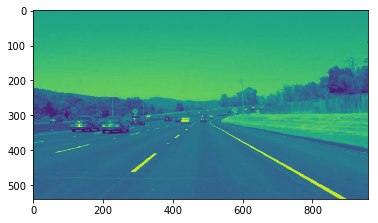

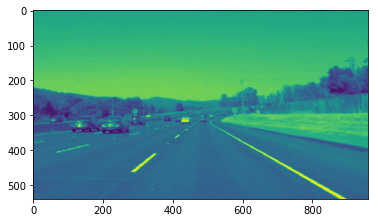

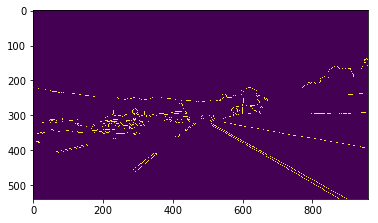

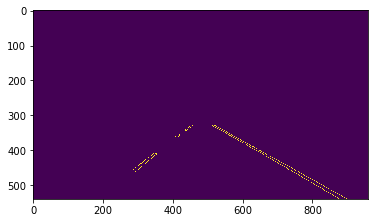

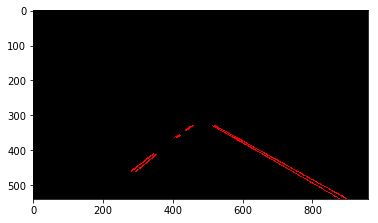

In [ ]:
rho = 1
theta = np.pi/180
threshold = 15
min_line_len = 5
max_line_gap = 10
ysize = image.shape[0]
xsize = image.shape[1]
kernel_size = 7
low_threshold = 50
high_threshold = 150
lbottom_x = 90;
lbottom_y = ysize-1;
ltop_x = 430;
ltop_y = 330;
rtop_x = 530;
rtop_y = 330;
rbottom_x = 940;
rbottom_y = ysize-1;
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.

def pipeline(image):
    vertices = np.array([[lbottom_x, lbottom_y],[ltop_x, ltop_y],[rtop_x, rtop_y],[rbottom_x, rbottom_y]])
    gimg = grayscale(image)
    
    blurred_gimg = gaussian_blur(gimg, kernel_size)
    
    cannied_gimg = canny(blurred_gimg, low_threshold, high_threshold)
    
#     lines = [[(lbottom_x, lbottom_y,ltop_x, ltop_y),(ltop_x, ltop_y,rtop_x, rtop_y),(rtop_x, rtop_y,rbottom_x, rbottom_y),(rbottom_x, rbottom_y,lbottom_x, lbottom_y)]]
#     draw_lines(image, lines)
    region_selected = region_of_interest(cannied_gimg, np.int32([vertices]))
    
    houghed_image = hough_lines(region_selected, rho, theta, threshold, min_line_len, max_line_gap)
    
    return gimg, blurred_gimg, cannied_gimg, region_selected, houghed_image

# commented since it eat alot of memory
# for img in test_images:
#     image = mpimg.imread('test_images/'+img)
#     gimg, blurred, cannied, region, houghed = pipeline(image)
#     plt.figure()
#     plt.imshow(gimg)
#     plt.savefig('test_images_output/grey_'+img)
    
#     plt.figure()
#     plt.imshow(blurred)
#     plt.savefig('test_images_output/blurred_'+img)
    
#     plt.figure()
#     plt.imshow(cannied)
#     plt.savefig('test_images_output/cannied_'+img)
    
#     plt.figure()
#     plt.imshow(region)
#     plt.savefig('test_images_output/region_'+img)
    
#     plt.figure()
#     plt.imshow(houghed)
#     plt.savefig('test_images_output/houghed_'+img)
    
#     break

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an `import error` when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt. Also, check out [this forum post](https://carnd-forums.udacity.com/questions/22677062/answers/22677109) for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://carnd-forums.udacity.com/display/CAR/questions/26218840/import-videofileclip-error) for more troubleshooting tips across operating systems.**

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


In [ ]:
# def process_image(image):
#     # NOTE: The output you return should be a color image (3 channel) for processing video below
#     # TODO: put your pipeline here,
#     # you should return the final output (image where lines are drawn on lanes)
def process_image(image):
    gimg, blurred_gimg, cannied_gimg, region_selected, houghed_image = pipeline(image)
    houghed_lines = cv2.HoughLinesP(region_selected, rho, theta, threshold, min_line_len, max_line_gap)
    fits = []
    slopes = []
    left_xs = []
    left_ys = []
    right_xs = []
    right_ys = []
    left_slopes = []
    right_slopes = []
    index = 0
    for line in houghed_lines:
        index = index + 1
        for x1,y1,x2,y2 in line:                
            fit = np.polyfit((x1, x2), (y1, y2), 1)
            fits.append(fit)
            slopes.append(fit[0])
            if fit[0] < 0 and x1 < 530 and x2 < 530:
                left_xs.append(x1)
                left_xs.append(x2)
                left_ys.append(y1)
                left_ys.append(y2)
                left_slopes.append(fit)
            if fit[0] > 0 and x1 > 430 and x2 > 430:
                right_xs.append(x1)
                right_xs.append(x2)
                right_ys.append(y1)
                right_ys.append(y2)
                right_slopes.append(fit)
#     print([(lx2, ly2), (lx1, ly1)])
#     print([(rx2, ry2), (rx1, ry1)])
    weighted_image = weighted_img(image, houghed_image)
    
    if len(left_xs) > 0 and len(left_ys) > 0:
        lx1 = np.min(left_xs)
        ly1 = np.max(left_ys)
        lx2 = np.max(left_xs)
        ly2 = np.min(left_ys)

        fit = np.polyfit((lx1, lx2), (ly1, ly2), 1)
        top_x = int((ltop_y - fit[1]) / fit[0])
        bottom_x = int((lbottom_y - fit[1]) / fit[0])
#         final_image = cv2.line(weighted_image, (lx2, ly2), (top_x, ltop_y), [255, 0, 0], 3)
        final_image = cv2.line(weighted_image, (lx1, ly1), (bottom_x, lbottom_y), [255, 0, 0], 3)

        final_image = cv2.line(weighted_image, (lx2, ly2), (lx1, ly1), [255, 0, 0], 3)
    if len(right_xs) > 0 and len(right_ys) > 0:
        rx1 = np.max(right_xs)
        ry1 = np.max(right_ys)
        rx2 = np.min(right_xs)
        ry2 = np.min(right_ys)
    
        fit = np.polyfit((rx1, rx2), (ry1, ry2), 1)
        top_x = int((rtop_y - fit[1]) / fit[0])
        bottom_x = int((rbottom_y - fit[1]) / fit[0])
#         final_image = cv2.line(weighted_image, (rx2, ry2), (top_x, rtop_y), [255, 0, 0], 3)
        final_image = cv2.line(weighted_image, (rx1, ry1), (bottom_x, rbottom_y), [255, 0, 0], 3)
    
        final_image = cv2.line(weighted_image, (rx2, ry2), (rx1, ry1), [255, 0, 0], 3)

    return final_image

# commented since it eats alot of memory
# for img in test_images:
#     image = mpimg.imread('test_images/'+img)
#     plt.figure()
#     plt.imshow(process_image(image))
#     plt.savefig('test_images_output/'+img)
#     break

Let's try the one with the solid white lane on the right first ...

In [ ]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [ ]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))